In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import rand_score, silhouette_score


# Global variables

In [2]:
# Columns to drop. Not included in the analysis.
drop = ['Days with measures', 'Average', 'Measurements',
        '0000 - 0600 Total', '0600 - 1300 Total', '1300 - 1600 Total', '1600 - 2000 Total', '2000 - 2400 Total',
        '0000 - 0600 Hypo', '0600 - 1300 Hypo', '1300 - 1600 Hypo', '1600 - 2000 Hypo', '2000 - 2400 Hypo',
        '0000 - 0600 Hyper', '0600 - 1300 Hyper', '1300 - 1600 Hyper', '1600 - 2000 Hyper', '2000 - 2400 Hyper',
        ]

# ID variable
id_variable = 'Patient_ID'

# List of variables to include in the clustering analysis
var_to_clustering_process =['0000 - 0600 Average', '0000 - 0600 STD', '0000 - 0600 MIN', '0000 - 0600 MAX',
                        '0600 - 1300 Average','0600 - 1300 STD','0600 - 1300 MIN','0600 - 1300 MAX',
                        '1300 - 1600 Average','1300 - 1600 STD','1300 - 1600 MIN','1300 - 1600 MAX',
                        '1600 - 2000 Average','1600 - 2000 STD','1600 - 2000 MIN','1600 - 2000 MAX',
                        '2000 - 2400 Average','2000 - 2400 STD','2000 - 2400 MIN','2000 - 2400 MAX'
                            ]

# List of variables to include in the centroid analysis
var_to_centroids_analysis = ['Days with measures',
                             '0000 - 0600 Hypo ratio', '0060 - 1300 Hypo ratio', '1300 - 1600 Hypo ratio', '1600 - 2000 Hypo ratio', '2000 - 2400 Hypo ratio',
                             '0000 - 0600 Hyper ratio', '0060 - 1300 Hyper ratio', '1300 - 1600 Hyper ratio', '1600 - 2000 Hyper ratio', '2000 - 2400 Hyper ratio',
                             '0000 - 0600 Hypo', '0000 - 0600 Hyper', '0000 - 0600 Average', '0000 - 0600 STD', '0000 - 0600 MIN', '0000 - 0600 MAX',
                             '0600 - 1300 Hypo', '0600 - 1300 Hyper', '0600 - 1300 Average', '0600 - 1300 STD', '0600 - 1300 MIN', '0600 - 1300 MAX',
                             '1300 - 1600 Hypo', '1300 - 1600 Hyper', '1300 - 1600 Average', '1300 - 1600 STD', '1300 - 1600 MIN', '1300 - 1600 MAX',
                             '1600 - 2000 Hypo', '1600 - 2000 Hyper', '1600 - 2000 Average', '1600 - 2000 STD', '1600 - 2000 MIN', '1600 - 2000 MAX',
                             '2000 - 2400 Hypo', '2000 - 2400 Hyper', '2000 - 2400 Average', '2000 - 2400 STD', '2000 - 2400 MIN', '2000 - 2400 MAX',
                             'Age', 'Sex', 'Number_of_biochemical_parameters', 'Number_of_diagnostics', 'Total_hypo', 'Total_hyper', 'Total_hypo ratio', 'Total_hyper ratio'
                        ]

# List of variables to show in the tables
# Age Sex Number_of_analytics Number_of_diagnostics Total_hypo Total_hyper
var_to_show_in_tables = ['Age', 'Sex', 'Number_of_biochemical_parameters', 'Number_of_diagnostics', 'Total_hypo ratio', 'Total_hyper ratio']

# Auxiliar set of variables
# average_variables = ['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']
# STD_variables = ['0000 - 0600 STD', '0600 - 1300 STD', '1300 - 1600 STD', '1600 - 2000 STD', '2000 - 2400 STD']
# MIN_variables = ['0000 - 0600 MIN', '0600 - 1300 MIN', '1300 - 1600 MIN', '1600 - 2000 MIN', '2000 - 2400 MIN']
# MAX_variables = ['0000 - 0600 MAX', '0600 - 1300 MAX', '1300 - 1600 MAX', '1600 - 2000 MAX', '2000 - 2400 MAX']



# Number of variables to analyse.
variable_number = len(var_to_centroids_analysis)
variable_number

49

# Functions

In [3]:
def create_centroids(df : pd.DataFrame, labels : np.ndarray, k : int) -> pd.DataFrame:
    """
    Calcalulate the centroids given a dataset and the labels of classification

    :param df: DataFrame with the atributtes to make the centroids
    :param labels: labels created in the clustering process
    :param k: number of cluster in the labels
    :return: DataFrame with the centroids
    """
    aux_df = df.copy() # Create a copy of the dataset given to keep it unmodified
    aux_s = pd.Series(data=labels)
    aux_df['Labels'] = aux_s # Add the labels to aux_df
    attribute_Total = df.shape[1] # Number of attribute in the dataframe
    centroids_df_mean_list = [] # List to store DataFrames for centroids mean
    centroids_df_std_list = []  # List to store DataFrames for centroids std

    for k_th in range(0, k): # For every group made in the current clustering methods
        filter_ = (aux_df['Labels'] == k_th) ## Filter where the label of the current clustering methods
        aux_series_mean = pd.Series(index=df.columns, dtype=float)
        aux_series_std = pd.Series(index=df.columns, dtype=float)
        for n_th_attribute in range(0, attribute_Total): # Move through all attributes
            aux_series_mean[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].mean(axis=0) # Find the average of the column
            aux_series_std[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].std(axis=0) # Find the standard deviation of the column

        centroids_df_mean_list.append(aux_series_mean.to_frame().T) # Convert series to DataFrame and append
        centroids_df_std_list.append(aux_series_std.to_frame().T) # Convert series to DataFrame and append

    centroids_df_mean = pd.concat(centroids_df_mean_list, ignore_index=True) # Combine all DataFrames for mean
    centroids_df_std = pd.concat(centroids_df_std_list, ignore_index=True) # Combine all DataFrames for std

    return centroids_df_mean, centroids_df_std


In [4]:
def my_value_count(df:pd.DataFrame):
    """"
    Print all Value count of a dataframe with miss values included
    """
    for current_col in df.columns:
        print(df[current_col].value_counts(dropna=False))
        print('---------------------')
        print()

In [5]:
def get_k(name:str) -> int:
    """
    Extract from the name of the model instance the number of the K used.
    :param name: Name of the model instance
    :return: integer representing the K used in training the instance.
    """
    return int(name[len(name) - 11])

In [6]:
def get_df_by_label (k_value:int, df:pd.DataFrame) -> pd.DataFrame:
    """
    Given a dataset with all the labels of all the instance executed of all clustering methods pick the results with
    determined K.
    :param df: Datafreme to extrat the columns with K grups
    :param k_value: the k value of the dataset that want to form
    :return: a dataframe with the labels correspondent to the models instances with :param k_value
    """
    columns_ = df.iloc[:, variable_number + 1:].columns
    selected_columns = []
    for column in columns_:
        current_K = get_k(column)
        if current_K == k_value: # Column to be add
            selected_columns.append(column)

    return df[selected_columns]

In [7]:
def get_best_model_of_set(X:pd.DataFrame, df_labels_:pd.DataFrame) -> (str, int):
    """
    Given a dataset with the characteristics (attributes) and a group of labels (from the result of the clustering
    methods) return the best model based on the silhouette average score.
    :param X: dataset with the characteristics
    :param df_labels_: set of models´ result labels
    :return: an string with the name of the best model
    """
    models_name = df_labels_.columns

    best_model = models_name[0]
    best_model_score = silhouette_score(X=X, labels=df_labels_[best_model])

    for index in range(1, models_name.size):
        temp_model = models_name[index]
        temp_model_score = silhouette_score(X=X, labels=df_labels_[temp_model])

        if temp_model_score > best_model_score:
            best_model = temp_model
            best_model_score = temp_model_score

    return best_model, best_model_score

# Load best found

In [8]:
df_no_std_labeled_V1 = pd.read_csv('Outputs/Results/Labels/Best_Until_Now/Data_no_standardize_labeled_V1_ADD_Ratios_2023-08-03 (591 patients).csv')
df_no_std_labeled_V2 = pd.read_csv('Outputs/Results/Labels/Best_Until_Now/Data_no_standardize_labeled_V2_ADD_Ratios_2023-08-03 (716 patients).csv')

In [9]:
df_no_std_labeled_V1

,Patient_ID,Days with measures,0000 - 0600 Hypo ratio,0060 - 1300 Hypo ratio,1300 - 1600 Hypo ratio,1600 - 2000 Hypo ratio,2000 - 2400 Hypo ratio,0000 - 0600 Hyper ratio,0060 - 1300 Hyper ratio,1300 - 1600 Hyper ratio,...,SOM_K6_data_V1_0,SOM_K7_data_V1_0,SOM_K8_data_V1_0,SOM_K2_data_V1_1,SOM_K3_data_V1_1,SOM_K4_data_V1_1,SOM_K5_data_V1_1,SOM_K6_data_V1_1,SOM_K7_data_V1_1,SOM_K8_data_V1_1
0,LIB193263,649,0.556240,0.744222,0.070878,0.288136,0.138675,10.955316,10.106317,5.691834,...,0,5,0,1,0,0,3,0,5,7
1,LIB193264,326,1.312883,1.536810,1.555215,1.128834,1.067485,7.156442,9.184049,1.496933,...,2,1,3,0,2,3,1,2,0,5
2,LIB193265,581,4.144578,3.654045,1.442341,2.049914,1.266781,2.569707,6.191050,2.487091,...,0,6,4,1,0,1,4,0,4,6
3,LIB193266,500,0.714000,0.458000,0.248000,0.350000,0.114000,7.502000,8.444000,4.430000,...,3,5,0,1,1,1,2,1,4,6
4,LIB193267,647,0.602782,0.381762,0.061824,0.177743,0.142195,9.629057,9.621329,5.017002,...,0,6,4,1,0,0,3,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,LIB194162,361,2.080332,1.686981,0.930748,1.603878,0.698061,6.094183,9.252078,2.556787,...,1,3,1,1,1,1,2,1,0,6
587,LIB194163,192,1.182292,1.890625,0.562500,0.333333,0.562500,6.953125,7.984375,2.135417,...,3,4,1,1,1,1,2,1,4,6
588,LIB194164,632,1.425633,1.895570,0.131329,0.245253,0.356013,6.077532,7.204114,3.756329,...,2,1,6,0,2,3,1,4,1,5
589,LIB194165,259,0.857143,0.826255,0.833977,0.660232,0.969112,13.409266,13.088803,3.637066,...,3,4,1,1,0,0,3,3,5,3


In [10]:
df_no_std_V1 = df_no_std_labeled_V1.iloc[:, : variable_number+1]
df_no_std_V2 = df_no_std_labeled_V2.iloc[:, : variable_number+1]
k_values = [2, 3, 4, 5, 6, 7, 8] # variation of the number of clusters

In [11]:
df_no_std_V1

,Patient_ID,Days with measures,0000 - 0600 Hypo ratio,0060 - 1300 Hypo ratio,1300 - 1600 Hypo ratio,1600 - 2000 Hypo ratio,2000 - 2400 Hypo ratio,0000 - 0600 Hyper ratio,0060 - 1300 Hyper ratio,1300 - 1600 Hyper ratio,...,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper,Total_hypo ratio,Total_hyper ratio
0,LIB193263,649,0.556240,0.744222,0.070878,0.288136,0.138675,10.955316,10.106317,5.691834,...,40.0,459.0,56.0,0,NaN,1.0,1604,30204,2.471495,46.539291
1,LIB193264,326,1.312883,1.536810,1.555215,1.128834,1.067485,7.156442,9.184049,1.496933,...,41.0,353.0,47.0,1,NaN,3.0,2146,10406,6.582822,31.920245
2,LIB193265,581,4.144578,3.654045,1.442341,2.049914,1.266781,2.569707,6.191050,2.487091,...,41.0,500.0,41.0,1,120.0,NaN,8581,11408,14.769363,19.635112
3,LIB193266,500,0.714000,0.458000,0.248000,0.350000,0.114000,7.502000,8.444000,4.430000,...,40.0,462.0,23.0,0,74.0,2.0,1047,18428,2.094000,36.856000
4,LIB193267,647,0.602782,0.381762,0.061824,0.177743,0.142195,9.629057,9.621329,5.017002,...,53.0,488.0,41.0,1,177.0,1.0,1091,28622,1.686244,44.238022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,LIB194162,361,2.080332,1.686981,0.930748,1.603878,0.698061,6.094183,9.252078,2.556787,...,45.0,428.0,22.0,0,12.0,NaN,2800,11831,7.756233,32.772853
587,LIB194163,192,1.182292,1.890625,0.562500,0.333333,0.562500,6.953125,7.984375,2.135417,...,53.0,417.0,37.0,0,64.0,NaN,1125,6172,5.859375,32.145833
588,LIB194164,632,1.425633,1.895570,0.131329,0.245253,0.356013,6.077532,7.204114,3.756329,...,49.0,342.0,31.0,1,158.0,1.0,3677,19642,5.818038,31.079114
589,LIB194165,259,0.857143,0.826255,0.833977,0.660232,0.969112,13.409266,13.088803,3.637066,...,40.0,403.0,36.0,1,22.0,NaN,1072,13652,4.138996,52.710425


In [12]:
df_no_std_V2

,Patient_ID,Days with measures,0000 - 0600 Hypo ratio,0060 - 1300 Hypo ratio,1300 - 1600 Hypo ratio,1600 - 2000 Hypo ratio,2000 - 2400 Hypo ratio,0000 - 0600 Hyper ratio,0060 - 1300 Hyper ratio,1300 - 1600 Hyper ratio,...,2000 - 2400 MIN,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper,Total_hypo ratio,Total_hyper ratio
0,LIB193263,649,0.556240,0.744222,0.070878,0.288136,0.138675,10.955316,10.106317,5.691834,...,40.0,459.0,56.0,0,NaN,1.0,1604,30204,2.471495,46.539291
1,LIB193264,326,1.312883,1.536810,1.555215,1.128834,1.067485,7.156442,9.184049,1.496933,...,41.0,353.0,47.0,1,NaN,3.0,2146,10406,6.582822,31.920245
2,LIB193265,581,4.144578,3.654045,1.442341,2.049914,1.266781,2.569707,6.191050,2.487091,...,41.0,500.0,41.0,1,120.0,NaN,8581,11408,14.769363,19.635112
3,LIB193266,500,0.714000,0.458000,0.248000,0.350000,0.114000,7.502000,8.444000,4.430000,...,40.0,462.0,23.0,0,74.0,2.0,1047,18428,2.094000,36.856000
4,LIB193267,647,0.602782,0.381762,0.061824,0.177743,0.142195,9.629057,9.621329,5.017002,...,53.0,488.0,41.0,1,177.0,1.0,1091,28622,1.686244,44.238022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,LIB194162,361,2.080332,1.686981,0.930748,1.603878,0.698061,6.094183,9.252078,2.556787,...,45.0,428.0,22.0,0,12.0,NaN,2800,11831,7.756233,32.772853
712,LIB194163,192,1.182292,1.890625,0.562500,0.333333,0.562500,6.953125,7.984375,2.135417,...,53.0,417.0,37.0,0,64.0,NaN,1125,6172,5.859375,32.145833
713,LIB194164,632,1.425633,1.895570,0.131329,0.245253,0.356013,6.077532,7.204114,3.756329,...,49.0,342.0,31.0,1,158.0,1.0,3677,19642,5.818038,31.079114
714,LIB194165,259,0.857143,0.826255,0.833977,0.660232,0.969112,13.409266,13.088803,3.637066,...,40.0,403.0,36.0,1,22.0,NaN,1072,13652,4.138996,52.710425


In [13]:
# Dataframe with all the labels resulting for al the clustering for V1 of the dataframe.
df_all_labels_V1 = df_no_std_labeled_V1.iloc[:,variable_number+1:]
df_all_labels_V1

,Hier_K2_data_V1_0,Hier_K2_data_V1_1,Hier_K3_data_V1_0,Hier_K3_data_V1_1,Hier_K4_data_V1_0,Hier_K4_data_V1_1,Hier_K5_data_V1_0,Hier_K5_data_V1_1,Hier_K6_data_V1_0,Hier_K6_data_V1_1,...,SOM_K6_data_V1_0,SOM_K7_data_V1_0,SOM_K8_data_V1_0,SOM_K2_data_V1_1,SOM_K3_data_V1_1,SOM_K4_data_V1_1,SOM_K5_data_V1_1,SOM_K6_data_V1_1,SOM_K7_data_V1_1,SOM_K8_data_V1_1
0,1,1,1,0,0,1,2,1,2,0,...,0,5,0,1,0,0,3,0,5,7
1,0,0,0,1,3,0,3,4,1,4,...,2,1,3,0,2,3,1,2,0,5
2,1,1,1,0,0,1,4,1,4,0,...,0,6,4,1,0,1,4,0,4,6
3,1,1,1,0,0,1,2,1,2,0,...,3,5,0,1,1,1,2,1,4,6
4,1,1,1,0,0,3,4,3,4,1,...,0,6,4,1,0,0,3,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,1,0,0,1,1,1,1,0,0,...,1,3,1,1,1,1,2,1,0,6
587,0,1,0,0,1,1,1,1,0,0,...,3,4,1,1,1,1,2,1,4,6
588,0,0,0,1,3,0,3,2,1,2,...,2,1,6,0,2,3,1,4,1,5
589,1,1,1,0,0,3,2,3,2,1,...,3,4,1,1,0,0,3,3,5,3


In [14]:
# Dataframe with all the labels resulting for al the clustering for V2 of the dataframe.
df_all_labels_V2 = df_no_std_labeled_V2.iloc[:,variable_number+1:]
df_all_labels_V2

,Hier_K2_data_V2_0,Hier_K2_data_V2_1,Hier_K3_data_V2_0,Hier_K3_data_V2_1,Hier_K4_data_V2_0,Hier_K4_data_V2_1,Hier_K5_data_V2_0,Hier_K5_data_V2_1,Hier_K6_data_V2_0,Hier_K6_data_V2_1,...,SOM_K6_data_V2_0,SOM_K7_data_V2_0,SOM_K8_data_V2_0,SOM_K2_data_V2_1,SOM_K3_data_V2_1,SOM_K4_data_V2_1,SOM_K5_data_V2_1,SOM_K6_data_V2_1,SOM_K7_data_V2_1,SOM_K8_data_V2_1
0,0,0,2,2,2,2,0,2,2,0,...,5,1,0,0,1,1,1,5,6,1
1,1,1,0,0,3,3,3,3,3,3,...,0,5,7,1,2,2,3,3,0,3
2,0,0,1,2,0,2,4,2,4,0,...,5,1,0,0,1,0,2,5,6,1
3,0,0,2,2,2,2,0,2,2,0,...,2,2,5,0,1,0,2,4,6,1
4,0,0,1,2,0,2,4,2,4,0,...,5,1,0,0,0,1,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,0,0,2,2,2,2,0,2,0,0,...,4,3,1,1,1,0,2,4,6,2
712,0,0,2,2,2,2,0,2,0,0,...,4,3,1,1,1,0,2,4,6,2
713,1,1,0,0,3,1,3,0,3,2,...,3,5,7,1,2,2,3,3,1,3
714,0,0,2,2,2,2,0,2,2,0,...,4,2,5,0,0,1,1,5,6,5


# Evaluate clustering

## For this purpose the following measures of evaluation of the clustering are used

***Silhouette Coefficient***

metrics.silhouette_score(X, labels, metric='euclidean')

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero
indicate overlapping clusters.

The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [15]:
def sort_arr_by_silhouette(df_var_values:pd.DataFrame, df_labels:pd.DataFrame, columns:np.ndarray) -> np.ndarray:
    """
    Given an array of names that represent a clustering method previously trained and using the labels' storage (as
    columns) in the dataframe df_labels, the Silhouette Coefficient it is calculated for each method and
    returned the same labels but sorted in descending way.
    :param df_var_values: dataframe version with the variables values
    :param df_labels: dataframe with the labels
    :param columns: ndarray with the names of a subset of the columns of labels from the clustering results storage in
    the dataframe df_labels
    :return: the same ndarray but descending sorted by the Silhouette Coefficient of each clustering made.
    """

    df_clust_eval_ = pd.DataFrame(columns=['Silhouette Coefficient']) # Temporal dataframe for storage the data, initially with the column 'Silhouette Coefficient'
    df_clust_eval_['Name'] = columns # Adding other column ('Name') and copy the columns pass as parameter.

    for index in range(0, columns.size): # Move through all the columns
        # Calculate the 'Silhouette Coefficient' and assign it to the correspondent cell.
        df_clust_eval_.iloc[index,0] = silhouette_score(X=df_var_values[var_to_clustering_process], labels=df_labels[columns[index]])

    # Return an ndarray descending sorted (OPTIMIZING: do not loose the calculation made, storage in a global dataframe with all the Silhouette Coefficient (df_all_silhouette)
    return df_clust_eval_.sort_values(by=['Silhouette Coefficient'], ascending=False)['Name'].values

## V1 of the dataset

In [16]:
# The following code is used to get the best algorithms by the value of k used for clustering. But instead of simply
# choosing the best Silhouette Coefficient result by k, first subsets of similar clustering results (based on the
# rand_score results) within the same k are made. Then, the best result from each created subset is chosen as
# representative of its set. This way of choosing the best results is based on the idea that even if several results
# have the same k, not all the labelings performed by those clustering methods have to be similar. Thus, it may be the
# case that by choosing only the "best" other results, with the same value of K are discarded, when they have the
# potential to be a good result (even when they are different, based on the rand_score, from the "best").  It is a
# better idea to choose the best (based on the Silhouette Coefficient) from a subset where the k's are equal and the
# labeling results are alike based on the  rand_score.

group_sets_V1 = []
# Value that determine if the results of two clustering labeling are alike
# (0 -> all result will be consider alike, 1 -> just identical result will be considered alike)
alpha = 0.6

for k_ith in k_values: # For any k values used to create the clustering
    k_df = get_df_by_label(k_value=k_ith, df=df_no_std_labeled_V1) # A dataframe with the labels of the clustering with k = k_ith
    arr_main_set_unordered = k_df.columns.values # Array with the names of the clustering methods
    arr_main_set = sort_arr_by_silhouette(df_var_values=df_no_std_V1,df_labels=df_all_labels_V1, columns=arr_main_set_unordered) # Sort the models name´s by the Silhouette Coefficient value

    while arr_main_set.size != 0: # While exist values in the current arr_main_set
        local_set = [] # Current list of models that have similar labeling results
        to_delete = [] # List with the positions of the models to delete of the arr_main_set on each iteration

        current_model = arr_main_set[0] # Name of the clustering algorithm with higher value of Silhouette Coefficient
        local_set.append(current_model)
        to_delete.append(0) # Add the first model to analyze to the delete list

        for i_th in range(1, arr_main_set.size):
            i_th_model = arr_main_set[i_th]
            # Calculate how similar are the labeling made by current_model and the i_th_model from the arr_main_set
            rand_index = rand_score(df_no_std_labeled_V1[current_model], df_no_std_labeled_V1[i_th_model])
            print('Similarity between:', current_model, 'and', i_th_model, 'is', round(rand_index, 5))
            if rand_index >= alpha: # If the rand_index is bigger than alpha then i_th model can be equivalent to current model
                local_set.append(i_th_model) # Add the model to the current set
                to_delete.append(i_th) # Add the i_th model to the delete list

        group_sets_V1.append(local_set) # Add to the general group set the current set created in the past iteration
        arr_main_set = np.delete(arr=arr_main_set, obj=to_delete) # Delete from the arr_main_set the algorithms that result similar.
        print()

group_sets_V1

Similarity between: SOM_K2_data_V1_0 and Kmeans_K2_data_V1_0 is 0.97325
Similarity between: SOM_K2_data_V1_0 and Fuzzy_C_Means_K2_data_V1_0 is 0.94723
Similarity between: SOM_K2_data_V1_0 and SOM_K2_data_V1_1 is 0.83367
Similarity between: SOM_K2_data_V1_0 and Hier_K2_data_V1_0 is 0.64507
Similarity between: SOM_K2_data_V1_0 and Birch_K2_data_V1_0 is 0.64507
Similarity between: SOM_K2_data_V1_0 and Fuzzy_C_Means_K2_data_V1_1 is 0.81456
Similarity between: SOM_K2_data_V1_0 and Kmeans_K2_data_V1_1 is 0.79601
Similarity between: SOM_K2_data_V1_0 and Hier_K2_data_V1_1 is 0.76306
Similarity between: SOM_K2_data_V1_0 and Birch_K2_data_V1_1 is 0.76306
Similarity between: SOM_K2_data_V1_0 and Gauss_K2_data_V1_0 is 0.62735
Similarity between: SOM_K2_data_V1_0 and Gauss_K2_data_V1_1 is 0.55594


Similarity between: Kmeans_K3_data_V1_0 and Fuzzy_C_Means_K3_data_V1_0 is 0.96361
Similarity between: Kmeans_K3_data_V1_0 and Hier_K3_data_V1_0 is 0.8371
Similarity between: Kmeans_K3_data_V1_0 and Birch

[['SOM_K2_data_V1_0',
  'Kmeans_K2_data_V1_0',
  'Fuzzy_C_Means_K2_data_V1_0',
  'SOM_K2_data_V1_1',
  'Hier_K2_data_V1_0',
  'Birch_K2_data_V1_0',
  'Fuzzy_C_Means_K2_data_V1_1',
  'Kmeans_K2_data_V1_1',
  'Hier_K2_data_V1_1',
  'Birch_K2_data_V1_1',
  'Gauss_K2_data_V1_0'],
 ['Gauss_K2_data_V1_1'],
 ['Kmeans_K3_data_V1_0',
  'Fuzzy_C_Means_K3_data_V1_0',
  'Hier_K3_data_V1_0',
  'Birch_K3_data_V1_0',
  'SOM_K3_data_V1_0',
  'Fuzzy_C_Means_K3_data_V1_1',
  'Hier_K3_data_V1_1',
  'Birch_K3_data_V1_1',
  'SOM_K3_data_V1_1',
  'Kmeans_K3_data_V1_1',
  'Gauss_K3_data_V1_0',
  'Gauss_K3_data_V1_1'],
 ['Kmeans_K4_data_V1_0',
  'Fuzzy_C_Means_K4_data_V1_0',
  'Hier_K4_data_V1_0',
  'Birch_K4_data_V1_0',
  'SOM_K4_data_V1_0',
  'Kmeans_K4_data_V1_1',
  'SOM_K4_data_V1_1',
  'Fuzzy_C_Means_K4_data_V1_1',
  'Hier_K4_data_V1_1',
  'Birch_K4_data_V1_1',
  'Gauss_K4_data_V1_0',
  'Gauss_K4_data_V1_1'],
 ['Kmeans_K5_data_V1_0',
  'Fuzzy_C_Means_K5_data_V1_0',
  'SOM_K5_data_V1_0',
  'Hier_K5_data_V

In [17]:
# Having the subsets of similar clustering results by k created in "group_sets_V1", then the best of each subset must be
# found.

df_best_by_K_V1 = pd.DataFrame(columns=['Name', 'Silhouette Coefficient']) # Dataframe that will storage the best results and the coefficient.

d = {} # Axillary dictionary to create lather a series.

for label_set_ith in group_sets_V1: # for each group_set created
    best_model_name = label_set_ith[0] # The firs value is the best because is sorted in the function sort_arr_by_silhouette
    best_model_ss = silhouette_score(df_no_std_V1[var_to_clustering_process], df_all_labels_V1[best_model_name]) # Calculate the Silhouette Coefficient (In case of OPTIMIZING sort_arr_by_silhouette, just access to the value)
    d[best_model_ss] = best_model_name # Update the dictionary.

ts = pd.Series(data=d) # Create the series
df_best_by_K_V1['Silhouette Coefficient'] = ts.index # Set the index to the dataframe
df_best_by_K_V1['Name'] = ts.values # Set the values to the dataframe

### Best models by K

In [18]:
df_best_by_K_V1

,Name,Silhouette Coefficient
0,SOM_K2_data_V1_0,0.384469
1,Gauss_K2_data_V1_1,0.128555
2,Kmeans_K3_data_V1_0,0.284987
3,Kmeans_K4_data_V1_0,0.227920
4,Kmeans_K5_data_V1_0,0.174700
5,Kmeans_K6_data_V1_0,0.181423
6,Kmeans_K7_data_V1_0,0.167949
7,Kmeans_K8_data_V1_0,0.151395


### Applying the evaluation metrics in the "traditional" way

Calculate the Silhouette Coefficient to all the clustering results.

In [19]:
df_clust_eval_V1 = pd.DataFrame(columns=['Name', 'Silhouette Coefficient']) # Dataframe to storage the results.

df_clust_eval_V1['Name'] = df_all_labels_V1.columns # Al

for index, row in df_clust_eval_V1.iterrows():
    name = row['Name']
    row['Silhouette Coefficient'] = silhouette_score(X=df_no_std_V1[var_to_clustering_process], labels=df_all_labels_V1[name])

# Sorting the dataset by the Silhouette Coefficient Rank
df_clust_eval_V1.sort_values(by=['Silhouette Coefficient'], ascending=False, inplace=True)
df_clust_eval_V1.reset_index(inplace=True, drop=True)

df_clust_eval_V1

,Name,Silhouette Coefficient
0,Hier_K2_data_V1_0,NaN
1,Hier_K2_data_V1_1,NaN
2,Hier_K3_data_V1_0,NaN
3,Hier_K3_data_V1_1,NaN
4,Hier_K4_data_V1_0,NaN
...,...,...
79,SOM_K4_data_V1_1,NaN
80,SOM_K5_data_V1_1,NaN
81,SOM_K6_data_V1_1,NaN
82,SOM_K7_data_V1_1,NaN


### Best n results

In [20]:
# Best results
best_number = 10
df_best_n_V1 = pd.DataFrame(df_clust_eval_V1.iloc[0:best_number, :])
df_best_n_V1.reset_index(inplace=True, drop=True)
df_best_n_V1

,Name,Silhouette Coefficient
0,Hier_K2_data_V1_0,NaN
1,Hier_K2_data_V1_1,NaN
2,Hier_K3_data_V1_0,NaN
3,Hier_K3_data_V1_1,NaN
4,Hier_K4_data_V1_0,NaN
5,Hier_K4_data_V1_1,NaN
6,Hier_K5_data_V1_0,NaN
7,Hier_K5_data_V1_1,NaN
8,Hier_K6_data_V1_0,NaN
9,Hier_K6_data_V1_1,NaN


### To compare both evaluation methods (onw and traditional)

### ***Best by K***

In [21]:
df_best_by_K_V1

,Name,Silhouette Coefficient
0,SOM_K2_data_V1_0,0.384469
1,Gauss_K2_data_V1_1,0.128555
2,Kmeans_K3_data_V1_0,0.284987
3,Kmeans_K4_data_V1_0,0.227920
4,Kmeans_K5_data_V1_0,0.174700
5,Kmeans_K6_data_V1_0,0.181423
6,Kmeans_K7_data_V1_0,0.167949
7,Kmeans_K8_data_V1_0,0.151395


### ***Best n (10)***

In [22]:
df_best_n_V1

,Name,Silhouette Coefficient
0,Hier_K2_data_V1_0,NaN
1,Hier_K2_data_V1_1,NaN
2,Hier_K3_data_V1_0,NaN
3,Hier_K3_data_V1_1,NaN
4,Hier_K4_data_V1_0,NaN
5,Hier_K4_data_V1_1,NaN
6,Hier_K5_data_V1_0,NaN
7,Hier_K5_data_V1_1,NaN
8,Hier_K6_data_V1_0,NaN
9,Hier_K6_data_V1_1,NaN


## V2 of the dataset

In [23]:
# Custom algorithm
group_sets_V2 = []
# Value that determine if the results of two clustering labeling are alike
# (0 -> all result will be consider alike, 1 -> just identical result will be considered alike)
alpha = 0.6

for k_ith in k_values: # For any k values used to create the clustering
    k_df = get_df_by_label(k_value=k_ith, df=df_no_std_labeled_V2) # A dataframe with the labels of the clustering with k = k_ith
    arr_main_set_unordered = k_df.columns.values # Array with the names of the clustering methods
    arr_main_set = sort_arr_by_silhouette(df_var_values=df_no_std_V2,df_labels=df_all_labels_V2, columns=arr_main_set_unordered) # Sort the models name´s by the Silhouette Coefficient value

    while arr_main_set.size != 0: # While exist values in the current arr_main_set
        local_set = [] # Current list of models that have similar labeling results
        to_delete = [] # List with the positions of the models to delete of the arr_main_set on each iteration

        current_model = arr_main_set[0] # Name of the clustering algorithm with higher value of Silhouette Coefficient
        local_set.append(current_model)
        to_delete.append(0) # Add the first model to analyze to the delete list

        for i_th in range(1, arr_main_set.size):
            i_th_model = arr_main_set[i_th]
            # Calculate how similar are the labeling made by current_model and the i_th_model from the arr_main_set
            rand_index = rand_score(df_no_std_labeled_V2[current_model], df_no_std_labeled_V2[i_th_model])
            print('Similarity between:', current_model, 'and', i_th_model, 'is', round(rand_index, 5))
            if rand_index >= alpha: # If the rand_index is bigger than alpha then i_th model can be equivalent to current model
                local_set.append(i_th_model) # Add the model to the current set
                to_delete.append(i_th) # Add the i_th model to the delete list

        group_sets_V2.append(local_set) # Add to the general group set the current set created in the past iteration
        arr_main_set = np.delete(arr=arr_main_set, obj=to_delete) # Delete from the arr_main_set the algorithms that result similar.
        print()

group_sets_V2

Similarity between: SOM_K2_data_V2_0 and Kmeans_K2_data_V2_0 is 0.93773
Similarity between: SOM_K2_data_V2_0 and Fuzzy_C_Means_K2_data_V2_0 is 0.91449
Similarity between: SOM_K2_data_V2_0 and Hier_K2_data_V2_0 is 0.87232
Similarity between: SOM_K2_data_V2_0 and Birch_K2_data_V2_0 is 0.87232
Similarity between: SOM_K2_data_V2_0 and Birch_K2_data_V2_1 is 0.86272
Similarity between: SOM_K2_data_V2_0 and Hier_K2_data_V2_1 is 0.86272
Similarity between: SOM_K2_data_V2_0 and Fuzzy_C_Means_K2_data_V2_1 is 0.79475
Similarity between: SOM_K2_data_V2_0 and SOM_K2_data_V2_1 is 0.78199
Similarity between: SOM_K2_data_V2_0 and Kmeans_K2_data_V2_1 is 0.77781
Similarity between: SOM_K2_data_V2_0 and Gauss_K2_data_V2_0 is 0.50282
Similarity between: SOM_K2_data_V2_0 and Gauss_K2_data_V2_1 is 0.50215

Similarity between: Gauss_K2_data_V2_0 and Gauss_K2_data_V2_1 is 0.99164

Similarity between: Kmeans_K3_data_V2_0 and Fuzzy_C_Means_K3_data_V2_0 is 0.94688
Similarity between: Kmeans_K3_data_V2_0 and Hier

[['SOM_K2_data_V2_0',
  'Kmeans_K2_data_V2_0',
  'Fuzzy_C_Means_K2_data_V2_0',
  'Hier_K2_data_V2_0',
  'Birch_K2_data_V2_0',
  'Birch_K2_data_V2_1',
  'Hier_K2_data_V2_1',
  'Fuzzy_C_Means_K2_data_V2_1',
  'SOM_K2_data_V2_1',
  'Kmeans_K2_data_V2_1'],
 ['Gauss_K2_data_V2_0', 'Gauss_K2_data_V2_1'],
 ['Kmeans_K3_data_V2_0',
  'Fuzzy_C_Means_K3_data_V2_0',
  'Hier_K3_data_V2_0',
  'Birch_K3_data_V2_0',
  'SOM_K3_data_V2_0',
  'Fuzzy_C_Means_K3_data_V2_1',
  'Kmeans_K3_data_V2_1',
  'Birch_K3_data_V2_1',
  'Hier_K3_data_V2_1',
  'SOM_K3_data_V2_1'],
 ['Gauss_K3_data_V2_0', 'Gauss_K3_data_V2_1'],
 ['Kmeans_K4_data_V2_0',
  'Fuzzy_C_Means_K4_data_V2_0',
  'Birch_K4_data_V2_1',
  'Hier_K4_data_V2_0',
  'Birch_K4_data_V2_0',
  'SOM_K4_data_V2_0',
  'SOM_K4_data_V2_1',
  'Kmeans_K4_data_V2_1',
  'Fuzzy_C_Means_K4_data_V2_1',
  'Hier_K4_data_V2_1',
  'Gauss_K4_data_V2_1',
  'Gauss_K4_data_V2_0'],
 ['Kmeans_K5_data_V2_0',
  'Fuzzy_C_Means_K5_data_V2_0',
  'SOM_K5_data_V2_0',
  'Kmeans_K5_data_V2

In [24]:
# Having the subsets of similar clustering results by k created in "group_sets_V2", then the best of each subset must be
# found.

df_best_by_K_V2 = pd.DataFrame(columns=['Name', 'Silhouette Coefficient']) # Dataframe that will storage the best results and the coefficient.

d = {} # Axillary dictionary to create lather a series.

for label_set_ith in group_sets_V2: # for each group_set created
    best_model_name = label_set_ith[0] # The firs value is the best because is sorted in the function sort_arr_by_silhouette
    best_model_ss = silhouette_score(df_no_std_V2[var_to_clustering_process], df_all_labels_V2[best_model_name]) # Calculate the Silhouette Coefficient (In case of OPTIMIZING sort_arr_by_silhouette, just access to the value)
    d[best_model_ss] = best_model_name # Update the dictionary.

ts = pd.Series(data=d) # Create the series
df_best_by_K_V2['Silhouette Coefficient'] = ts.index # Set the index to the dataframe
df_best_by_K_V2['Name'] = ts.values # Set the values to the dataframe

### Best models by K

In [25]:
df_best_by_K_V2

,Name,Silhouette Coefficient
0,SOM_K2_data_V2_0,0.391876
1,Gauss_K2_data_V2_0,0.102467
2,Kmeans_K3_data_V2_0,0.296615
3,Gauss_K3_data_V2_0,0.067679
4,Kmeans_K4_data_V2_0,0.235102
5,Kmeans_K5_data_V2_0,0.182582
6,Kmeans_K6_data_V2_0,0.179456
7,Kmeans_K7_data_V2_0,0.157548
8,Kmeans_K8_data_V2_0,0.155646


### Applying the evaluation metrics in the "traditional" way

Calculate the Silhouette Coefficient to all the clustering results.

In [26]:
df_clust_eval_V2 = pd.DataFrame(columns=['Name', 'Silhouette Coefficient']) # Dataframe to storage the results.

df_clust_eval_V2['Name'] = df_all_labels_V2.columns # Al

for index, row in df_clust_eval_V2.iterrows():
    name = row['Name']
    row['Silhouette Coefficient'] = silhouette_score(X=df_no_std_V2[var_to_clustering_process], labels=df_all_labels_V2[name])

# Sorting the dataset by the Silhouette Coefficient Rank
df_clust_eval_V2.sort_values(by=['Silhouette Coefficient'], ascending=False, inplace=True)
df_clust_eval_V2.reset_index(inplace=True, drop=True)

df_clust_eval_V2

,Name,Silhouette Coefficient
0,Hier_K2_data_V2_0,NaN
1,Hier_K2_data_V2_1,NaN
2,Hier_K3_data_V2_0,NaN
3,Hier_K3_data_V2_1,NaN
4,Hier_K4_data_V2_0,NaN
...,...,...
79,SOM_K4_data_V2_1,NaN
80,SOM_K5_data_V2_1,NaN
81,SOM_K6_data_V2_1,NaN
82,SOM_K7_data_V2_1,NaN


### Best n results

In [27]:
# Best results
best_number = 10
df_best_n_V2 = pd.DataFrame(df_clust_eval_V2.iloc[0:best_number, :])
df_best_n_V2.reset_index(inplace=True, drop=True)
df_best_n_V2

,Name,Silhouette Coefficient
0,Hier_K2_data_V2_0,NaN
1,Hier_K2_data_V2_1,NaN
2,Hier_K3_data_V2_0,NaN
3,Hier_K3_data_V2_1,NaN
4,Hier_K4_data_V2_0,NaN
5,Hier_K4_data_V2_1,NaN
6,Hier_K5_data_V2_0,NaN
7,Hier_K5_data_V2_1,NaN
8,Hier_K6_data_V2_0,NaN
9,Hier_K6_data_V2_1,NaN


### To compare both evaluation methods (onw and traditional)

### ***Best by K***

In [28]:
df_best_by_K_V2

,Name,Silhouette Coefficient
0,SOM_K2_data_V2_0,0.391876
1,Gauss_K2_data_V2_0,0.102467
2,Kmeans_K3_data_V2_0,0.296615
3,Gauss_K3_data_V2_0,0.067679
4,Kmeans_K4_data_V2_0,0.235102
5,Kmeans_K5_data_V2_0,0.182582
6,Kmeans_K6_data_V2_0,0.179456
7,Kmeans_K7_data_V2_0,0.157548
8,Kmeans_K8_data_V2_0,0.155646


### ***Best n (10)***

In [29]:
df_best_n_V2

,Name,Silhouette Coefficient
0,Hier_K2_data_V2_0,NaN
1,Hier_K2_data_V2_1,NaN
2,Hier_K3_data_V2_0,NaN
3,Hier_K3_data_V2_1,NaN
4,Hier_K4_data_V2_0,NaN
5,Hier_K4_data_V2_1,NaN
6,Hier_K5_data_V2_0,NaN
7,Hier_K5_data_V2_1,NaN
8,Hier_K6_data_V2_0,NaN
9,Hier_K6_data_V2_1,NaN


# Plotting the result for analysis.

In [30]:
# Variables that contain the features to plot in different configuration. Because in some analysis is better to have just one type o variables.

var_to_plot_ave = ['0000 - 0600 Average', '0600 - 1300 Average','1300 - 1600 Average', '1600 - 2000 Average','2000 - 2400 Average']

var_to_plot_hypo_total = ['0000 - 0600 Hypo', '0600 - 1300 Hypo', '1300 - 1600 Hypo', '1600 - 2000 Hypo', '2000 - 2400 Hypo']
var_to_plot_hypo_ratio = ['0000 - 0600 Hypo ratio', '0060 - 1300 Hypo ratio', '1300 - 1600 Hypo ratio', '1600 - 2000 Hypo ratio', '2000 - 2400 Hypo ratio']

var_to_plot_hyper_total = ['0000 - 0600 Hyper', '0600 - 1300 Hyper', '1300 - 1600 Hyper', '1600 - 2000 Hyper', '2000 - 2400 Hyper']
var_to_plot_hyper_ratio = ['0000 - 0600 Hyper ratio', '0060 - 1300 Hyper ratio', '1300 - 1600 Hyper ratio', '1600 - 2000 Hyper ratio', '2000 - 2400 Hyper ratio']


In [31]:
def  serie_to_str(s:pd.Series, total:int) -> str:
    """
    Given the series of the result of the value counts in a clustering result, convert the result to a string to plot
    in the bar graph
    :param total: total number of individuals to calculate the porcentaje
    :param s: The series resulting from apply the method value_count to df_all_labels in a certain column.
    :return: An string that represent the series.
    """
    s.sort_index(inplace=True)
    s_convert = ''
    for i in s.index:
        per = round(s[i]/total*100, 2)
        s_convert += str(i) + '-> ' + str(per) + '%, '

    s_convert = s_convert[0:len(s_convert)-2]
    return s_convert

## Dataset V1

### General attribute averages
To get an idea of the deviation of the centroids from the general average.

In [32]:
df_no_std_V1.shape

(591, 50)

In [33]:
graphs_subfij_name_V1 = '- Dataset_V1_2023-03-15'

Days with measures: 385.6209813874788
0000 - 0600 Hypo ratio: 1.1388611837926088
0060 - 1300 Hypo ratio: 1.2929056694711067
1300 - 1600 Hypo ratio: 0.49451672302350863
1600 - 2000 Hypo ratio: 0.6743281848131634
2000 - 2400 Hypo ratio: 0.49634445681698347
0000 - 0600 Hyper ratio: 7.283099186414913
0060 - 1300 Hyper ratio: 8.741105179764412
1300 - 1600 Hyper ratio: 3.5320141745976508
1600 - 2000 Hyper ratio: 5.40825838282438
2000 - 2400 Hyper ratio: 5.1673661998079625
0000 - 0600 Hypo: 451.3062605752961
0000 - 0600 Hyper: 2786.6852791878173
0000 - 0600 Average: 160.463316766595
0000 - 0600 STD: 59.00566924607333
0000 - 0600 MIN: 45.619289340101524
0000 - 0600 MAX: 405.65820642978
0600 - 1300 Hypo: 527.9001692047377
0600 - 1300 Hyper: 3324.6920473773266
0600 - 1300 Average: 158.72391509457796
0600 - 1300 STD: 59.45180086514874
0600 - 1300 MIN: 46.011844331641285
0600 - 1300 MAX: 408.46192893401013
1300 - 1600 Hypo: 203.331641285956
1300 - 1600 Hyper: 1362.0135363790187
1300 - 1600 Average

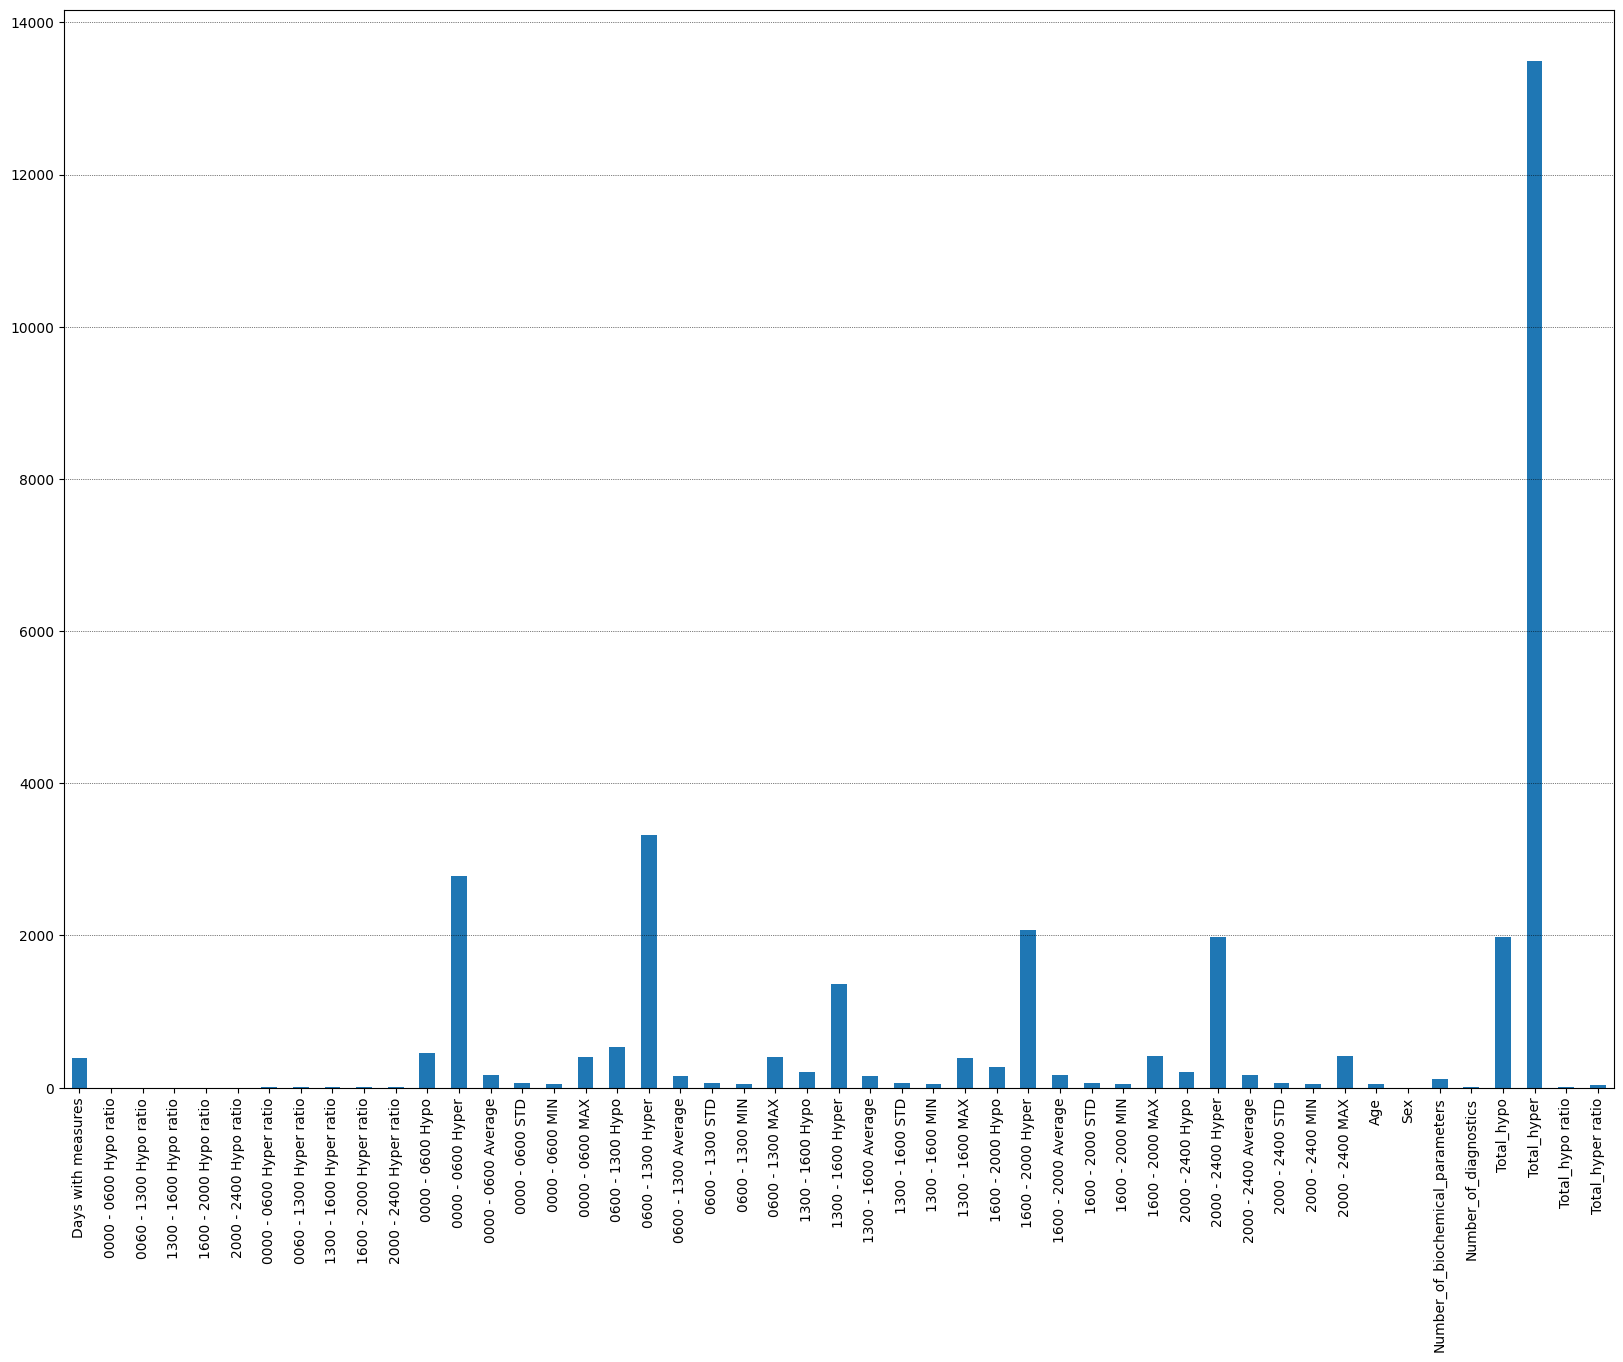

In [34]:
d_graph_V1 = {}

for i in range(1, df_no_std_V1.shape[1]):
    value = df_no_std_V1.iloc[:, i].mean(axis=0)
    c = df_no_std_V1.columns[i]
    d_graph_V1[c] = value
    print(c + ': ' + str(value))

general_graph_series_V1 = pd.Series(data=d_graph_V1)
ax_general_graph_V1 = general_graph_series_V1.plot(kind='bar', figsize=(20, 14))
ax_general_graph_V1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_general_graph_V1.get_figure()

fig.savefig('Outputs/Graphs/V1/AttributeAverage-' + graphs_subfij_name_V1 + '.svg')
fig.savefig('Outputs/Graphs/V1/AttributeAverage-' + graphs_subfij_name_V1 + '.jpg')

Days with measures: 353.8170391061453
0000 - 0600 Hypo ratio: 1.0814645608104185
0060 - 1300 Hypo ratio: 1.2096743067201168
1300 - 1600 Hypo ratio: 0.4553254881157267
1600 - 2000 Hypo ratio: 0.6222336211209469
2000 - 2400 Hypo ratio: 0.45699009007138575
0000 - 0600 Hyper ratio: 7.577962488295503
0060 - 1300 Hyper ratio: 9.20097627253535
1300 - 1600 Hyper ratio: 3.7963185288800334
1600 - 2000 Hyper ratio: 5.695852611079653
2000 - 2400 Hyper ratio: 5.38632568608017
0000 - 0600 Hypo: 406.1550279329609
0000 - 0600 Hyper: 2653.9092178770948
0000 - 0600 Average: 165.20382933661975
0000 - 0600 STD: 60.40509546441753
0000 - 0600 MIN: 47.20670391061452
0000 - 0600 MAX: 405.4650837988827
0600 - 1300 Hypo: 473.1173184357542
0600 - 1300 Hyper: 3167.0530726256984
0600 - 1300 Average: 163.27445100140505
0600 - 1300 STD: 60.82289561985295
0600 - 1300 MIN: 47.24022346368715
0600 - 1300 MAX: 408.74022346368713
1300 - 1600 Hypo: 180.21648044692736
1300 - 1600 Hyper: 1309.0307262569831
1300 - 1600 Averag

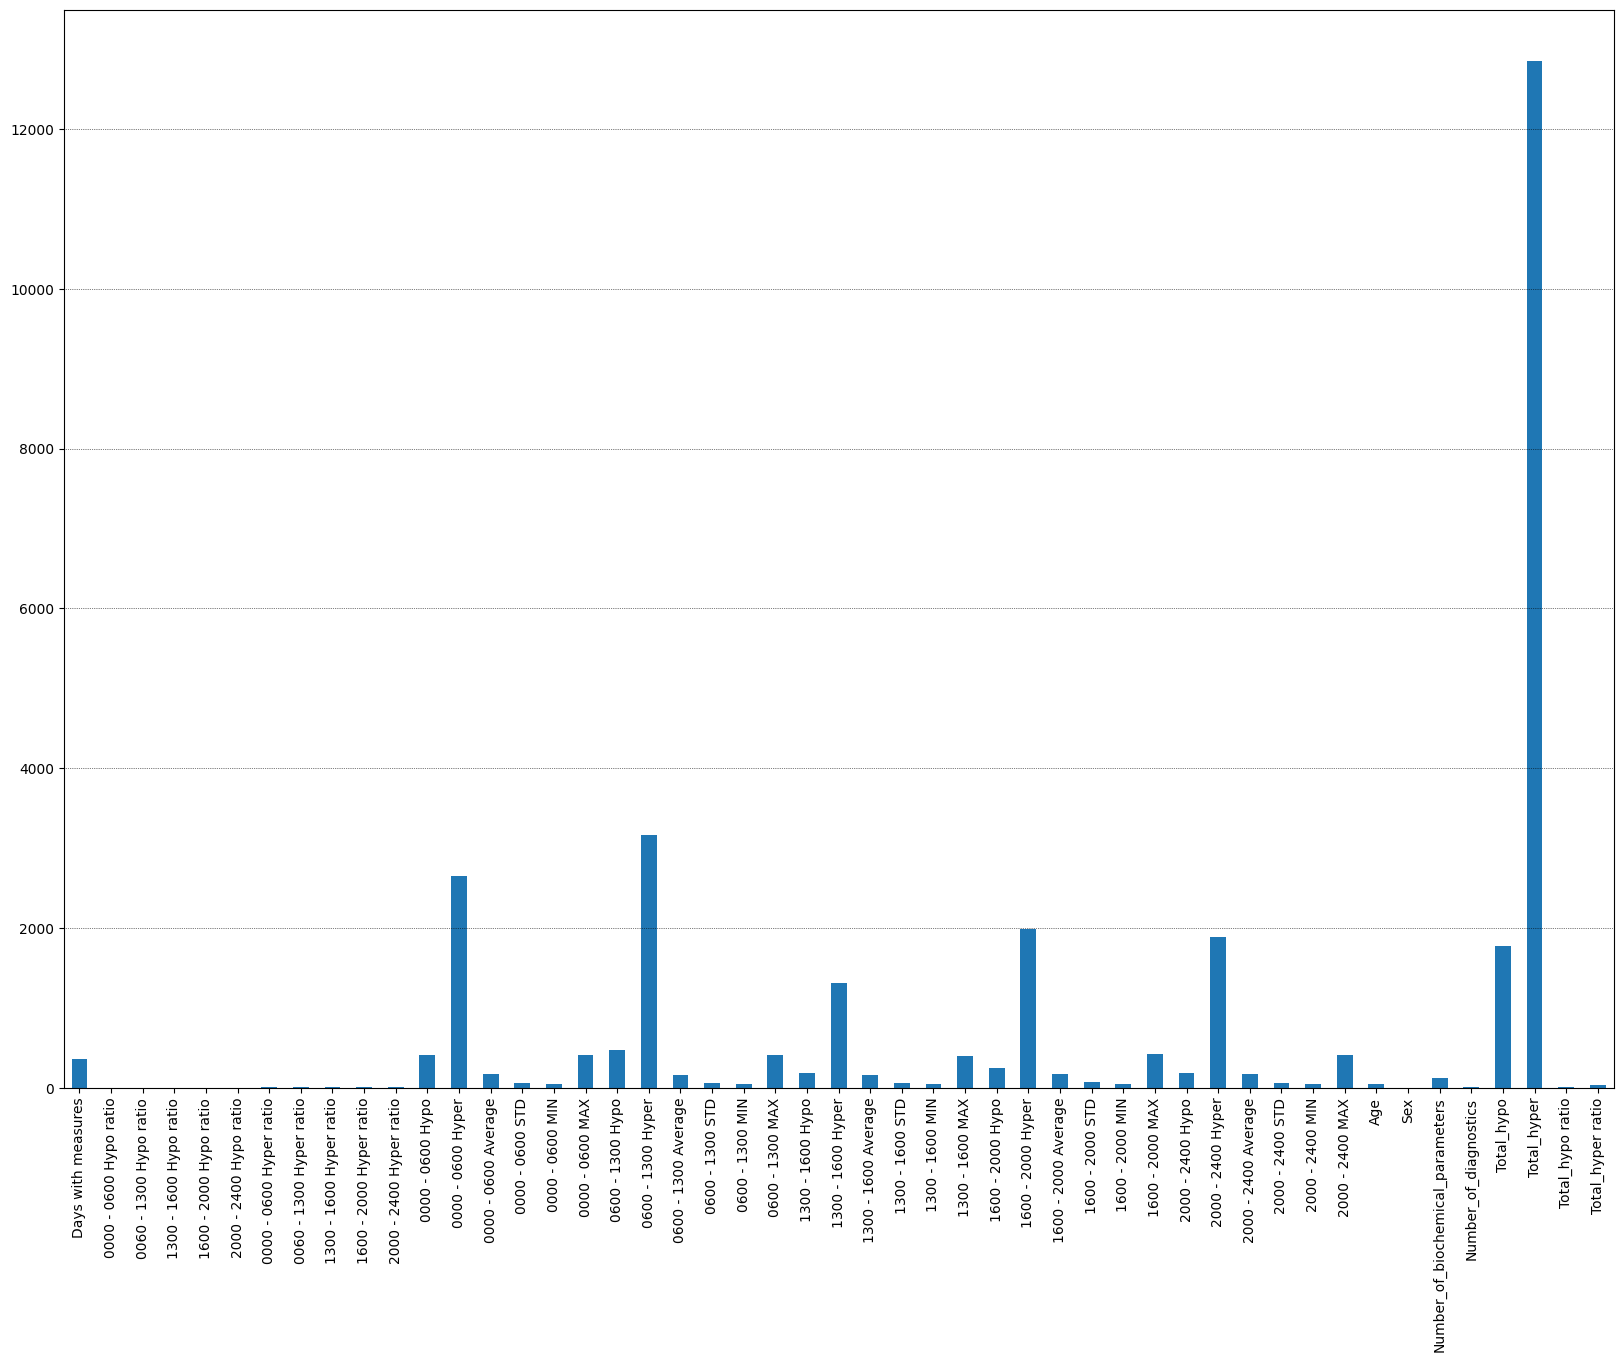

In [35]:
d_graph_V2 = {}

for i in range(1, df_no_std_V2.shape[1]):
    value = df_no_std_V2.iloc[:, i].mean(axis=0)
    c = df_no_std_V2.columns[i]
    d_graph_V2[c] = value
    print(c + ': ' + str(value))

general_graph_series_V2 = pd.Series(data=d_graph_V2)
ax_general_graph_V2 = general_graph_series_V2.plot(kind='bar', figsize=(20, 14))
ax_general_graph_V2.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_general_graph_V2.get_figure()

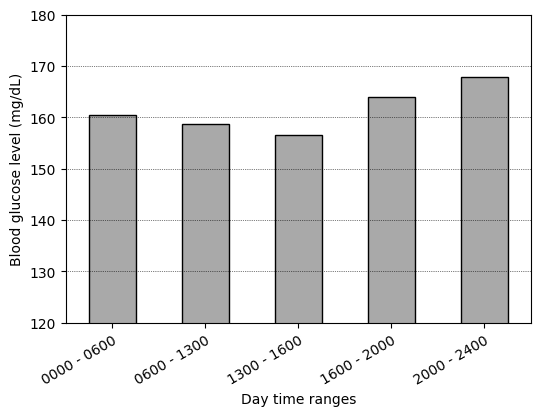

In [36]:
average_graph_series_V1 = general_graph_series_V1[['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']]
average_graph_series_V1.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V1.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([120, 180])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Blood glucose level (mg/dL)')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/AttributeAverage_V1.jpg', bbox_inches = "tight")
fig.savefig('Outputs/AttributeAverage_V1.eps', bbox_inches = "tight")

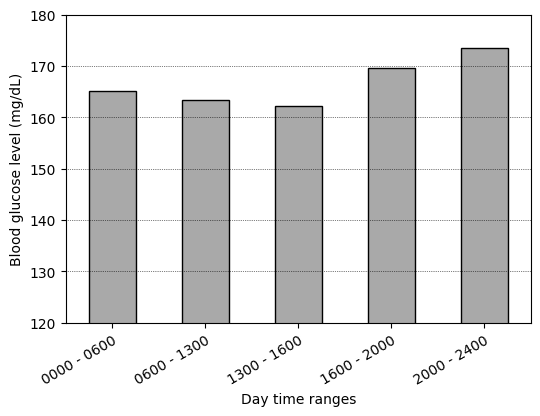

In [118]:
average_graph_series_V2 = general_graph_series_V2[['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']]
average_graph_series_V2.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V2.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([120, 180])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Blood glucose level (mg/dL)')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/AttributeAverage_V2.jpg', bbox_inches = "tight")
fig.savefig('Outputs/AttributeAverage_V2.eps', bbox_inches = "tight")

In [120]:
general_graph_series_V2

Days with measures                    353.817039
0000 - 0600 Hypo ratio                  1.081465
0060 - 1300 Hypo ratio                  1.209674
1300 - 1600 Hypo ratio                  0.455325
1600 - 2000 Hypo ratio                  0.622234
2000 - 2400 Hypo ratio                  0.456990
0000 - 0600 Hyper ratio                 7.577962
0060 - 1300 Hyper ratio                 9.200976
1300 - 1600 Hyper ratio                 3.796319
1600 - 2000 Hyper ratio                 5.695853
2000 - 2400 Hyper ratio                 5.386326
0000 - 0600 Hypo                      406.155028
0000 - 0600 Hyper                    2653.909218
0000 - 0600 Average                   165.203829
0000 - 0600 STD                        60.405095
0000 - 0600 MIN                        47.206704
0000 - 0600 MAX                       405.465084
0600 - 1300 Hypo                      473.117318
0600 - 1300 Hyper                    3167.053073
0600 - 1300 Average                   163.274451
0600 - 1300 STD     

In [133]:
general_graph_series_V2.index

Index(['Days with measures', '0000 - 0600 Hypo ratio',
       '0060 - 1300 Hypo ratio', '1300 - 1600 Hypo ratio',
       '1600 - 2000 Hypo ratio', '2000 - 2400 Hypo ratio',
       '0000 - 0600 Hyper ratio', '0060 - 1300 Hyper ratio',
       '1300 - 1600 Hyper ratio', '1600 - 2000 Hyper ratio',
       '2000 - 2400 Hyper ratio', '0000 - 0600 Hypo', '0000 - 0600 Hyper',
       '0000 - 0600 Average', '0000 - 0600 STD', '0000 - 0600 MIN',
       '0000 - 0600 MAX', '0600 - 1300 Hypo', '0600 - 1300 Hyper',
       '0600 - 1300 Average', '0600 - 1300 STD', '0600 - 1300 MIN',
       '0600 - 1300 MAX', '1300 - 1600 Hypo', '1300 - 1600 Hyper',
       '1300 - 1600 Average', '1300 - 1600 STD', '1300 - 1600 MIN',
       '1300 - 1600 MAX', '1600 - 2000 Hypo', '1600 - 2000 Hyper',
       '1600 - 2000 Average', '1600 - 2000 STD', '1600 - 2000 MIN',
       '1600 - 2000 MAX', '2000 - 2400 Hypo', '2000 - 2400 Hyper',
       '2000 - 2400 Average', '2000 - 2400 STD', '2000 - 2400 MIN',
       '2000 - 2400 MA

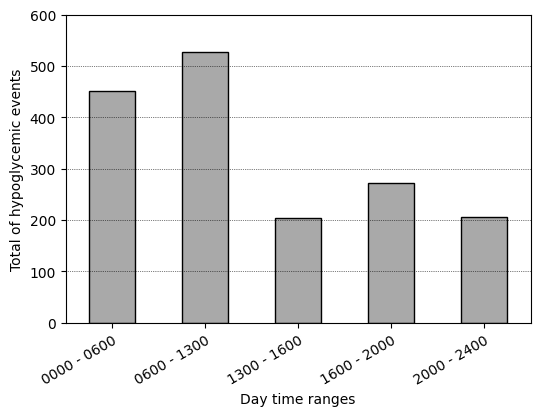

In [164]:
average_graph_series_V1 = general_graph_series_V1[['0000 - 0600 Hypo', '0600 - 1300 Hypo', '1300 - 1600 Hypo', '1600 - 2000 Hypo', '2000 - 2400 Hypo']]
average_graph_series_V1.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V1.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 600])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Total of hypoglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hypo_V1.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hypo_V1.eps', bbox_inches = "tight")

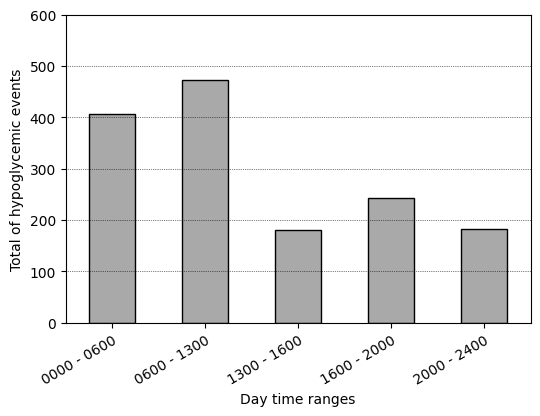

In [165]:
average_graph_series_V2 = general_graph_series_V2[['0000 - 0600 Hypo', '0600 - 1300 Hypo', '1300 - 1600 Hypo', '1600 - 2000 Hypo', '2000 - 2400 Hypo']]
average_graph_series_V2.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V2.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 600])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Total of hypoglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hypo_V2.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hypo_V2.eps', bbox_inches = "tight")

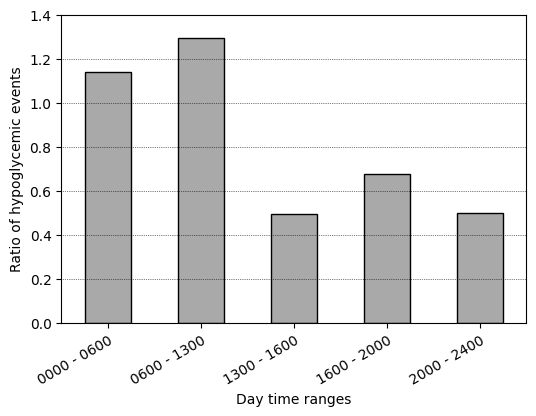

In [166]:
average_graph_series_V1 = general_graph_series_V1[['0000 - 0600 Hypo ratio',
       '0060 - 1300 Hypo ratio', '1300 - 1600 Hypo ratio',
       '1600 - 2000 Hypo ratio', '2000 - 2400 Hypo ratio']]
average_graph_series_V1.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V1.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 1.4])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Ratio of hypoglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hypo_Ratio_V1.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hypo_Ratio_V1.eps', bbox_inches = "tight")

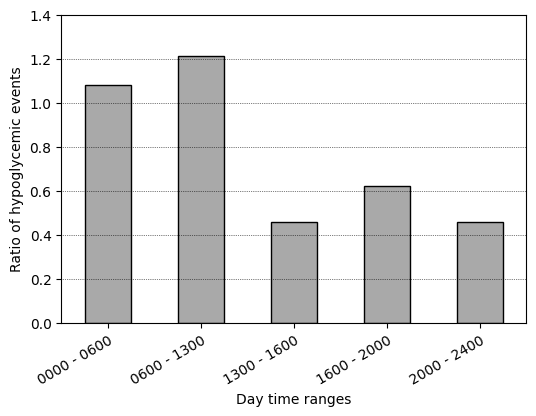

In [167]:
average_graph_series_V2 = general_graph_series_V2[['0000 - 0600 Hypo ratio',
       '0060 - 1300 Hypo ratio', '1300 - 1600 Hypo ratio',
       '1600 - 2000 Hypo ratio', '2000 - 2400 Hypo ratio']]
average_graph_series_V2.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V2.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 1.4])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Ratio of hypoglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hypo_Ratio_V2.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hypo_Ratio_V2.eps', bbox_inches = "tight")

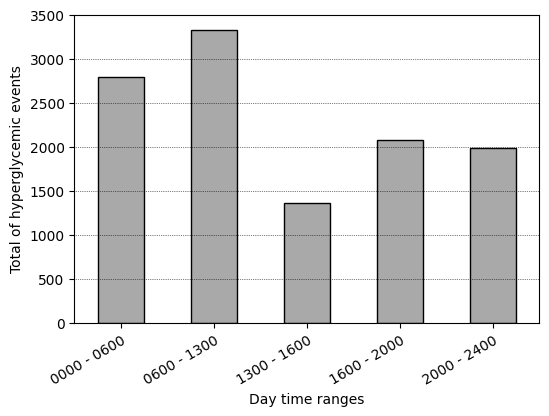

In [168]:
average_graph_series_V1 = general_graph_series_V1[['0000 - 0600 Hyper', '0600 - 1300 Hyper', '1300 - 1600 Hyper', '1600 - 2000 Hyper', '2000 - 2400 Hyper']]
average_graph_series_V1.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V1.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 3500])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Total of hyperglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hyper_V1.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hyper_V1.eps', bbox_inches = "tight")

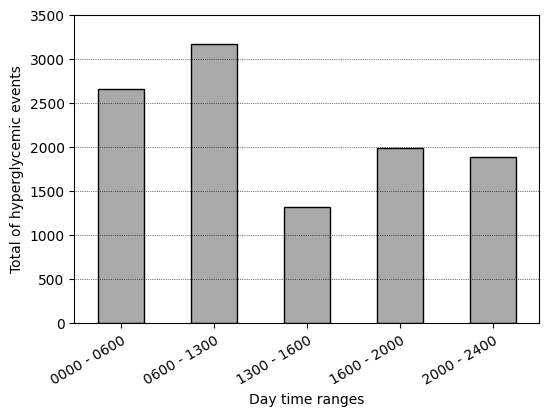

In [169]:
average_graph_series_V2 = general_graph_series_V2[['0000 - 0600 Hyper', '0600 - 1300 Hyper', '1300 - 1600 Hyper', '1600 - 2000 Hyper', '2000 - 2400 Hyper']]
average_graph_series_V2.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V2.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 3500])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Total of hyperglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hyper_V2.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hyper_V2.eps', bbox_inches = "tight")

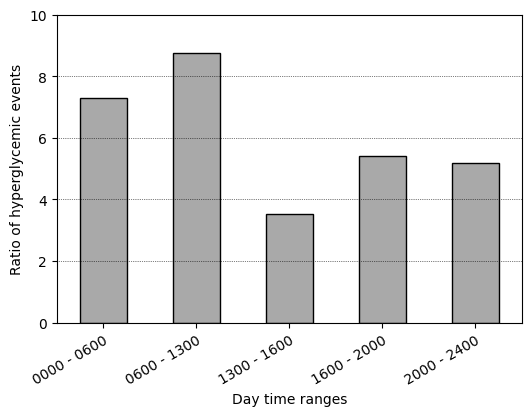

In [170]:
average_graph_series_V1 = general_graph_series_V1[['0000 - 0600 Hyper ratio',
       '0060 - 1300 Hyper ratio', '1300 - 1600 Hyper ratio',
       '1600 - 2000 Hyper ratio', '2000 - 2400 Hyper ratio']]
average_graph_series_V1.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V1.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 10])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Ratio of hyperglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hyper_Ratio_V1.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hyper_Ratio_V1.eps', bbox_inches = "tight")

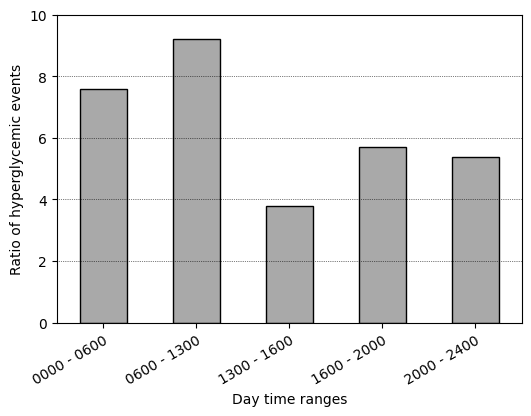

In [171]:
average_graph_series_V2 = general_graph_series_V2[['0000 - 0600 Hyper ratio',
       '0060 - 1300 Hyper ratio', '1300 - 1600 Hyper ratio',
       '1600 - 2000 Hyper ratio', '2000 - 2400 Hyper ratio']]
average_graph_series_V2.index = ['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400']

ax = average_graph_series_V2.plot(kind='bar', figsize=(6,4), color='darkgray', edgecolor="black")
ax.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(ax.get_xticklabels() , rotation = 30, ha='right', rotation_mode='anchor')

ax.set_ylim([0, 10])

# y_ticks_values = np.arange(0, 14000001, 2000000)
# y_ticks_labels = list(map(str, y_ticks_values/1000000))
# y_ticks = ax.yaxis.set_ticks(y_ticks_values)
# y_labels = ax.yaxis.set_ticklabels(y_ticks_labels)

y_title = ax.set_ylabel('Ratio of hyperglycemic events')
x_title = ax.set_xlabel('Day time ranges')

fig = ax.get_figure()
fig.savefig('Outputs/Total_Hyper_Ratio_V2.jpg', bbox_inches = "tight")
fig.savefig('Outputs/Total_Hyper_Ratio_V2.eps', bbox_inches = "tight")

0000 - 0600 Average    160.463317
0600 - 1300 Average    158.723915
1300 - 1600 Average    156.499425
1600 - 2000 Average    163.932621
2000 - 2400 Average    167.778643
dtype: float64

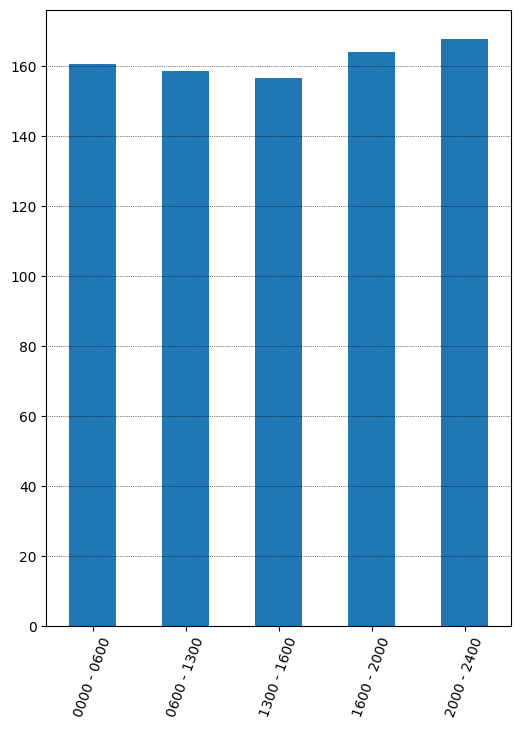

In [96]:
average_graph_series_V1 = general_graph_series_V1[['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']]
ax_average_graph_V1 = average_graph_series_V1.plot(kind='bar', figsize=(6, 8))
ax_average_graph_V1.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_average_graph_V1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_average_graph_V1.get_figure()

fig.savefig('Outputs/Graphs/V1/AttributeAverage-Average-' + graphs_subfij_name_V1 + '.svg')
fig.savefig('Outputs/Graphs/V1/AttributeAverage-Average-' + graphs_subfij_name_V1 + '.jpg')

general_graph_series_V1[['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']]

### Hypoglycemic events in average by range y all the sample

0000 - 0600 Hypo    451.306261
0600 - 1300 Hypo    527.900169
1300 - 1600 Hypo    203.331641
1600 - 2000 Hypo    271.785110
2000 - 2400 Hypo    204.830795
dtype: float64

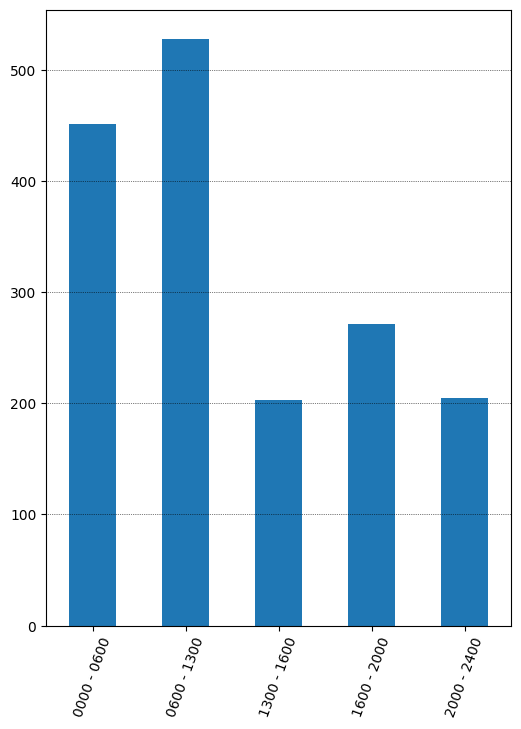

In [36]:
hypo_graph_series_1 = general_graph_series_V1[var_to_plot_hypo_total]
ax_hypo_graph_V1 = hypo_graph_series_1.plot(kind='bar', figsize=(6, 8))
ax_hypo_graph_V1.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_hypo_graph_V1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_hypo_graph_V1.get_figure()

fig.savefig('Outputs/Graphs/V1/AttributeAverage-hypoglycemia-' + graphs_subfij_name_V1 + '.jpg')
fig.savefig('Outputs/Graphs/V1/AttributeAverage-hypoglycemia-' + graphs_subfij_name_V1 + '.svg')
#
general_graph_series_V1[var_to_plot_hypo_total]

### Hypoglycemic events ratio in average by range y all the sample

0000 - 0600 Hypo ratio    1.138861
0060 - 1300 Hypo ratio    1.292906
1300 - 1600 Hypo ratio    0.494517
1600 - 2000 Hypo ratio    0.674328
2000 - 2400 Hypo ratio    0.496344
dtype: float64

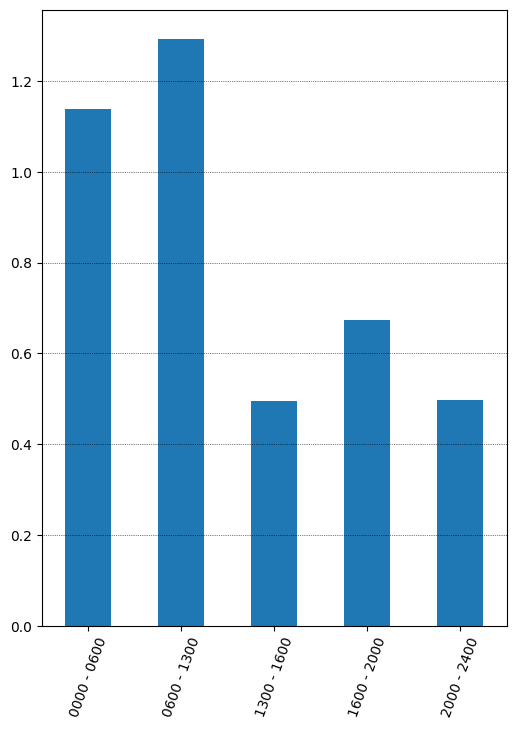

In [37]:
hypo_graph_series_1 = general_graph_series_V1[var_to_plot_hypo_ratio]
ax_hypo_graph_V1 = hypo_graph_series_1.plot(kind='bar', figsize=(6, 8))
ax_hypo_graph_V1.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_hypo_graph_V1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_hypo_graph_V1.get_figure()

fig.savefig('Outputs/Graphs/V1/AttributeAverage-hypoglycemia-ratio' + graphs_subfij_name_V1 + '.jpg')
fig.savefig('Outputs/Graphs/V1/AttributeAverage-hypoglycemia-ratio' + graphs_subfij_name_V1 + '.svg')
#
general_graph_series_V1[var_to_plot_hypo_ratio]

### Hyperglycemic events in average by range y all the sample

0000 - 0600 Hyper    2786.685279
0600 - 1300 Hyper    3324.692047
1300 - 1600 Hyper    1362.013536
1600 - 2000 Hyper    2075.541455
2000 - 2400 Hyper    1980.913706
dtype: float64

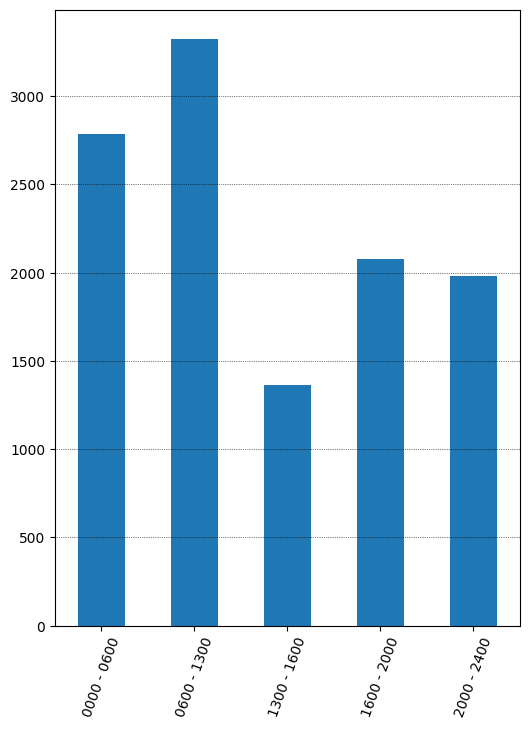

In [38]:
hyper_graph_series_V1 = general_graph_series_V1[var_to_plot_hyper_total]
ax_hyper_graph_V1 = hyper_graph_series_V1.plot(kind='bar', figsize=(6, 8))
ax_hyper_graph_V1.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_hyper_graph_V1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_hyper_graph_V1.get_figure()

fig.savefig('Outputs/Graphs/V1/AttributeAverage-hyperglycemia-' + graphs_subfij_name_V1 + '.jpg')
fig.savefig('Outputs/Graphs/V1/AttributeAverage-hyperglycemia-' + graphs_subfij_name_V1 + '.svg')

general_graph_series_V1[var_to_plot_hyper_total]

### Hyperglycemic events ratio in average by range y all the sample

0000 - 0600 Hyper ratio    7.283099
0060 - 1300 Hyper ratio    8.741105
1300 - 1600 Hyper ratio    3.532014
1600 - 2000 Hyper ratio    5.408258
2000 - 2400 Hyper ratio    5.167366
dtype: float64

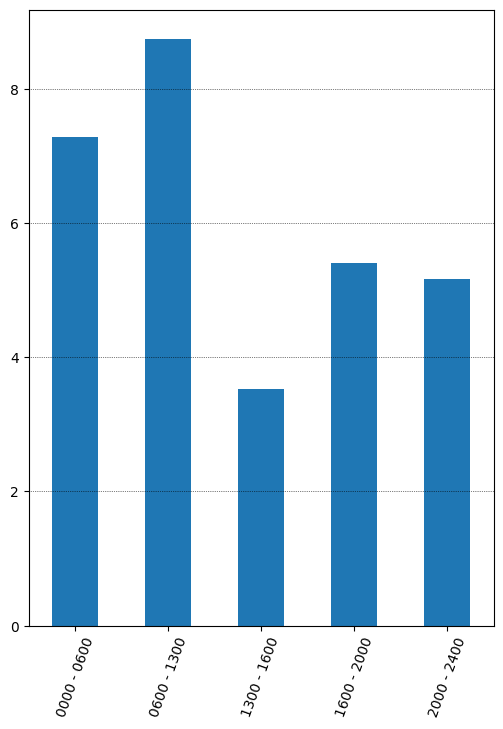

In [39]:
hyper_graph_series_V1 = general_graph_series_V1[var_to_plot_hyper_ratio]
ax_hyper_graph_V1 = hyper_graph_series_V1.plot(kind='bar', figsize=(6, 8))
ax_hyper_graph_V1.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_hyper_graph_V1.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_hyper_graph_V1.get_figure()

fig.savefig('Outputs/Graphs/V1/AttributeAverage-hyperglycemia-ratio' + graphs_subfij_name_V1 + '.jpg')
fig.savefig('Outputs/Graphs/V1/AttributeAverage-hyperglycemia-ratio' + graphs_subfij_name_V1 + '.svg')

general_graph_series_V1[var_to_plot_hyper_ratio]

### Creating centroids and plotting it

In [40]:
df_best_by_K_V1

,Name,Silhouette Coefficient
0,SOM_K2_data_V1_0,0.384469
1,Gauss_K2_data_V1_1,0.128555
2,Kmeans_K3_data_V1_0,0.284987
3,Kmeans_K4_data_V1_0,0.227920
4,Kmeans_K5_data_V1_0,0.174700
5,Kmeans_K6_data_V1_0,0.181423
6,Kmeans_K7_data_V1_0,0.167949
7,Kmeans_K8_data_V1_0,0.151395


Una celda para crear centroides y otra para graficar
Modificar creación de centroides para que haga una tabla con la desviación estandard

# Creating centroids

C:\Users\Ciro\AppData\Local\Temp\ipykernel_57268\3025676138.py:22: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  aux_series_mean[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].mean(axis=0) # Find the average of the column
C:\Users\Ciro\AppData\Local\Temp\ipykernel_57268\3025676138.py:23: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  aux_series_std[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].std(axis=0) # Find the standard deviation of the column
C:\Users\Ciro\AppData\Local\Temp\ipykernel_57268\3025676138.py:22: FutureWarning: Series.__setitem__ treating keys as positions is deprecat

,Days with measures,0000 - 0600 Hypo ratio,0060 - 1300 Hypo ratio,1300 - 1600 Hypo ratio,1600 - 2000 Hypo ratio,2000 - 2400 Hypo ratio,0000 - 0600 Hyper ratio,0060 - 1300 Hyper ratio,1300 - 1600 Hyper ratio,1600 - 2000 Hyper ratio,...,2000 - 2400 MAX,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,Total_hypo,Total_hyper,Total_hypo ratio,Total_hyper ratio,Model
0,299.369650,1.133305,1.222592,0.506288,0.699435,0.540788,5.426726,6.622367,2.461289,4.073661,...,355.007782,46.750973,0.564202,123.904000,3.231183,1483.828794,7199.525292,4.818712,26.562920,SOM_K2_data_V1_0
1,451.988024,1.143136,1.347009,0.485459,0.655010,0.462147,8.711506,10.371392,4.355896,6.435179,...,458.793413,41.395210,0.485030,113.557576,3.293578,2368.371257,18334.742515,4.954311,42.095274,SOM_K2_data_V1_0
2,299.369650,1.133305,1.222592,0.506288,0.699435,0.540788,5.426726,6.622367,2.461289,4.073661,...,355.007782,46.750973,0.564202,123.904000,3.231183,1483.828794,7199.525292,4.818712,26.562920,SOM_K2_data_V1_0
3,451.988024,1.143136,1.347009,0.485459,0.655010,0.462147,8.711506,10.371392,4.355896,6.435179,...,458.793413,41.395210,0.485030,113.557576,3.293578,2368.371257,18334.742515,4.954311,42.095274,SOM_K2_data_V1_0
4,346.396226,1.129068,1.316189,0.440444,0.607166,0.442373,9.274468,11.355645,4.861183,7.121407,...,450.183962,43.688679,0.514151,113.132701,3.778571,1726.419811,15941.783019,4.810985,45.648792,Gauss_K2_data_V1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,507.831325,1.102398,1.357380,0.443591,0.611025,0.387969,10.006050,12.013105,5.249939,7.413619,...,492.445783,39.843373,0.518072,124.463415,3.354839,2518.530120,24099.325301,4.816153,48.688659,Kmeans_K8_data_V1_0
70,395.604651,1.277754,1.394368,0.455273,0.656376,0.497202,6.208075,8.189885,3.855121,5.647157,...,424.348837,46.232558,0.441860,128.261905,3.777778,1688.465116,12573.302326,5.220068,33.052914,Kmeans_K8_data_V1_0
71,268.294872,0.997712,0.998864,0.405721,0.558253,0.430993,5.137980,5.870025,2.129791,4.012231,...,332.602564,48.358974,0.602564,114.306667,3.109091,1148.602564,5574.012821,3.984687,24.323968,Kmeans_K8_data_V1_0
72,341.841463,0.879307,1.206177,0.342144,0.514156,0.337144,8.665880,9.148406,4.094458,6.247144,...,436.792683,40.865854,0.597561,112.365854,2.867925,1583.341463,12706.902439,4.142961,39.604870,Kmeans_K8_data_V1_0


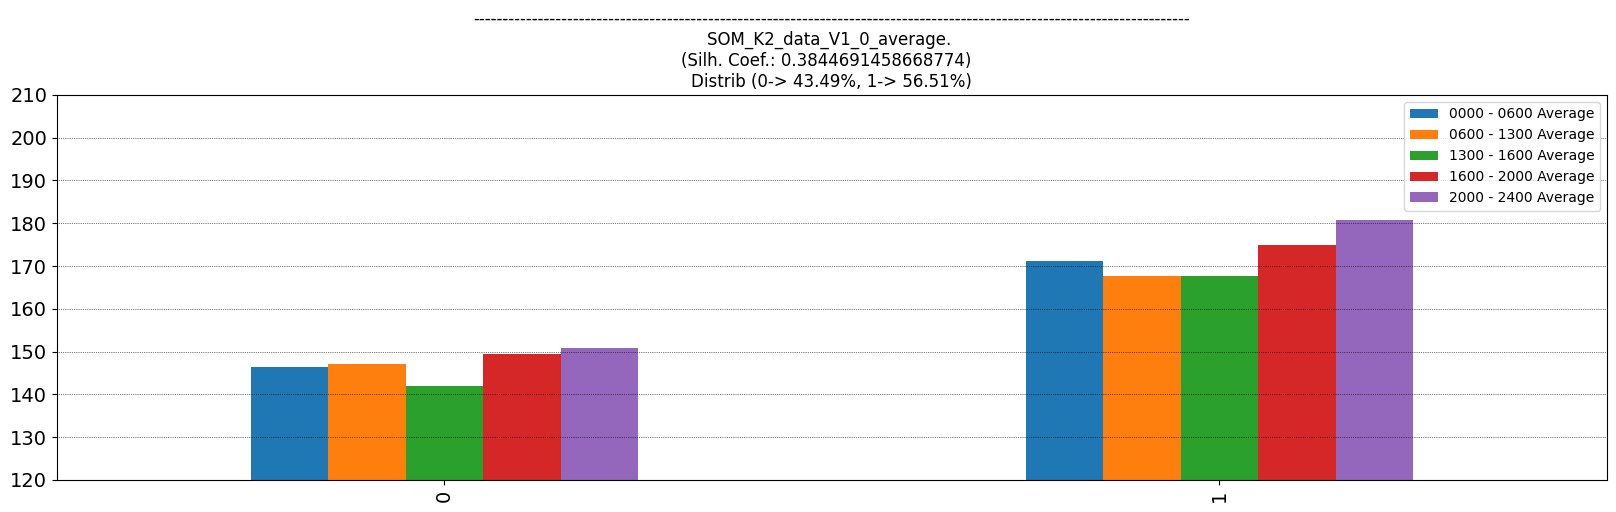

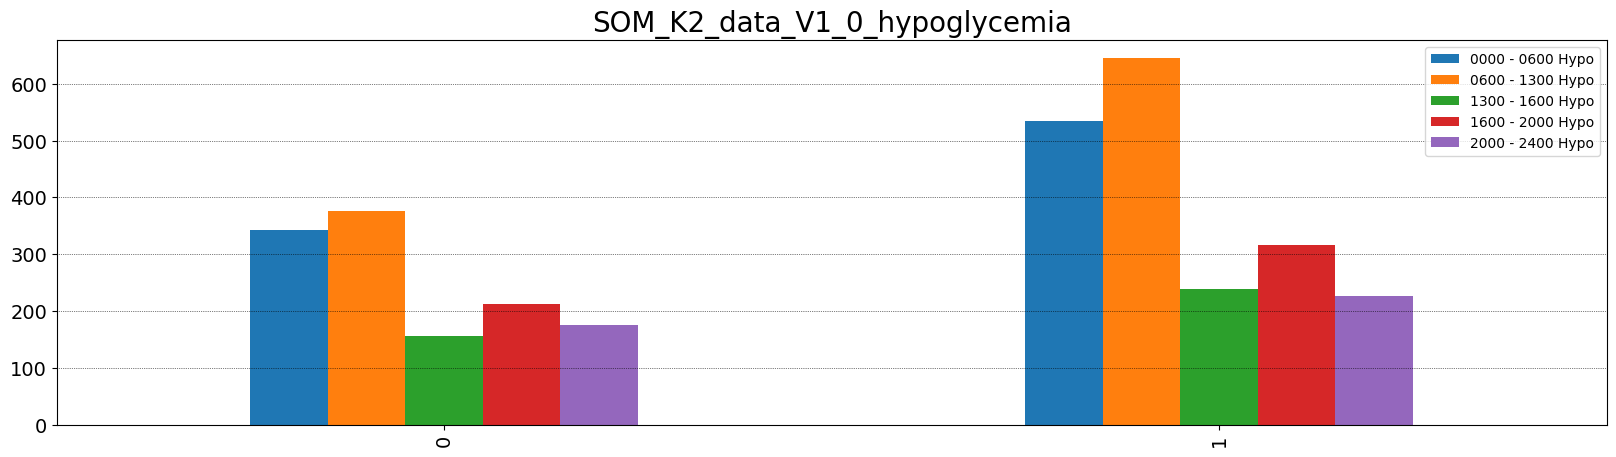

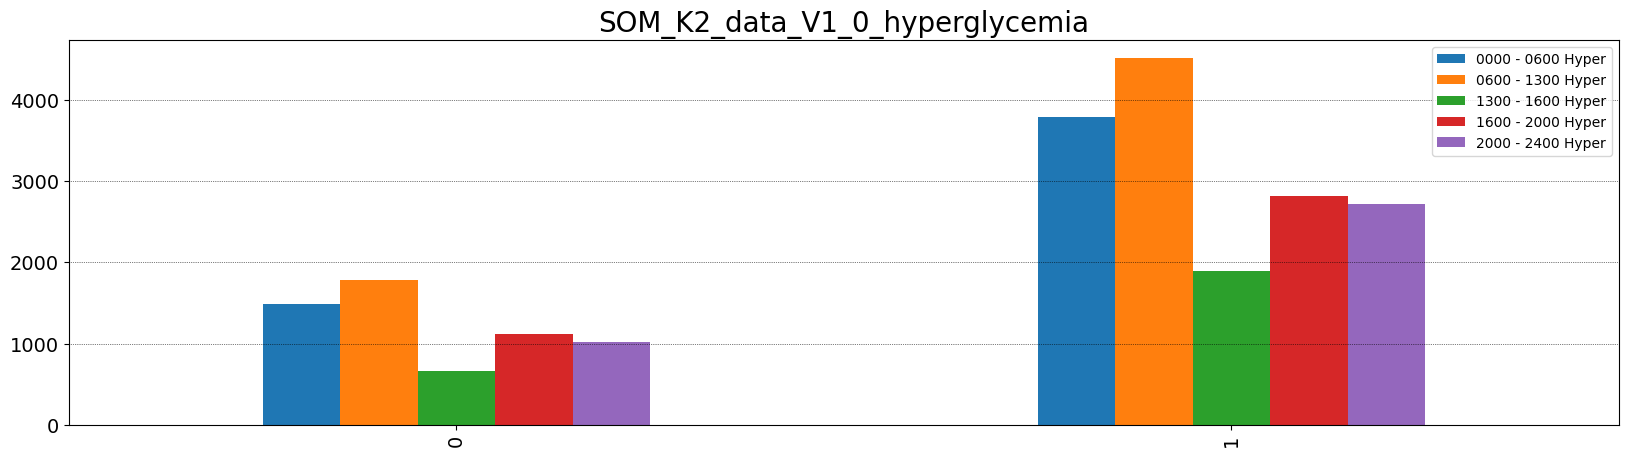

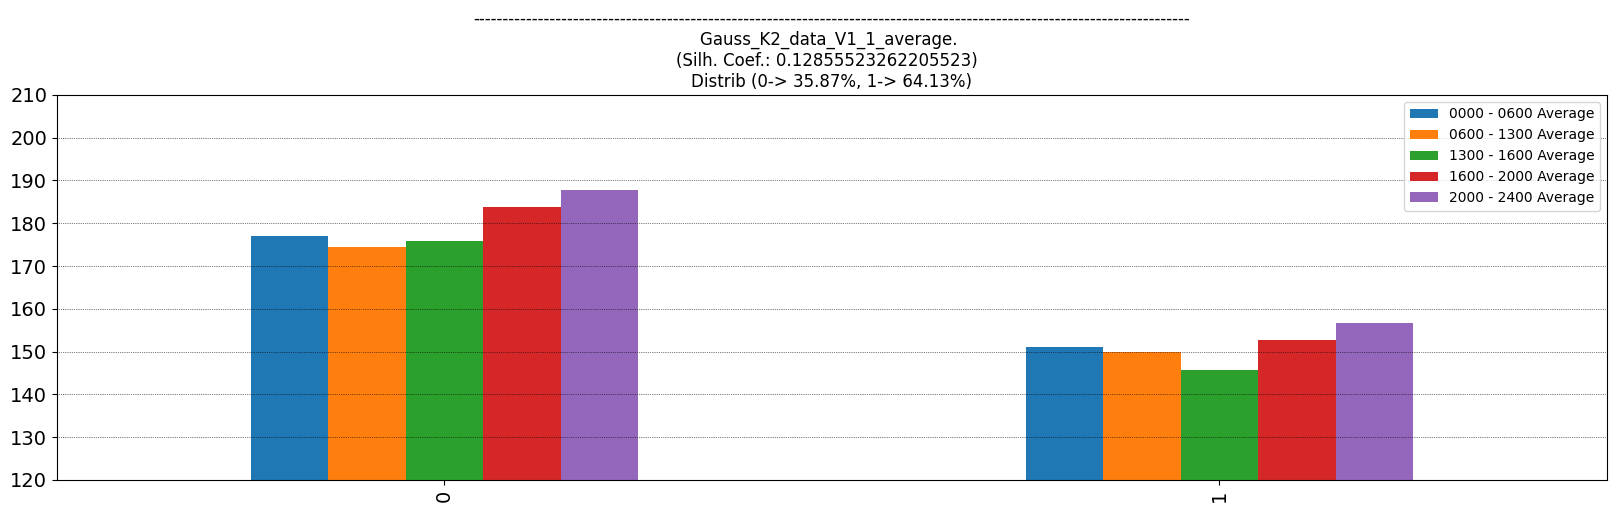

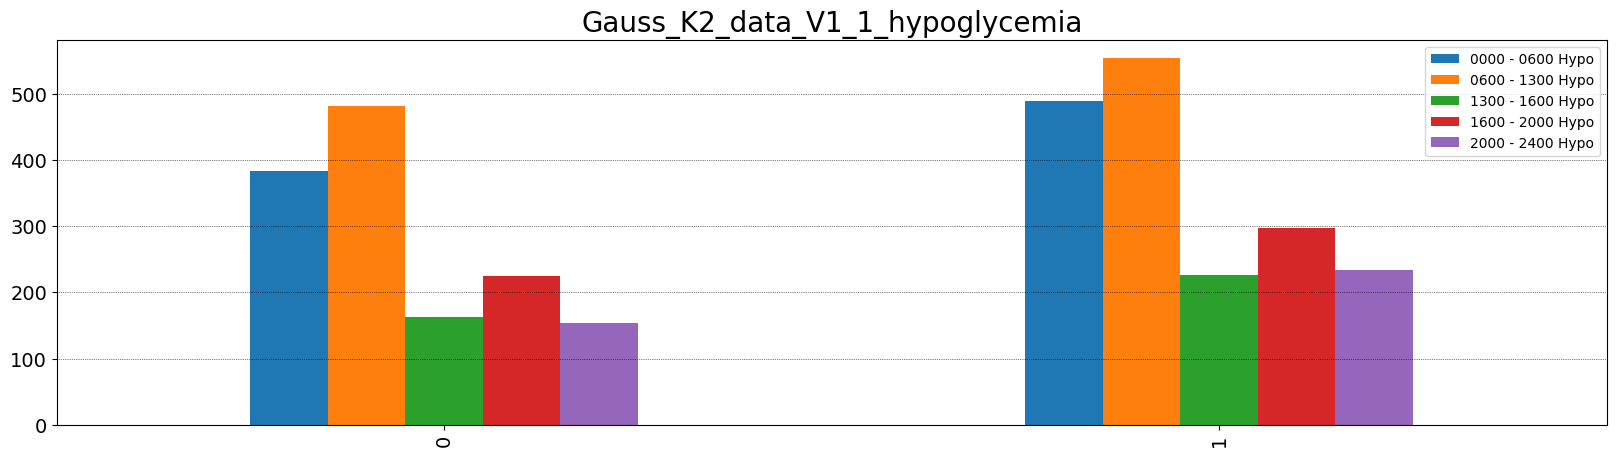

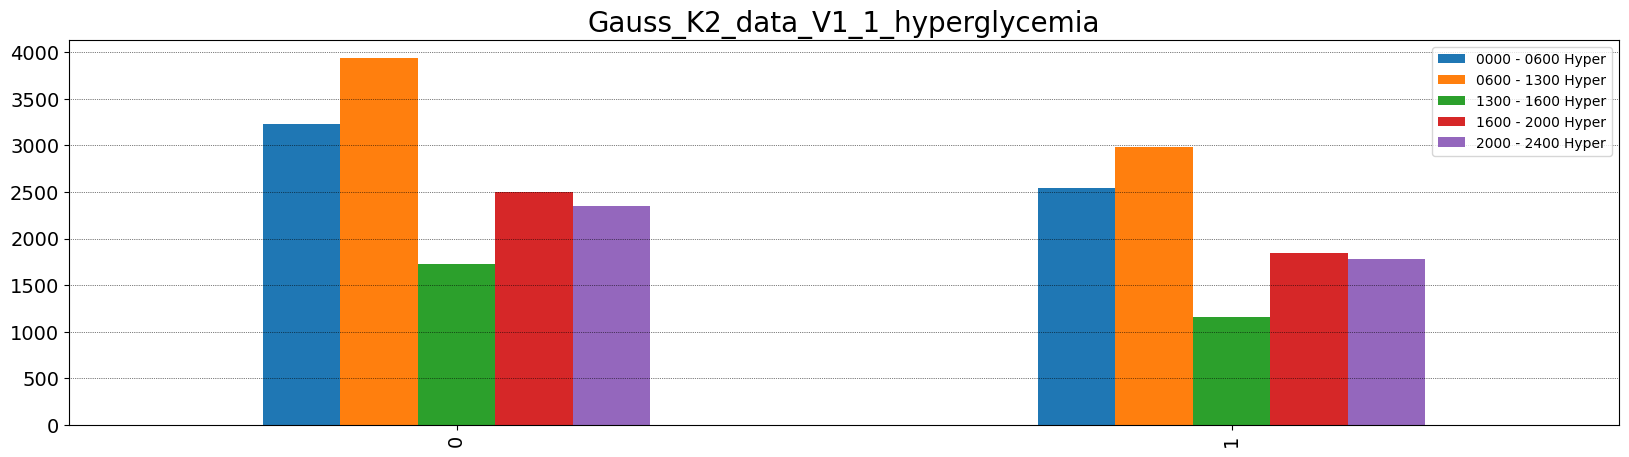

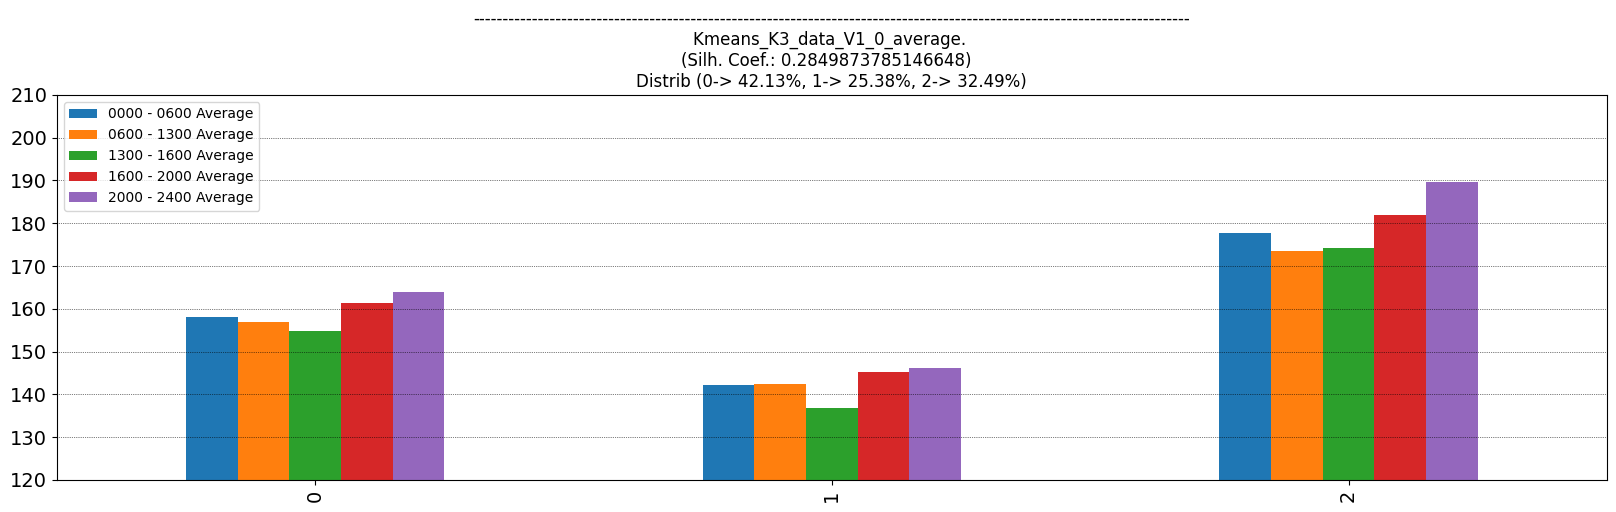

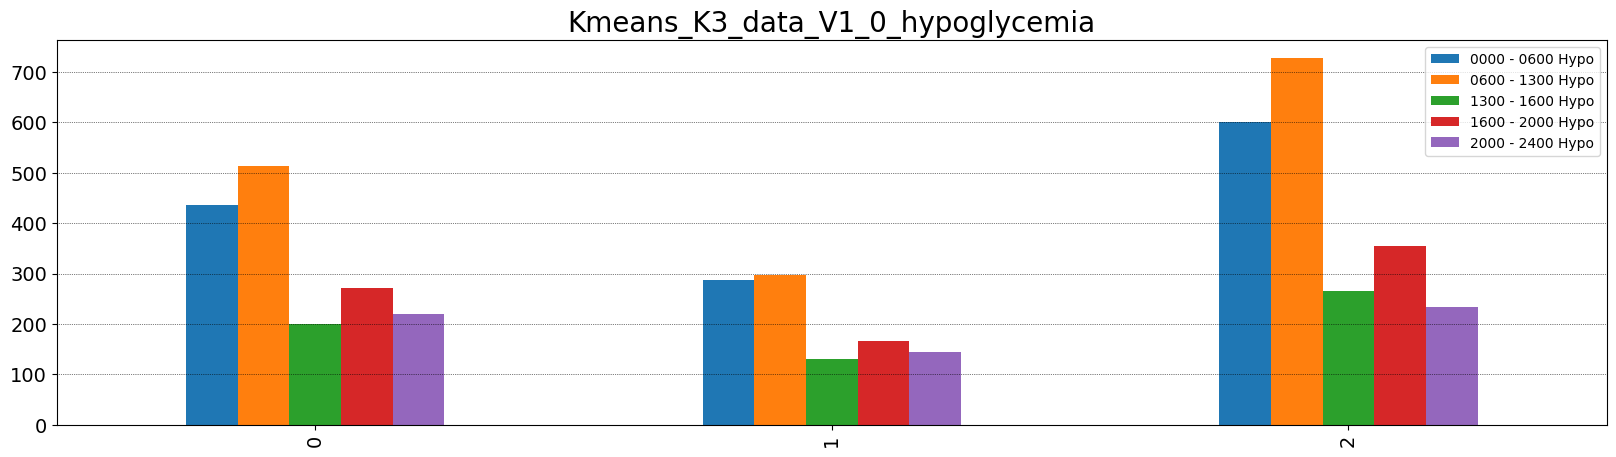

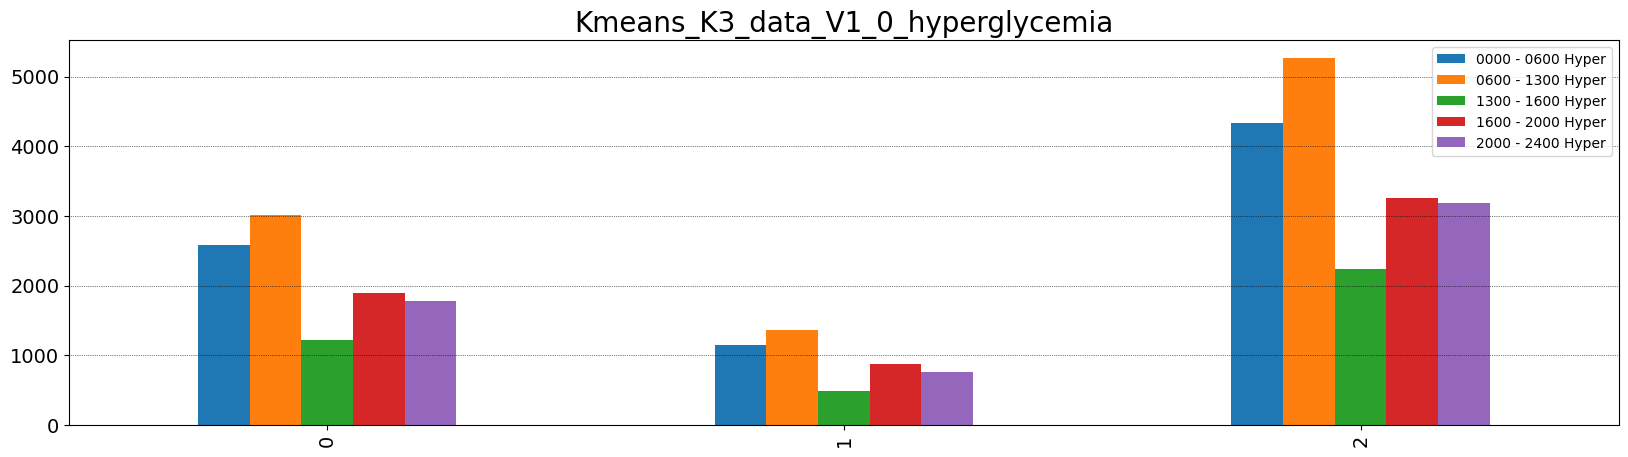

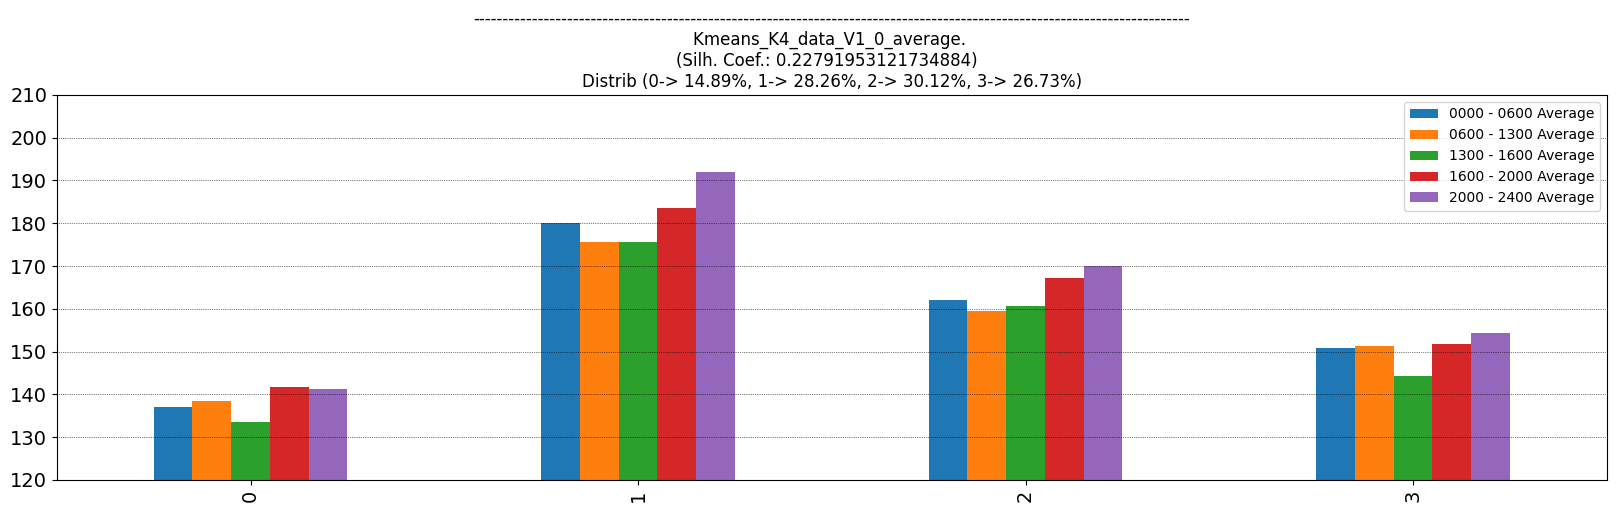

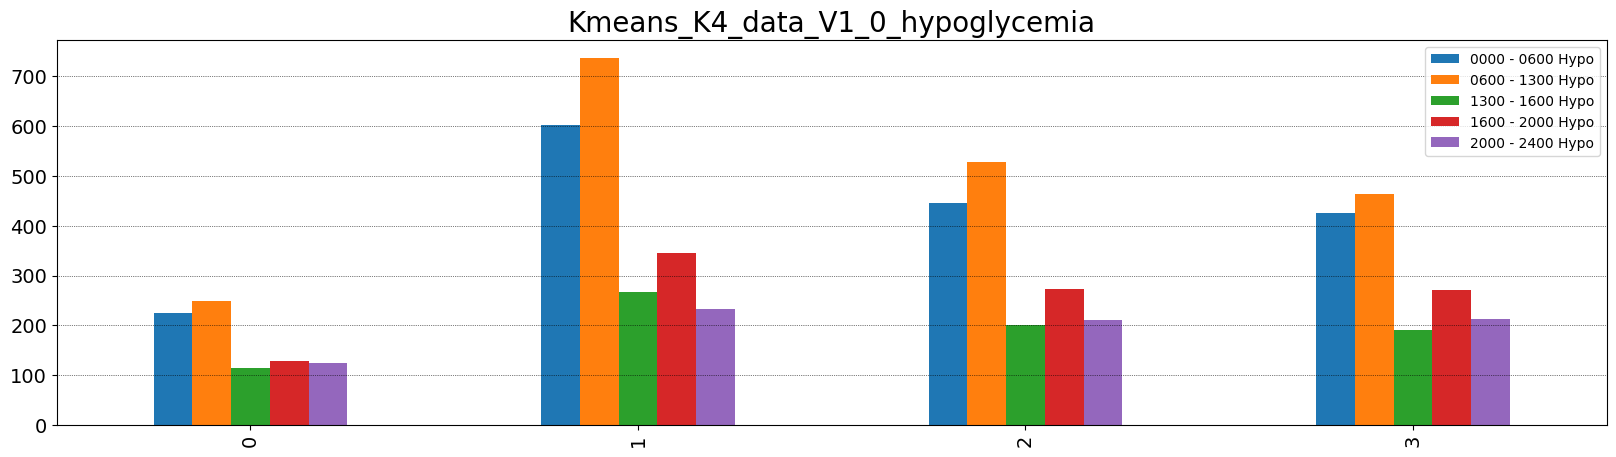

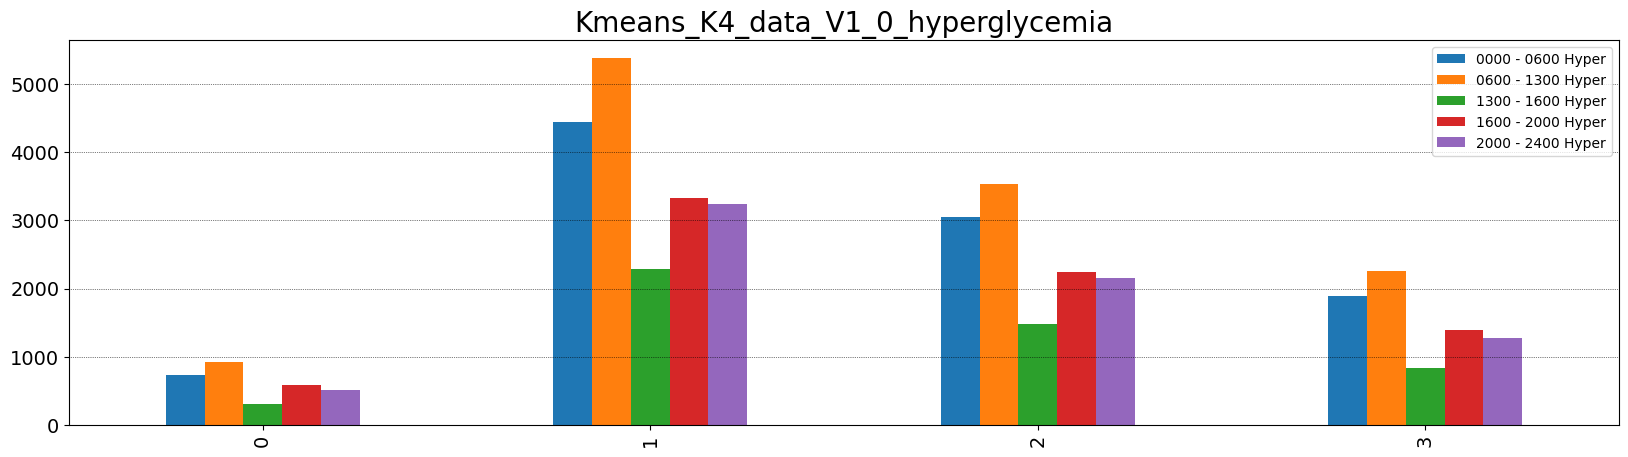

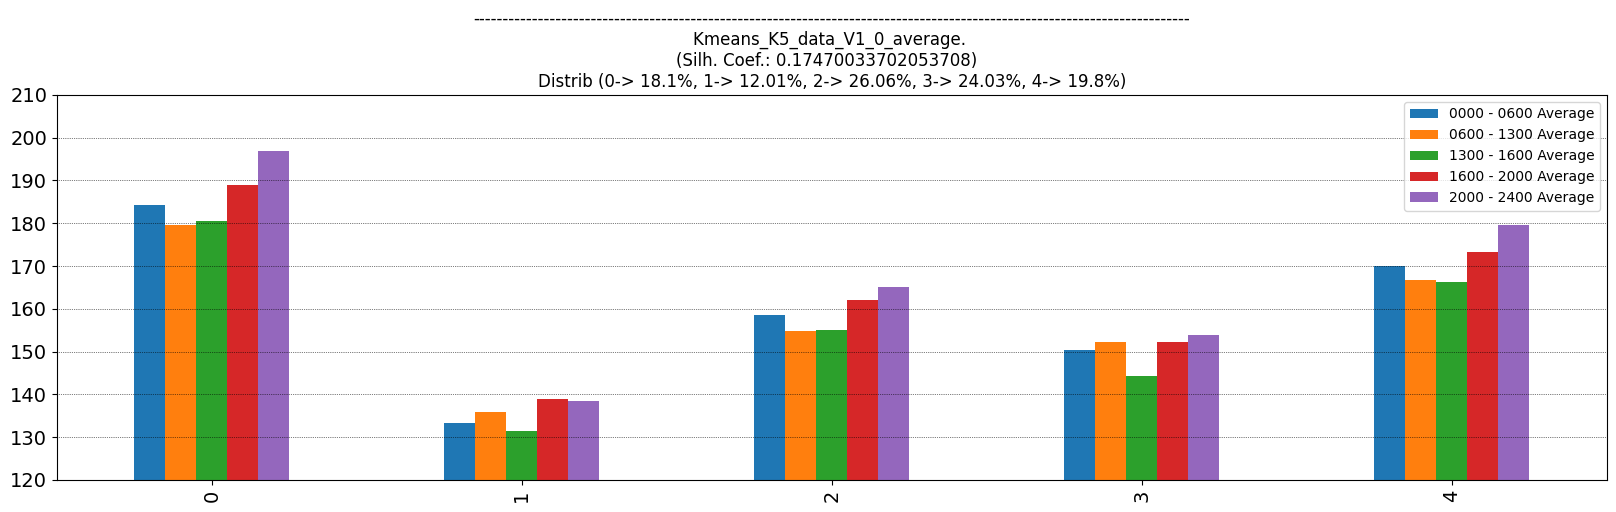

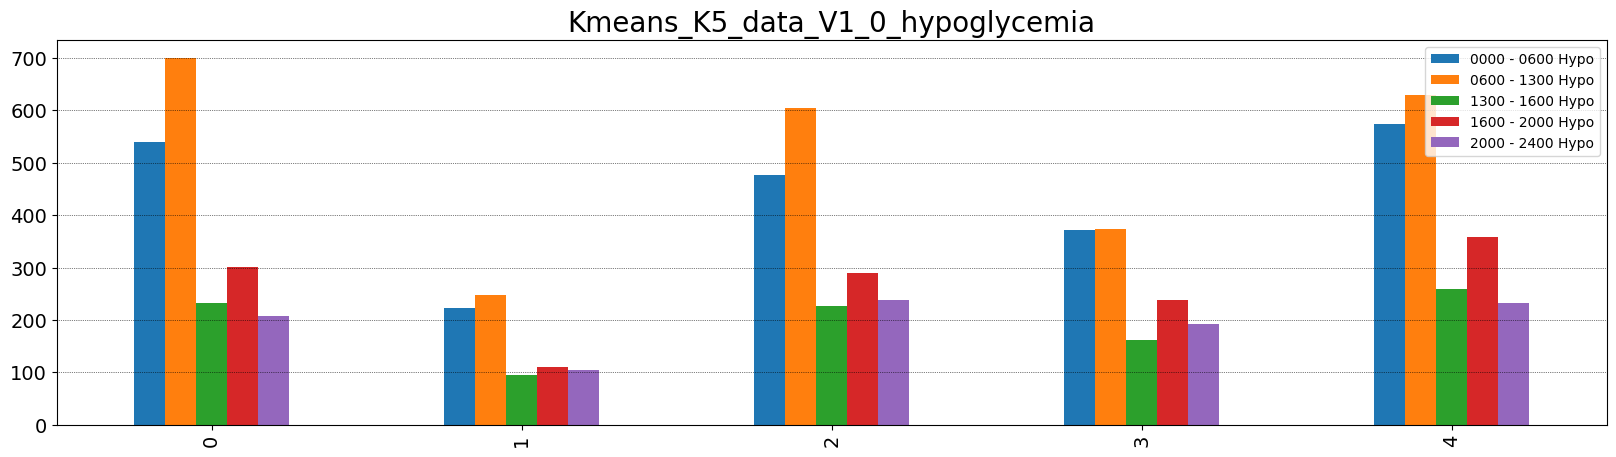

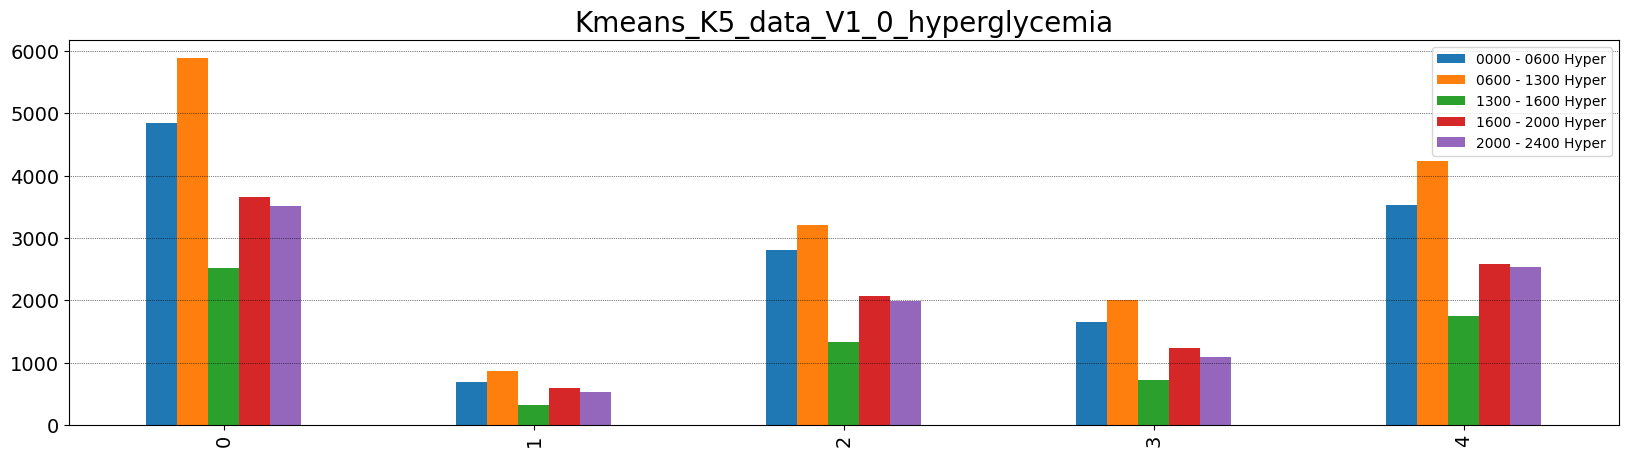

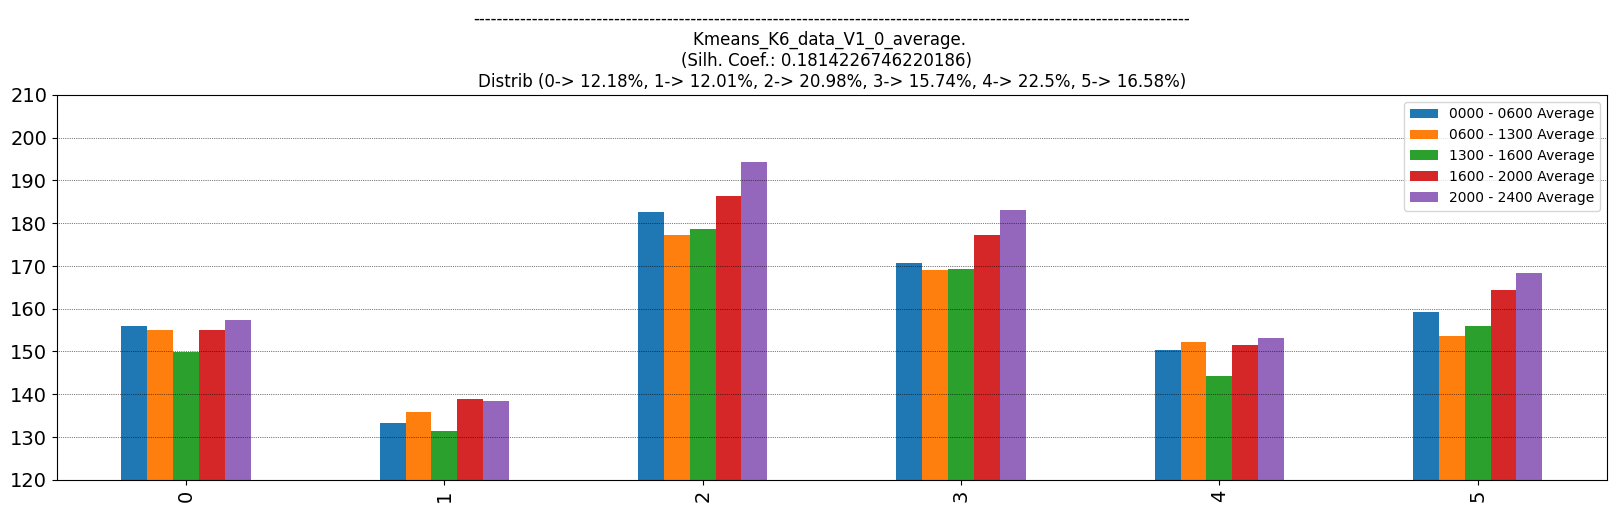

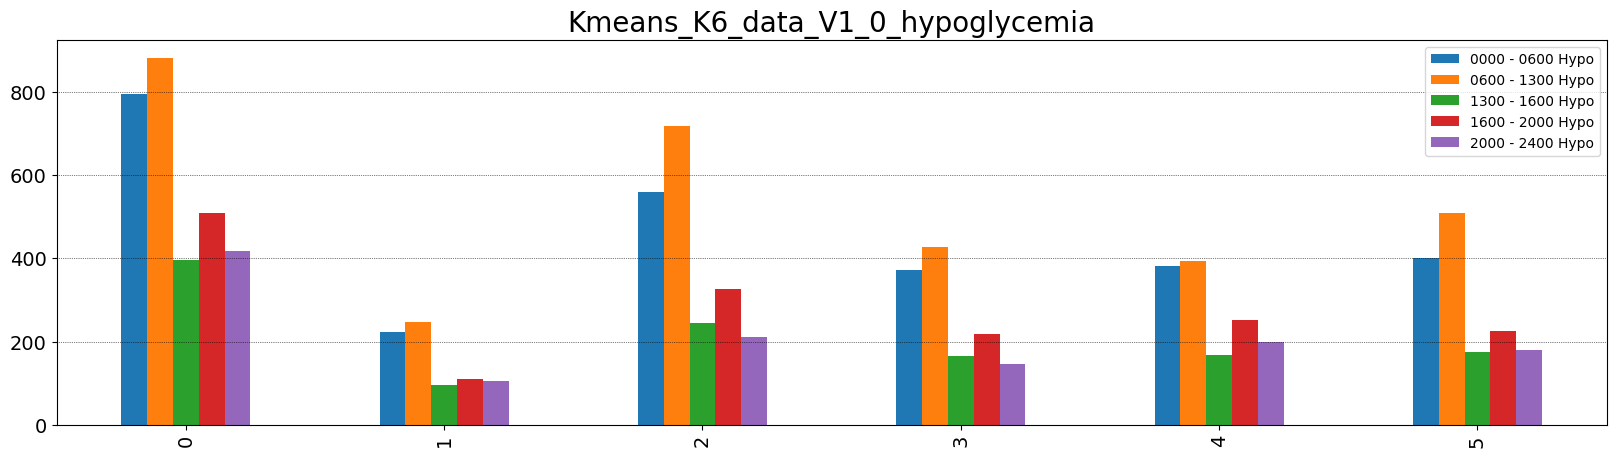

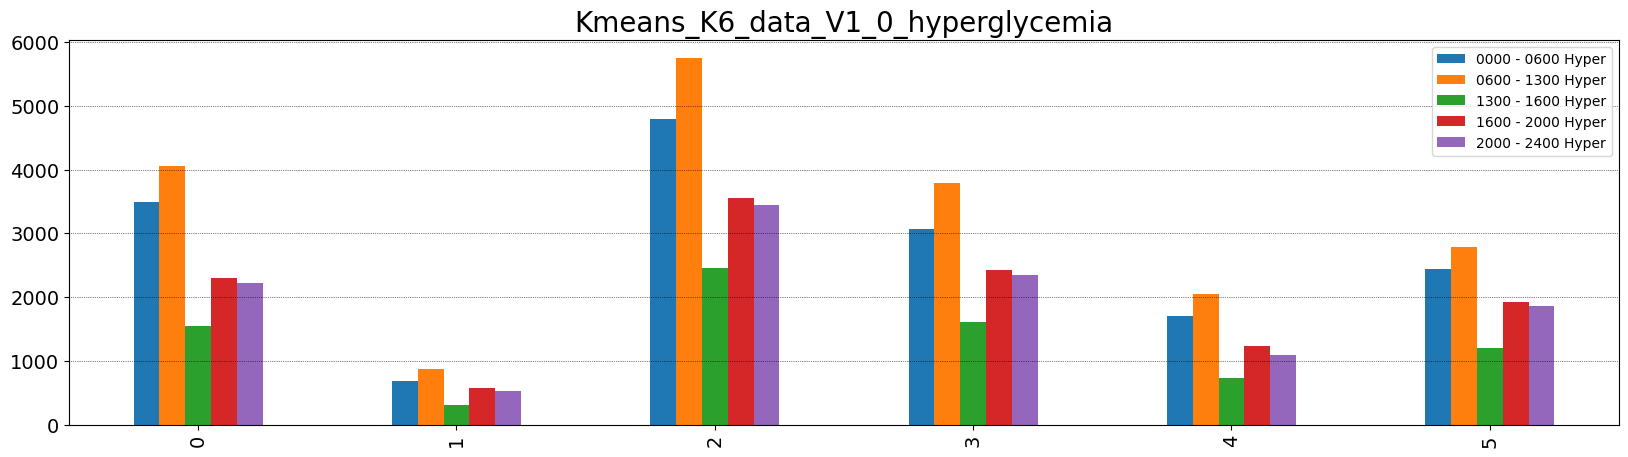

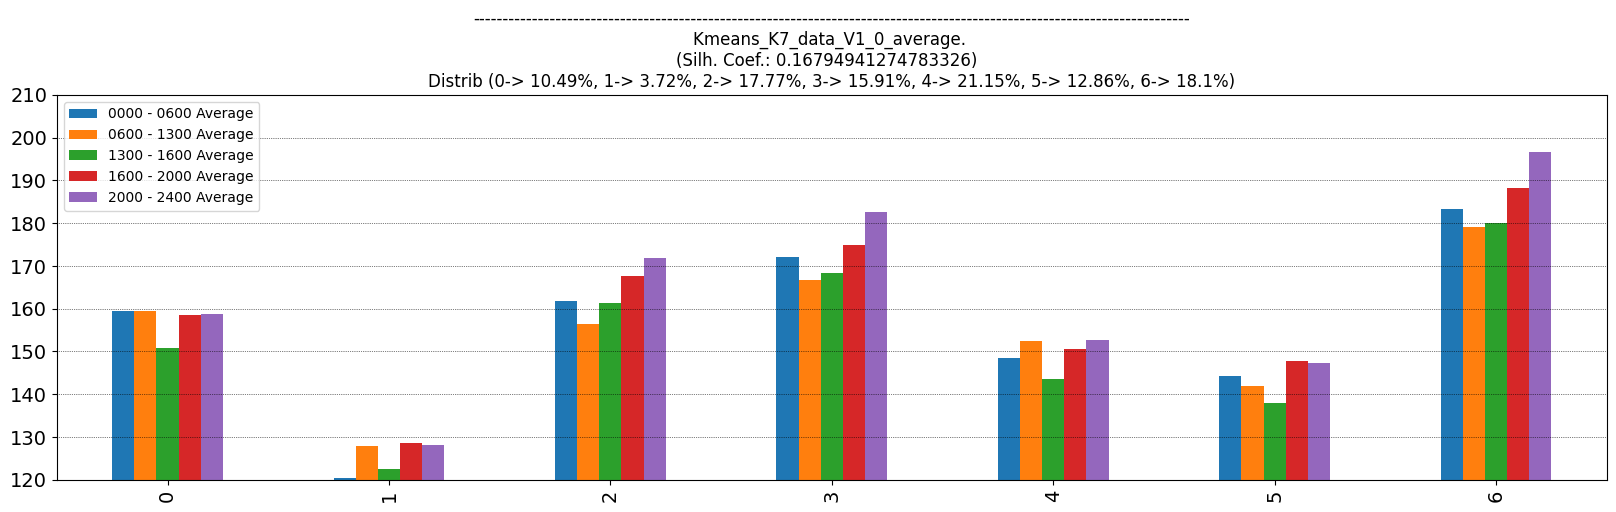

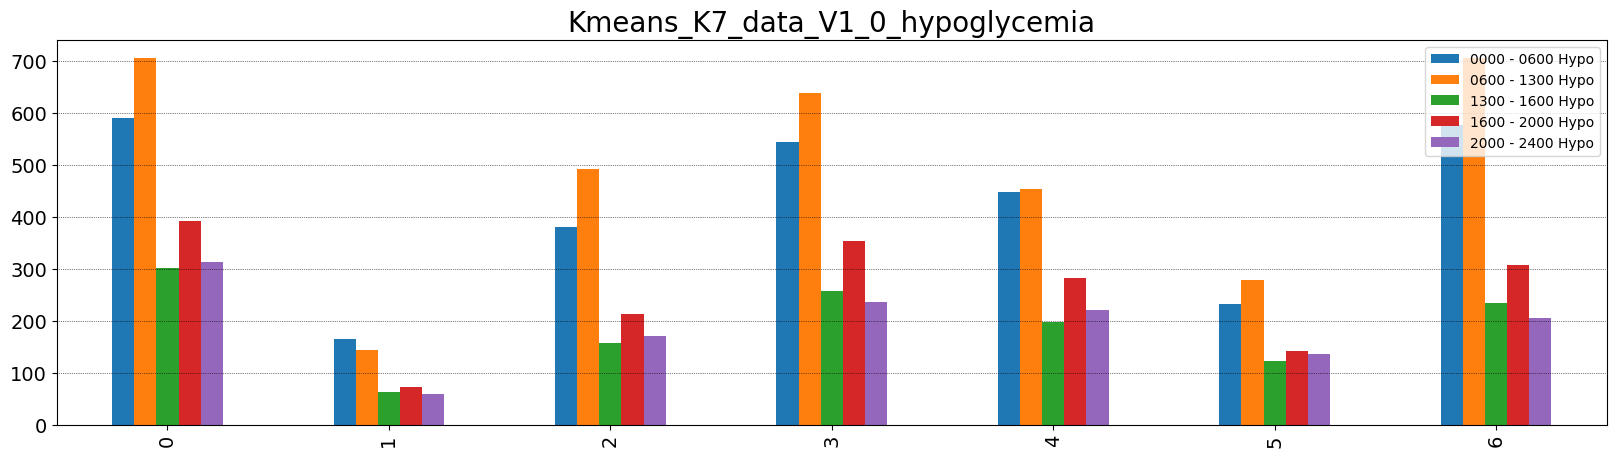

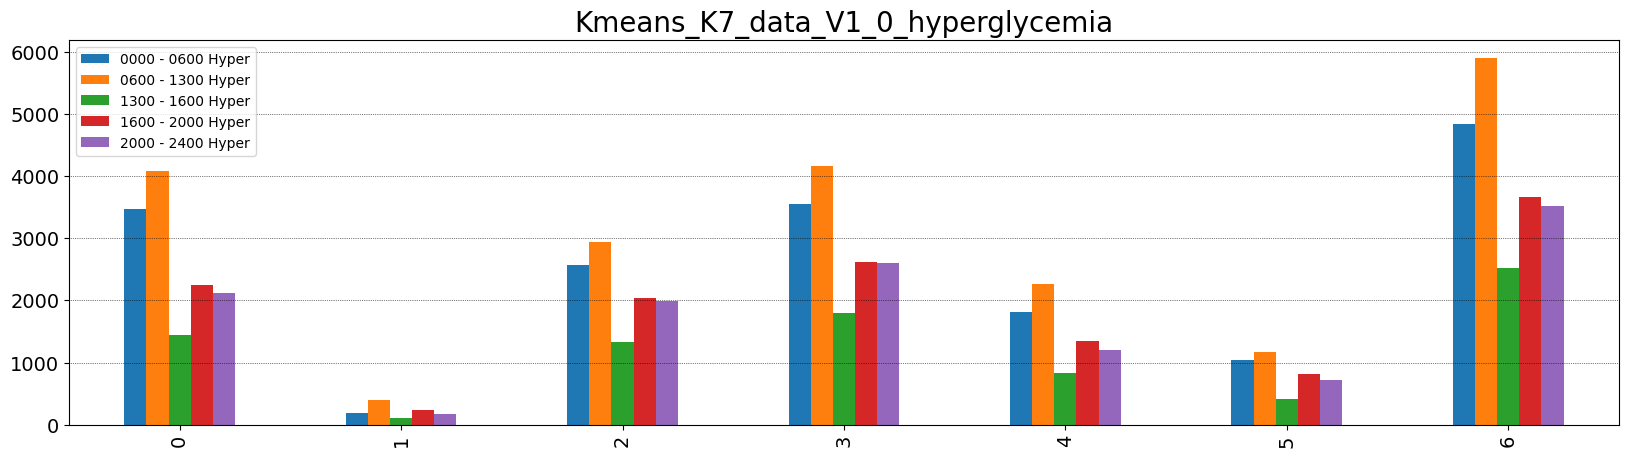

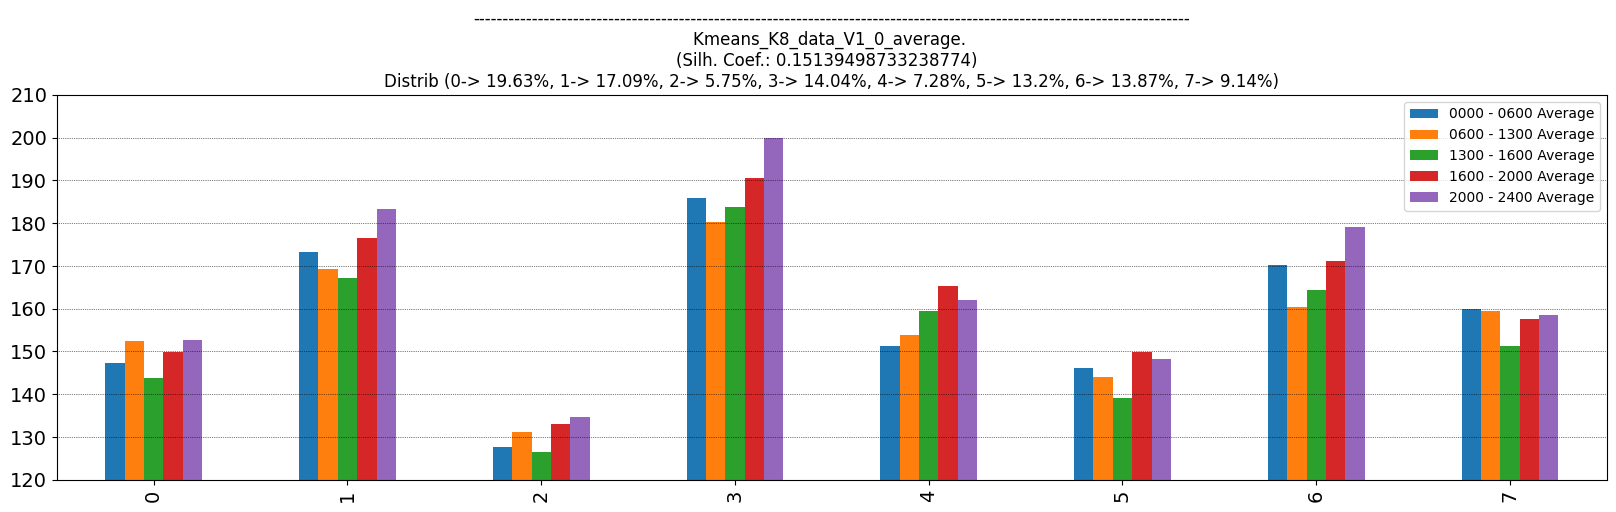

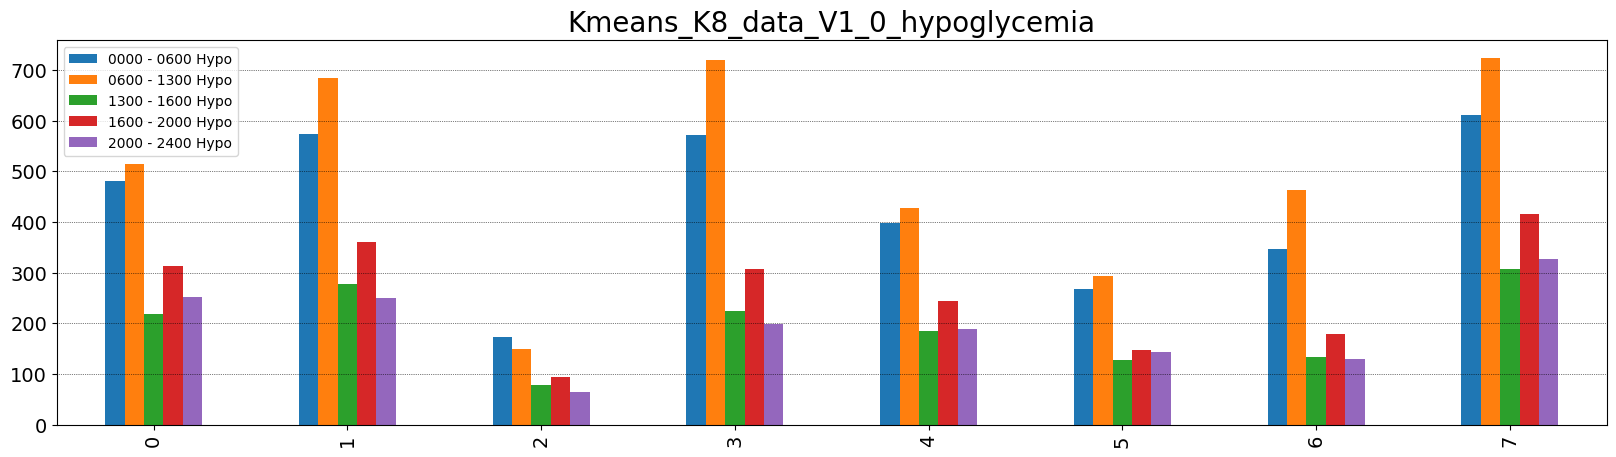

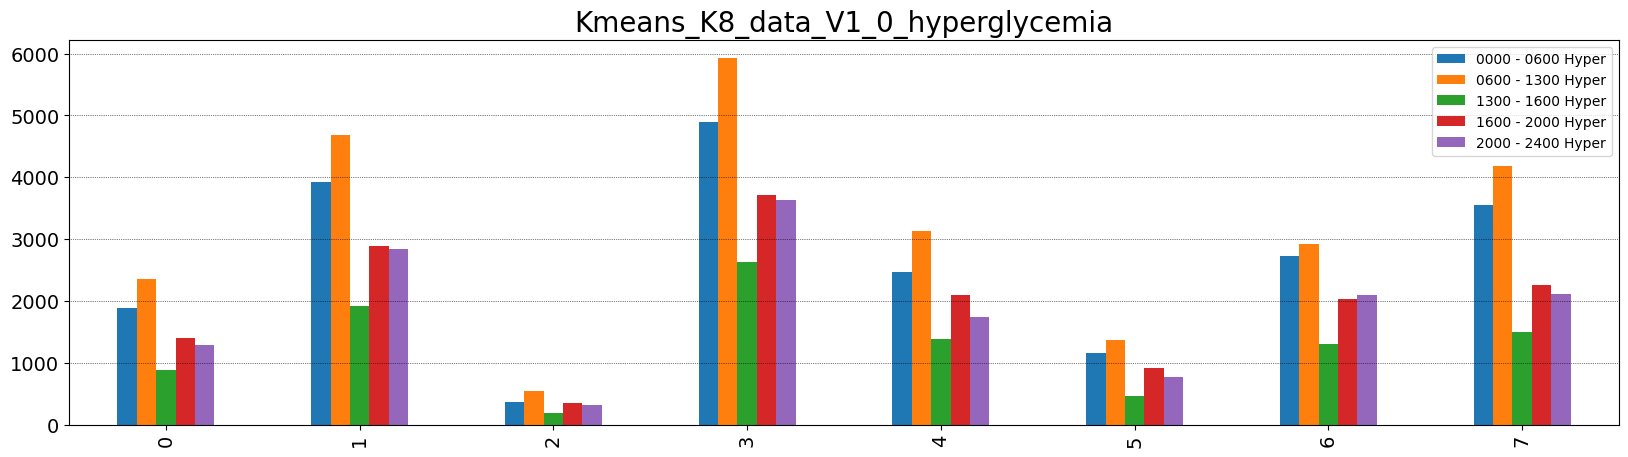

In [39]:
# Create the centroids (as dataframe) of the clustering results pick as best

# Dataframe to storage the centroids. All centroids will be together and must be identified by the column "Model".
df_centroids_V1_mean = pd.DataFrame(columns=df_no_std_V1[var_to_centroids_analysis].columns.insert(variable_number, 'Model'))
df_centroids_V1_format = pd.DataFrame(columns=df_no_std_V1[var_to_centroids_analysis].columns.insert(variable_number, 'Model'))

for n_best_clustering in range(0, df_best_by_K_V1.shape[0]):
    current_name = df_best_by_K_V1.loc[n_best_clustering]['Name'] # Name given to the current model instance
    current_silh_value = df_best_by_K_V1.loc[n_best_clustering]['Silhouette Coefficient'] # Silhouette Coefficient of the current model instance
    # data_number = get_dataset_number(current_name) # current_name[len(current_name) - 1] # The last character of the name it is the file data used

    # Get the value count series to printed in the label of the plot
    s_to_conv = df_all_labels_V1[current_name].value_counts(dropna=False)
    info_to_add = serie_to_str(s_to_conv, df_all_labels_V1.shape[0])

    k_number = get_k(current_name) # int(current_name[len(current_name) - 7])

    aux_cen = create_centroids(df_no_std_V1[var_to_centroids_analysis], labels=df_all_labels_V1[current_name], k=k_number)

    aux_cen_mean = aux_cen[0]
    aux_cen_mean['Model'] = current_name
    df_centroids_V1_mean = pd.concat([df_centroids_V1_mean, aux_cen_mean], ignore_index=True)

    aux_cen_std = aux_cen[1]
    aux_cen_std['Model'] = current_name
    aux_cen_format = aux_cen_mean.round(2).astype(str) + " +-" + aux_cen_std.round(2).astype(str)

    df_centroids_V1_format = pd.concat([df_centroids_V1_format, aux_cen_format], ignore_index=True)



    # Plotting just the average
    sep = '--------------------------------------------------------------------------------------------------------------------------\n'
    ax_ave = aux_cen_mean[var_to_plot_ave].plot(kind='bar',
                                                figsize=(20, 5),
                                                title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                                fontsize=14
                                                )
    # ax_ave.axes.title.set_size(20)
    ax_ave.set_ylim([120, 210])
    ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
    fig_ave = ax_ave.get_figure()
    fig_ave.savefig('Outputs/Graphs/V1/' + current_name + '_ave -' + graphs_subfij_name_V1 + '.svg', bbox_inches = "tight")
    fig_ave.savefig('Outputs/Graphs/V1/' + current_name + '_ave -' + graphs_subfij_name_V1 + '.jpg', bbox_inches = "tight")

    # Plotting the hypoglycemia
    ax_ave = aux_cen_mean[var_to_plot_hypo_total].plot(kind='bar',
                                                       figsize=(20, 5),
                                                       title=current_name + '_hypoglycemia',
                                                       fontsize=14
                                                       )
    ax_ave.axes.title.set_size(20)
    # ax_ave.set_ylim([120, 210])
    ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
    fig_ave = ax_ave.get_figure()
    fig_ave.savefig('Outputs/Graphs/V1/' + current_name + '_hypo -' + graphs_subfij_name_V1 + '.svg', bbox_inches = "tight")
    fig_ave.savefig('Outputs/Graphs/V1/' + current_name + '_hypo -' + graphs_subfij_name_V1 + '.jpg', bbox_inches = "tight")

    # Plotting the hyperglycemia
    ax_ave = aux_cen_mean[var_to_plot_hyper_total].plot(kind='bar',
                                                        figsize=(20, 5),
                                                        title=current_name + '_hyperglycemia',
                                                        fontsize=14
                                                        )
    ax_ave.axes.title.set_size(20)
    # ax_ave.set_ylim([120, 210])
    ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
    fig_ave = ax_ave.get_figure()
    fig_ave.savefig('Outputs/Graphs/V1/' + current_name + '_hyper -' + graphs_subfij_name_V1 + '.svg', bbox_inches = "tight")
    fig_ave.savefig('Outputs/Graphs/V1/' + current_name + '_hyper -' + graphs_subfij_name_V1 + '.jpg', bbox_inches = "tight")

    aux_cen_mean['Model'] = current_name
    df_centroids_V1_mean = pd.concat([df_centroids_V1_mean, aux_cen_mean], ignore_index=True)

df_centroids_V1_mean

# Custom graphs

In [40]:
df_best_by_K_V1

,Name,Silhouette Coefficient
0,SOM_K2_data_V1_0,0.384469
1,Gauss_K2_data_V1_1,0.128555
2,Kmeans_K3_data_V1_0,0.284987
3,Kmeans_K4_data_V1_0,0.227920
4,Kmeans_K5_data_V1_0,0.174700
5,Kmeans_K6_data_V1_0,0.181423
6,Kmeans_K7_data_V1_0,0.167949
7,Kmeans_K8_data_V1_0,0.151395


In [41]:
current_name = df_best_by_K_V1.loc[5]['Name'] # Name given to the current model instance
current_silh_value = df_best_by_K_V1.loc[n_best_clustering]['Silhouette Coefficient'] # Silhouette Coefficient of the current model instance
# data_number = get_dataset_number(current_name) # current_name[len(current_name) - 1] # The last character of the name it is the file data used

# Get the value count series to printed in the label of the plot
s_to_conv = df_all_labels_V1[current_name].value_counts(dropna=False)
info_to_add = serie_to_str(s_to_conv, df_all_labels_V1.shape[0])

k_number = get_k(current_name) # int(current_name[len(current_name) - 7])

aux_cen = create_centroids(df_no_std_V1[var_to_centroids_analysis], labels=df_all_labels_V1[current_name], k=k_number)

aux_cen_mean = aux_cen[0]
aux_cen_mean['Model'] = current_name
df_centroids_V1_mean = pd.concat([df_centroids_V1_mean, aux_cen_mean], ignore_index=True)

aux_cen_std = aux_cen[1]
aux_cen_std['Model'] = current_name
aux_cen_format = aux_cen_mean.round(2).astype(str) + " +-" + aux_cen_std.round(2).astype(str)

df_centroids_V1_format = pd.concat([df_centroids_V1_format, aux_cen_format], ignore_index=True)


C:\Users\Ciro\AppData\Local\Temp\ipykernel_57268\3025676138.py:22: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  aux_series_mean[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].mean(axis=0) # Find the average of the column
C:\Users\Ciro\AppData\Local\Temp\ipykernel_57268\3025676138.py:23: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  aux_series_std[n_th_attribute] = aux_df[filter_].iloc[:, n_th_attribute].std(axis=0) # Find the standard deviation of the column
C:\Users\Ciro\AppData\Local\Temp\ipykernel_57268\3025676138.py:22: FutureWarning: Series.__setitem__ treating keys as positions is deprecat

In [42]:
s_to_conv

Kmeans_K6_data_V1_0
0     72
1     71
2    124
3     93
4    133
5     98
Name: count, dtype: int64

In [94]:
info_to_add

'0-> 12.18%, 1-> 12.01%, 2-> 20.98%, 3-> 15.74%, 4-> 22.5%, 5-> 16.58%'

In [43]:
K6_plot = aux_cen_mean[var_to_plot_ave]
K6_plot.columns = ['0000 - 0600 Early morning', '0600 - 1300 Morning', '1300 - 1600 Noon', '1600 - 2000 Afternoon', '2000 - 2400 Night']
K6_plot

,0000 - 0600 Early morning,0600 - 1300 Morning,1300 - 1600 Noon,1600 - 2000 Afternoon,2000 - 2400 Night
0,156.020069,155.119070,149.923138,155.017395,157.302025
1,133.369394,135.776101,131.508352,138.887194,138.513299
2,182.677956,177.321206,178.512549,186.274044,194.381054
3,170.567997,168.939133,169.323132,177.257573,183.138674
4,150.440822,152.138869,144.290468,151.602421,153.081784
5,159.261516,153.709378,155.983279,164.447735,168.387384


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


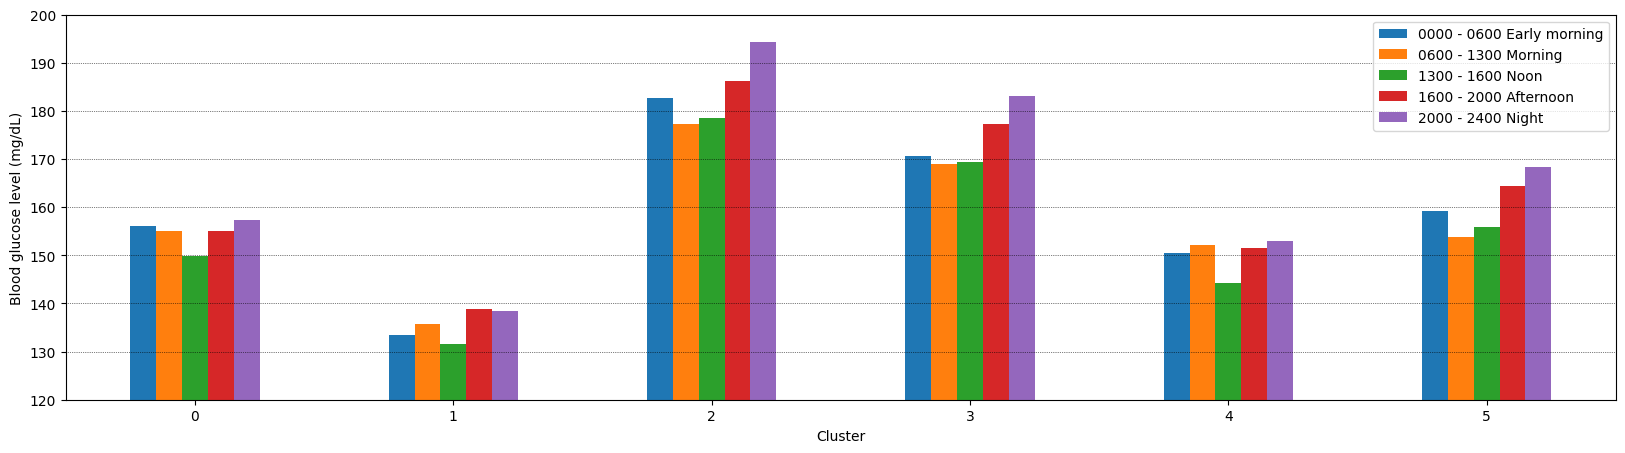

In [66]:

# Plotting just the average
sep = '--------------------------------------------------------------------------------------------------------------------------\n'
ax_ave = K6_plot.plot(kind='bar',
                                            figsize=(20, 5)
                                            # title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                            # fontsize=14
                                            )
# ax_ave.axes.title.set_size(20)
ax_ave.set_ylim([120, 200])
ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig_ave = ax_ave.get_figure()

y_title = ax_ave.set_ylabel('Blood glucose level (mg/dL)')
x_title = ax_ave.set_xlabel('Cluster')

# Set X-axis labels to horizontal
ax_ave.tick_params(axis='x', rotation=0)

fig_ave.savefig(f'Outputs/Kmeans_6_centroids.svg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_centroids.jpg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_centroids.eps', bbox_inches = "tight")

In [44]:
K6_hypo_ratio_plot = aux_cen_mean[var_to_plot_hypo_ratio]
K6_hypo_ratio_plot.columns = ['0000 - 0600 Early morning', '0600 - 1300 Morning', '1300 - 1600 Noon', '1600 - 2000 Afternoon', '2000 - 2400 Night']
K6_hypo_ratio_plot

,0000 - 0600 Early morning,0600 - 1300 Morning,1300 - 1600 Noon,1600 - 2000 Afternoon,2000 - 2400 Night
0,1.455614,1.620295,0.732246,0.893875,0.715851
1,1.060930,1.020647,0.418744,0.621036,0.469823
2,1.111075,1.378181,0.479997,0.656283,0.431230
3,1.028971,1.132243,0.384813,0.549441,0.363704
4,1.177131,1.214915,0.535566,0.744546,0.578532
5,1.050109,1.400034,0.441523,0.597690,0.451011


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


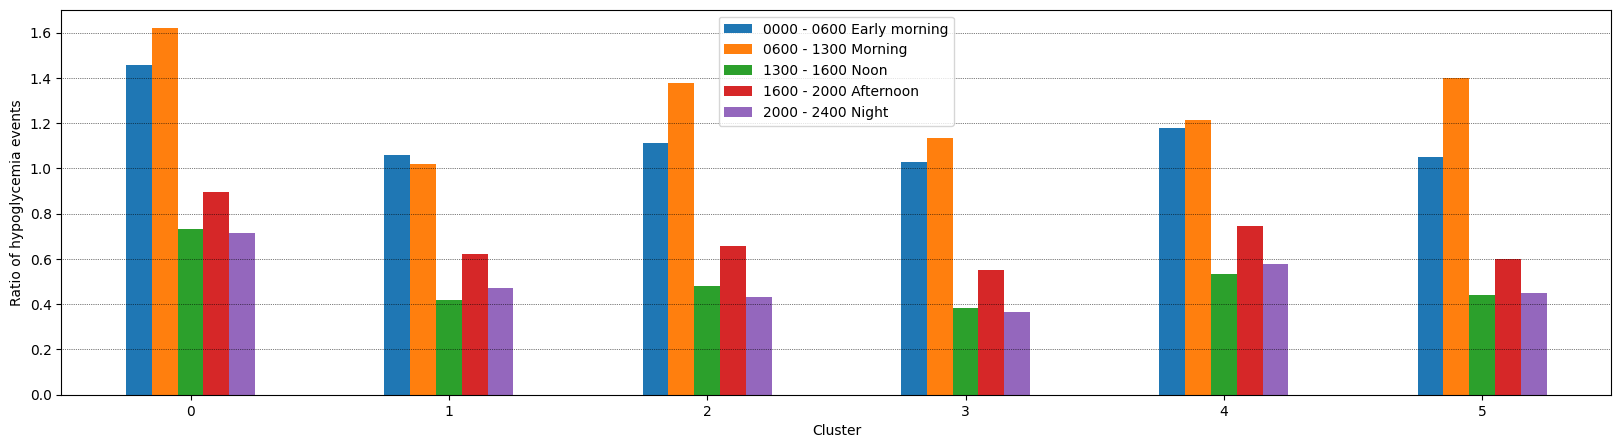

In [45]:
ax_ave = K6_hypo_ratio_plot.plot(kind='bar',
                                            figsize=(20, 5)
                                            # title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                            # fontsize=14
                                            )
# ax_ave.axes.title.set_size(20)
# ax_ave.set_ylim([120, 200])
ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig_ave = ax_ave.get_figure()

y_title = ax_ave.set_ylabel('Ratio of hypoglycemia events')
x_title = ax_ave.set_xlabel('Cluster')

# Set X-axis labels to horizontal
ax_ave.tick_params(axis='x', rotation=0)

fig_ave.savefig(f'Outputs/Kmeans_6_hypo_ratio.svg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hypo_ratio.jpg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hypo_ratio.eps', bbox_inches = "tight")

In [73]:
K6_hypo_total_plot = aux_cen_mean[var_to_plot_hypo_total]
K6_hypo_total_plot.columns = ['0000 - 0600 Early morning', '0600 - 1300 Morning', '1300 - 1600 Noon', '1600 - 2000 Afternoon', '2000 - 2400 Night']
K6_hypo_total_plot

,0000 - 0600 Early morning,0600 - 1300 Morning,1300 - 1600 Noon,1600 - 2000 Afternoon,2000 - 2400 Night
0,793.430556,880.819444,395.375000,508.777778,416.986111
1,223.549296,246.830986,94.816901,110.647887,105.169014
2,559.629032,717.540323,243.556452,326.870968,209.951613
3,370.860215,427.096774,164.333333,217.301075,145.935484
4,381.000000,393.864662,168.203008,251.210526,198.225564
5,399.653061,509.857143,174.642857,224.336735,179.540816


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


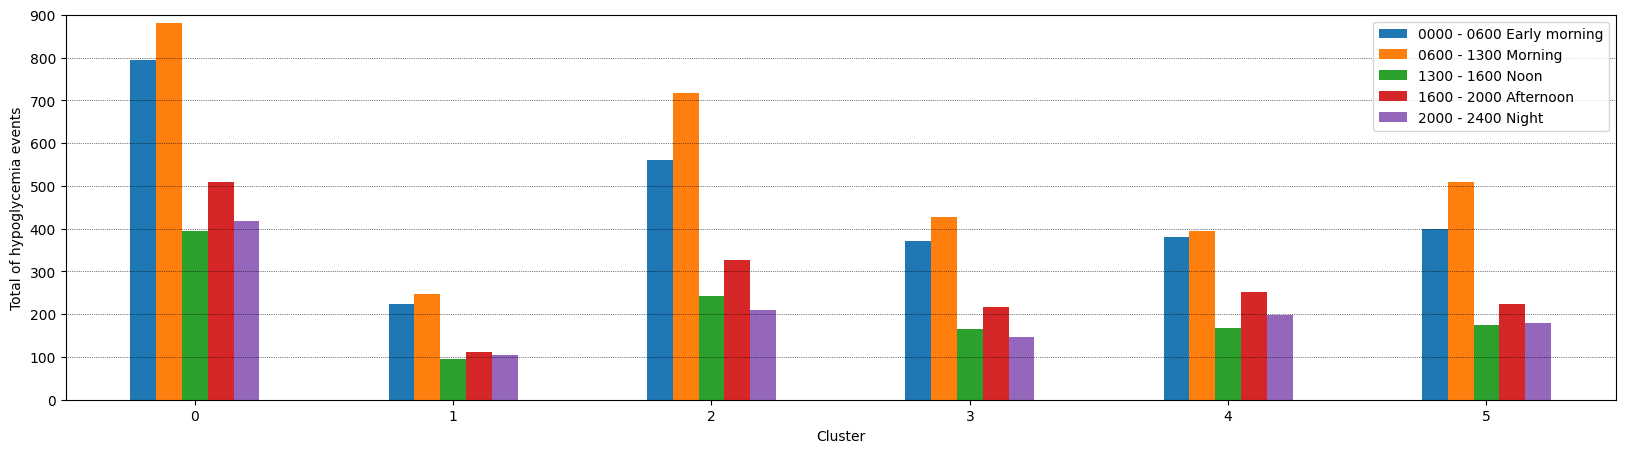

In [93]:
# Plotting the hypoglycemia
ax_ave = K6_hypo_total_plot.plot(kind='bar',
                                            figsize=(20, 5)
                                            # title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                            # fontsize=14
                                            )
# ax_ave.axes.title.set_size(20)
ax_ave.set_ylim([0, 900])
ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig_ave = ax_ave.get_figure()

y_title = ax_ave.set_ylabel('Total of hypoglycemia events')
x_title = ax_ave.set_xlabel('Cluster')

# Set X-axis labels to horizontal
ax_ave.tick_params(axis='x', rotation=0)

fig_ave.savefig(f'Outputs/Kmeans_6_hypo_total.svg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hypo_total.jpg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hypo_total.eps', bbox_inches = "tight")

In [88]:
K6_hyper_ratio_plot = aux_cen_mean[var_to_plot_hyper_ratio]
K6_hyper_ratio_plot.columns = ['0000 - 0600 Early morning', '0600 - 1300 Morning', '1300 - 1600 Noon', '1600 - 2000 Afternoon', '2000 - 2400 Night']
K6_hyper_ratio_plot

,0000 - 0600 Early morning,0600 - 1300 Morning,1300 - 1600 Noon,1600 - 2000 Afternoon,2000 - 2400 Night
0,6.974477,8.287588,3.209605,4.740165,4.510518
1,3.371055,4.405105,1.602181,2.795628,2.507477
2,9.875124,11.724895,4.975852,7.167317,6.937305
3,8.921590,10.952590,4.587648,6.859731,6.644584
4,6.023966,7.546738,2.637937,4.364370,4.053707
5,7.218303,7.962555,3.551749,5.605466,5.447042


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


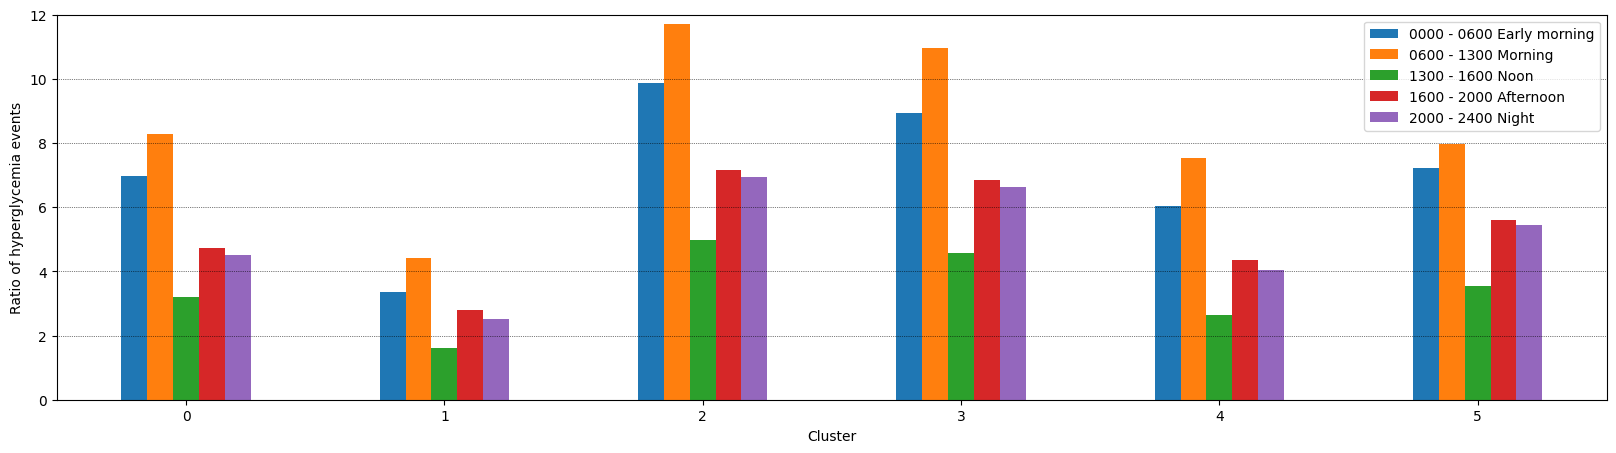

In [91]:
# Plotting the hyperglycemia ratio
ax_ave = K6_hyper_ratio_plot.plot(kind='bar',
                                            figsize=(20, 5)
                                            # title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                            # fontsize=14
                                            )
# ax_ave.axes.title.set_size(20)
ax_ave.set_ylim([0, 12])
ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig_ave = ax_ave.get_figure()

y_title = ax_ave.set_ylabel('Ratio of hyperglycemia events')
x_title = ax_ave.set_xlabel('Cluster')

# Set X-axis labels to horizontal
ax_ave.tick_params(axis='x', rotation=0)

fig_ave.savefig(f'Outputs/Kmeans_6_hyper_ratio.svg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hyper_ratio.jpg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hyper_ratio.eps', bbox_inches = "tight")

In [84]:
K6_hyper_total_plot = aux_cen_mean[var_to_plot_hyper_total]
K6_hyper_total_plot.columns = ['0000 - 0600 Early morning', '0600 - 1300 Morning', '1300 - 1600 Noon', '1600 - 2000 Afternoon', '2000 - 2400 Night']
K6_hyper_total_plot

,0000 - 0600 Early morning,0600 - 1300 Morning,1300 - 1600 Noon,1600 - 2000 Afternoon,2000 - 2400 Night
0,3494.125000,4062.680556,1553.541667,2306.361111,2228.055556
1,684.760563,866.985915,312.450704,584.014085,534.887324
2,4792.129032,5749.072581,2464.064516,3552.685484,3438.338710
3,3073.741935,3797.827957,1603.688172,2429.150538,2349.870968
4,1703.804511,2044.150376,739.045113,1229.646617,1087.082707
5,2449.469388,2784.377551,1203.377551,1929.948980,1865.806122


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


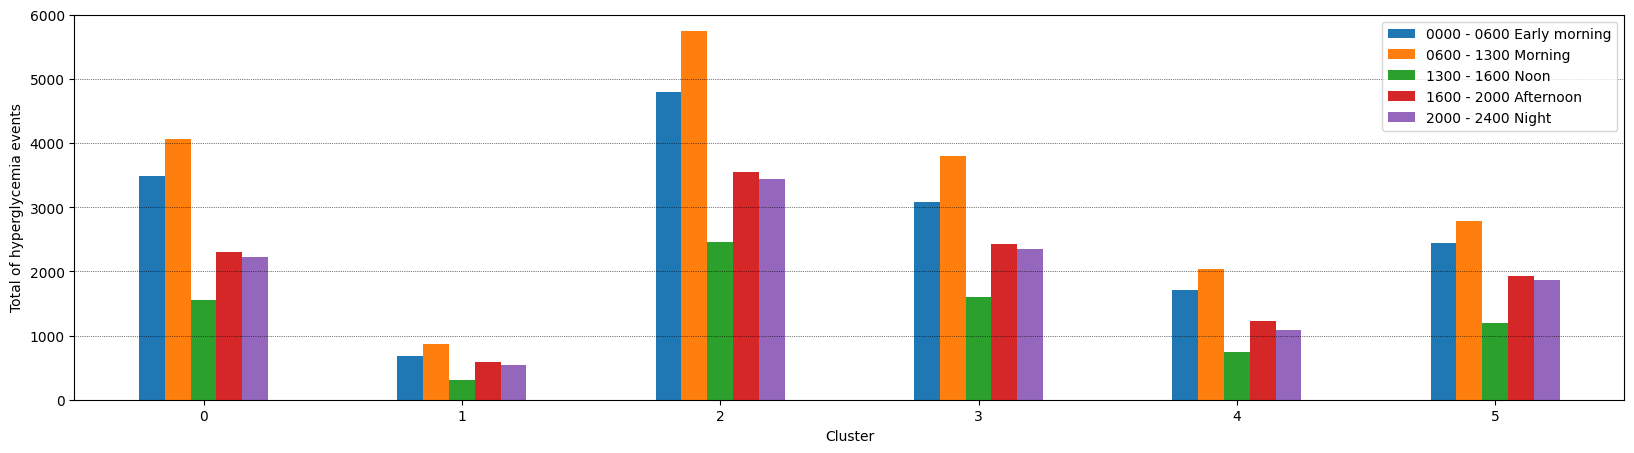

In [92]:
# Plotting the hypoglycemia
ax_ave = K6_hyper_total_plot.plot(kind='bar',
                                            figsize=(20, 5)
                                            # title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                            # fontsize=14
                                            )
# ax_ave.axes.title.set_size(20)
ax_ave.set_ylim([0, 6000])
ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig_ave = ax_ave.get_figure()

y_title = ax_ave.set_ylabel('Total of hyperglycemia events')
x_title = ax_ave.set_xlabel('Cluster')

# Set X-axis labels to horizontal
ax_ave.tick_params(axis='x', rotation=0)

fig_ave.savefig(f'Outputs/Kmeans_6_hyper_total.svg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hyper_total.jpg', bbox_inches = "tight")
fig_ave.savefig(f'Outputs/Kmeans_6_hyper_total.eps', bbox_inches = "tight")

### Instance number by cluster

In [71]:
my_value_count(df_all_labels_V1[df_best_by_K_V1['Name']])


1    334
0    257
Name: SOM_K2_data_V1_0, dtype: int64
---------------------

1    379
0    212
Name: Gauss_K2_data_V1_1, dtype: int64
---------------------

0    249
2    192
1    150
Name: Kmeans_K3_data_V1_0, dtype: int64
---------------------

2    178
1    167
3    158
0     88
Name: Kmeans_K4_data_V1_0, dtype: int64
---------------------

2    154
3    142
4    117
0    107
1     71
Name: Kmeans_K5_data_V1_0, dtype: int64
---------------------

4    133
2    124
5     98
3     93
0     72
1     71
Name: Kmeans_K6_data_V1_0, dtype: int64
---------------------

4    125
6    107
2    105
3     94
5     76
0     62
1     22
Name: Kmeans_K7_data_V1_0, dtype: int64
---------------------

0    116
1    101
3     83
6     82
5     78
7     54
4     43
2     34
Name: Kmeans_K8_data_V1_0, dtype: int64
---------------------


## Dataset V2

### General attribute averages
To get an idea of the deviation of the centroids from the general average.

In [72]:
df_no_std_V2.shape

(716, 37)

In [73]:
graphs_subfij_name_V2 = '- Dataset_V2_2023-03-15'

0000 - 0600 Hypo: 406.1550279329609
0000 - 0600 Hyper: 2653.9092178770948
0000 - 0600 Average: 165.2038293366198
0000 - 0600 STD: 60.40509546441753
0000 - 0600 MIN: 47.20670391061452
0000 - 0600 MAX: 405.4650837988827
0600 - 1300 Hypo: 473.1173184357542
0600 - 1300 Hyper: 3167.0530726256984
0600 - 1300 Average: 163.27445100140505
0600 - 1300 STD: 60.822895619852936
0600 - 1300 MIN: 47.24022346368715
0600 - 1300 MAX: 408.74022346368713
1300 - 1600 Hypo: 180.21648044692736
1300 - 1600 Hyper: 1309.0307262569831
1300 - 1600 Average: 162.0983442791554
1300 - 1600 STD: 60.036409234194196
1300 - 1600 MIN: 51.840782122905026
1300 - 1600 MAX: 396.4287709497207
1600 - 2000 Hypo: 241.77932960893855
1600 - 2000 Hyper: 1982.2513966480446
1600 - 2000 Average: 169.53243793014556
1600 - 2000 STD: 64.50623300468432
1600 - 2000 MIN: 49.70670391061452
1600 - 2000 MAX: 416.0893854748603
2000 - 2400 Hypo: 181.81284916201116
2000 - 2400 Hyper: 1880.2220670391062
2000 - 2400 Average: 173.4922639357022
2000 -

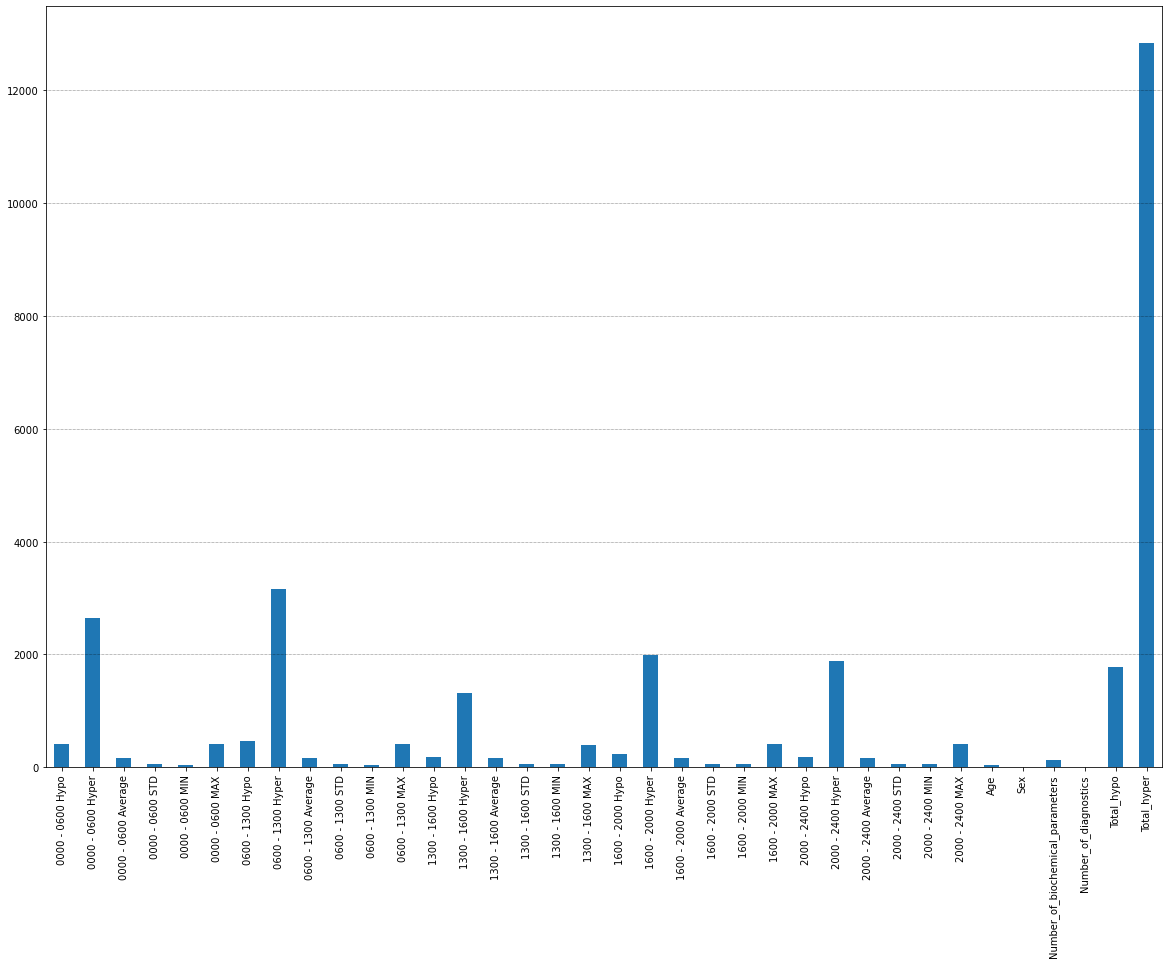

In [74]:
d_graph_V2 = {}

for i in range(1, df_no_std_V2.shape[1]):
    value = df_no_std_V2.iloc[:, i].mean(axis=0)
    c = df_no_std_V2.columns[i]
    d_graph_V2[c] = value
    print(c + ': ' + str(value))

general_graph_series_V2 = pd.Series(data=d_graph_V2)
ax_general_graph_V2 = general_graph_series_V2.plot(kind='bar', figsize=(20, 14))
ax_general_graph_V2.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_general_graph_V2.get_figure()

fig.savefig('Outputs/Graphs/V2/AttributeAverage-' + graphs_subfij_name_V2 + '.svg')
fig.savefig('Outputs/Graphs/V2/AttributeAverage-' + graphs_subfij_name_V2 + '.jpg')

0000 - 0600 Average    165.203829
0600 - 1300 Average    163.274451
1300 - 1600 Average    162.098344
1600 - 2000 Average    169.532438
2000 - 2400 Average    173.492264
dtype: float64

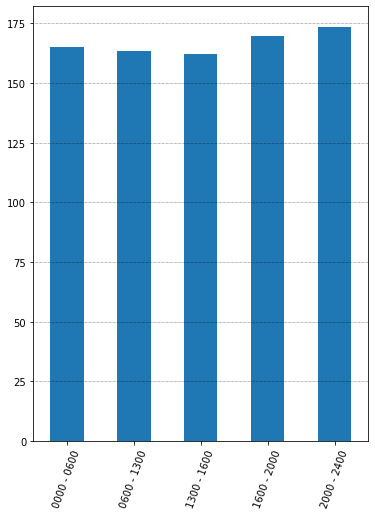

In [75]:
average_graph_series_V2 = general_graph_series_V2[['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']]
ax_average_graph_V2 = average_graph_series_V2.plot(kind='bar', figsize=(6, 8))
ax_average_graph_V2.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_average_graph_V2.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_average_graph_V2.get_figure()

fig.savefig('Outputs/Graphs/V2/AttributeAverage-Average-' + graphs_subfij_name_V2 + '.svg')
fig.savefig('Outputs/Graphs/V2/AttributeAverage-Average-' + graphs_subfij_name_V2 + '.jpg')

general_graph_series_V2[['0000 - 0600 Average', '0600 - 1300 Average', '1300 - 1600 Average', '1600 - 2000 Average', '2000 - 2400 Average']]

### Hypoglycemic events in average by range y all the sample

0000 - 0600 Hypo    406.155028
0600 - 1300 Hypo    473.117318
1300 - 1600 Hypo    180.216480
1600 - 2000 Hypo    241.779330
2000 - 2400 Hypo    181.812849
dtype: float64

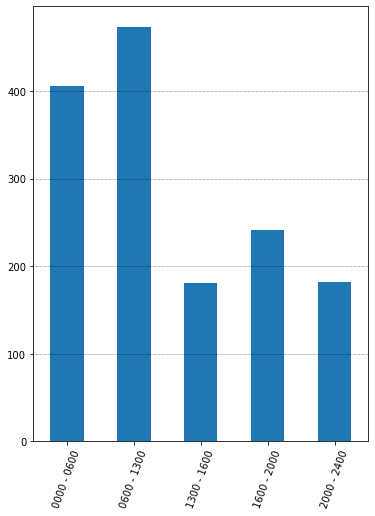

In [76]:
hypo_graph_series_1 = general_graph_series_V2[var_to_plot_hypo_total]
ax_hypo_graph_V2 = hypo_graph_series_1.plot(kind='bar', figsize=(6, 8))
ax_hypo_graph_V2.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_hypo_graph_V2.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_hypo_graph_V2.get_figure()

fig.savefig('Outputs/Graphs/V2/AttributeAverage-hypoglycemia-' + graphs_subfij_name_V2 + '.jpg')
fig.savefig('Outputs/Graphs/V2/AttributeAverage-hypoglycemia-' + graphs_subfij_name_V2 + '.svg')
#
general_graph_series_V2[var_to_plot_hypo_total]

### Hyperglycemic events in average by range y all the sample

0000 - 0600 Hyper    2653.909218
0600 - 1300 Hyper    3167.053073
1300 - 1600 Hyper    1309.030726
1600 - 2000 Hyper    1982.251397
2000 - 2400 Hyper    1880.222067
dtype: float64

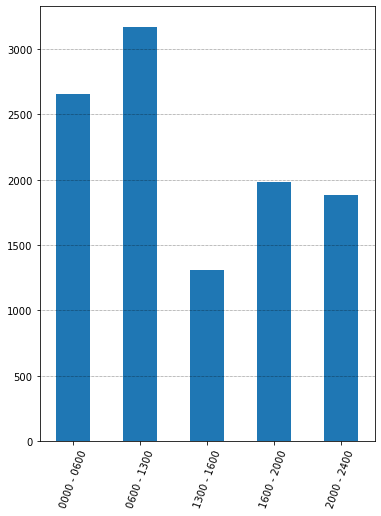

In [77]:
hyper_graph_series_V2 = general_graph_series_V2[var_to_plot_hyper_total]
ax_hyper_graph_V2 = hyper_graph_series_V2.plot(kind='bar', figsize=(6, 8))
ax_hyper_graph_V2.set_xticklabels(['0000 - 0600', '0600 - 1300', '1300 - 1600', '1600 - 2000', '2000 - 2400'], rotation = 70)
ax_hyper_graph_V2.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
fig = ax_hyper_graph_V2.get_figure()

fig.savefig('Outputs/Graphs/V2/AttributeAverage-hyperglycemia-' + graphs_subfij_name_V2 + '.jpg')
fig.savefig('Outputs/Graphs/V2/AttributeAverage-hyperglycemia-' + graphs_subfij_name_V2 + '.svg')

general_graph_series_V2[var_to_plot_hyper_total]

### Creating centroids and plotting it

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19608\923191323.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_df_ = centroids_df_.append(other=aux_series_, ignore_index=True) # Add the auxiliary series to the current centroids_df
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19608\923191323.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_df_ = centroids_df_.append(other=aux_series_, ignore_index=True) # Add the auxiliary series to the current centroids_df
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19608\923191323.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_df_ = centroids_df_.append(other=aux_series_, ignore_index=True) # Add the auxiliary series to the current centroids_d

,Age,Sex,Number_of_biochemical_parameters,Number_of_diagnostics,0000 - 0600 Average,0600 - 1300 Average,1300 - 1600 Average,1600 - 2000 Average,2000 - 2400 Average,0000 - 0600 Hypo,...,1300 - 1600 STD,1300 - 1600 MIN,1300 - 1600 MAX,1600 - 2000 STD,1600 - 2000 MIN,1600 - 2000 MAX,2000 - 2400 STD,2000 - 2400 MIN,2000 - 2400 MAX,Model
0,48.464646,0.548822,126.868966,3.555556,146.599899,147.966404,144.090517,150.255632,151.326789,312.784512,...,47.64899,54.885522,332.43771,51.194927,51.993266,351.885522,49.334851,52.774411,345.239057,SOM_K2_data_V2_0
1,41.811456,0.4821,117.202899,3.404255,178.390864,174.125262,174.862842,183.196427,189.20383,472.338902,...,68.816991,49.682578,441.787589,73.941694,48.085919,461.599045,73.790461,48.763723,461.455847,SOM_K2_data_V2_0
2,49.502857,0.485714,131.445087,4.267717,185.706414,182.464628,186.148505,193.744835,198.276299,149.805714,...,69.009713,58.994286,407.045714,72.507574,56.131429,418.131429,72.704237,59.291429,417.205714,Gauss_K2_data_V2_0
3,42.97597,0.51756,117.841808,3.196765,158.571755,157.066907,154.318717,161.700332,165.475247,489.077634,...,57.133769,49.526802,392.994455,61.917999,47.628466,415.428835,60.716104,47.560074,411.968577,Gauss_K2_data_V2_0
4,48.957317,0.567073,123.850932,3.675439,140.647864,142.355516,139.989946,146.969678,145.772825,257.268293,...,42.976453,56.780488,305.621951,46.894898,53.829268,326.384146,44.934939,54.493902,315.75,Kmeans_K3_data_V2_0
5,41.589844,0.480469,119.928854,3.432432,188.112935,182.731441,183.885576,193.106297,200.912269,506.34375,...,74.411992,49.730469,465.347656,79.969245,47.996094,482.34375,80.148107,48.84375,482.308594,Kmeans_K3_data_V2_0
6,44.719595,0.503378,120.8,3.386935,158.995881,158.037005,155.504581,161.645224,165.135733,401.996622,...,57.05561,50.929054,387.135135,60.890449,48.902027,408.489865,59.741245,49.543919,407.540541,Kmeans_K3_data_V2_0
7,43.209163,0.511952,116.867886,3.186391,155.850719,156.153086,152.917671,159.548381,162.229084,496.770916,...,56.935215,49.282869,390.494024,61.389635,47.35259,413.059761,59.753061,47.388446,407.707171,Gauss_K3_data_V2_0
8,53.598131,0.560748,138.018868,4.455696,167.331572,161.215391,168.507934,173.256691,176.937629,43.981308,...,51.378539,64.850467,345.411215,53.866363,61.093458,355.35514,54.743965,63.252336,361.728972,Gauss_K3_data_V2_0
9,41.934579,0.448598,124.386792,3.691358,206.957033,198.744028,198.7607,212.649277,222.889108,343.196262,...,83.243805,50.831776,475.28972,89.767901,49.364486,491.037383,90.813205,51.859813,490.766355,Gauss_K3_data_V2_0


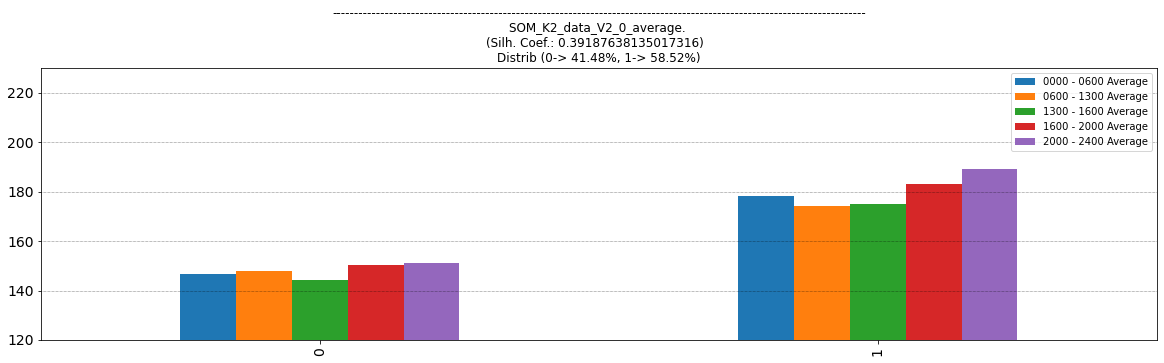

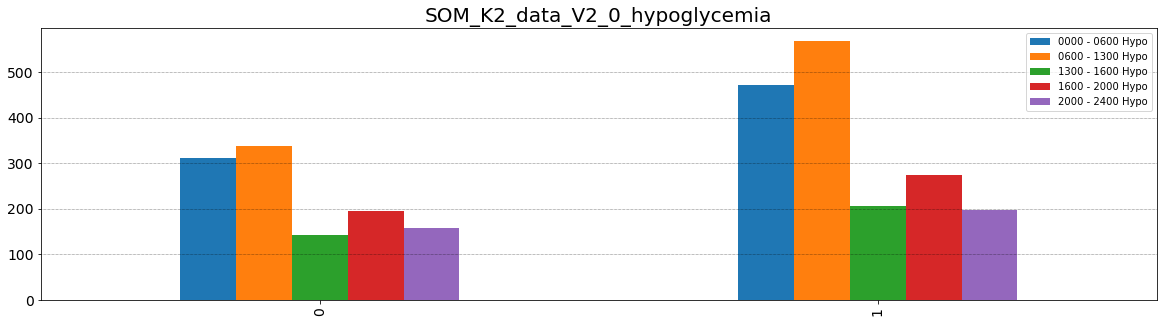

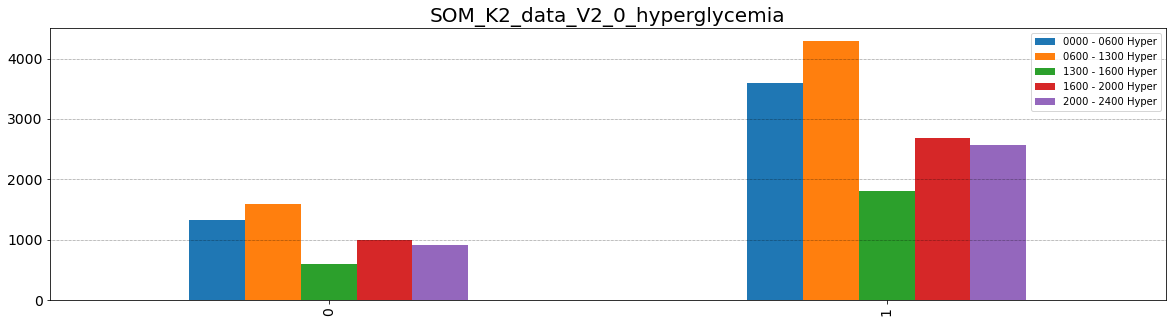

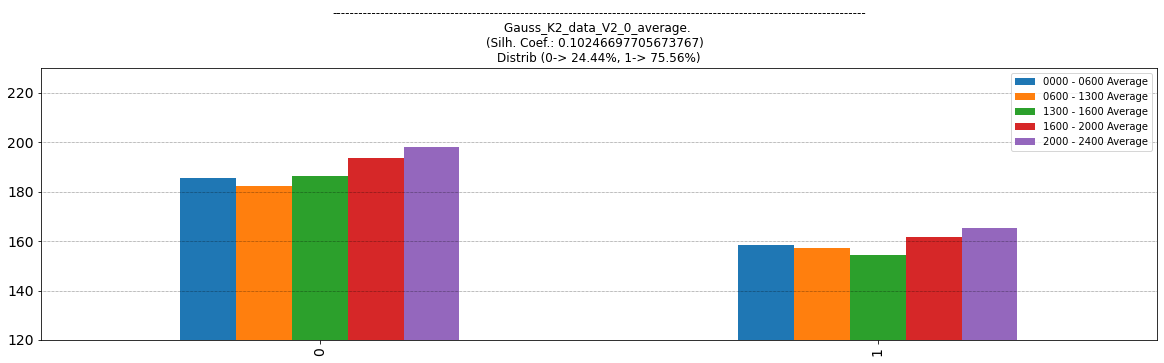

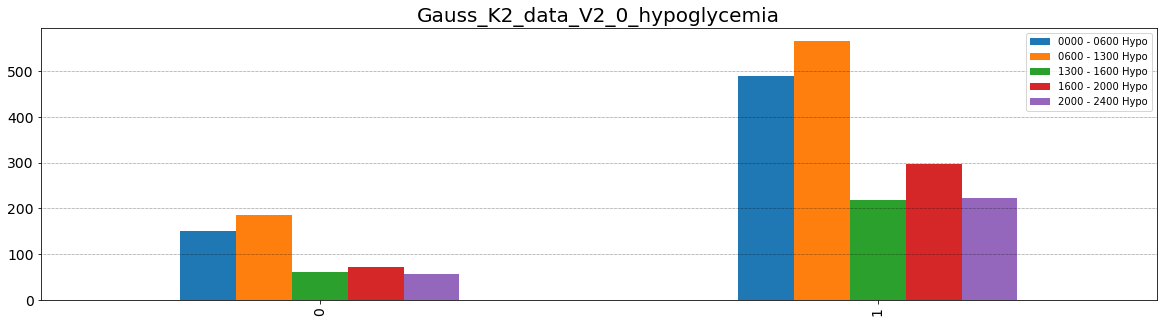

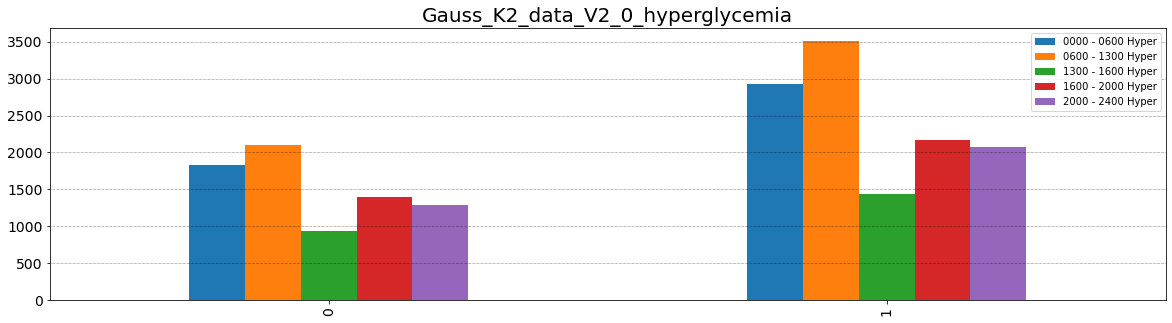

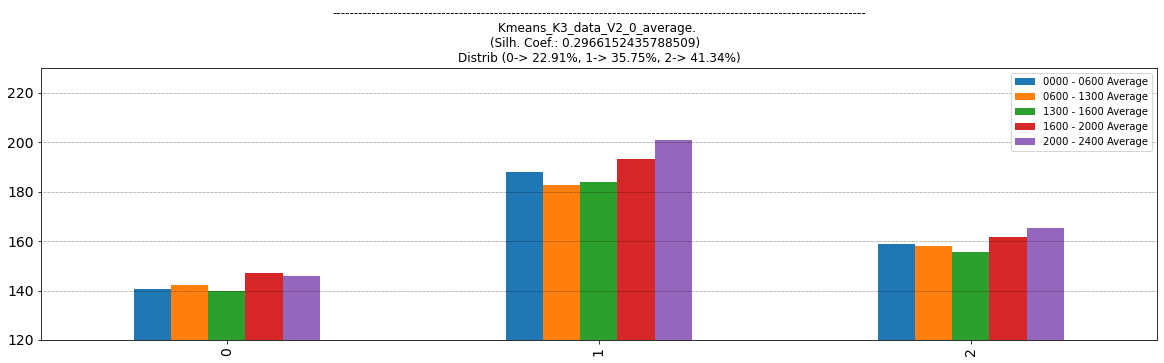

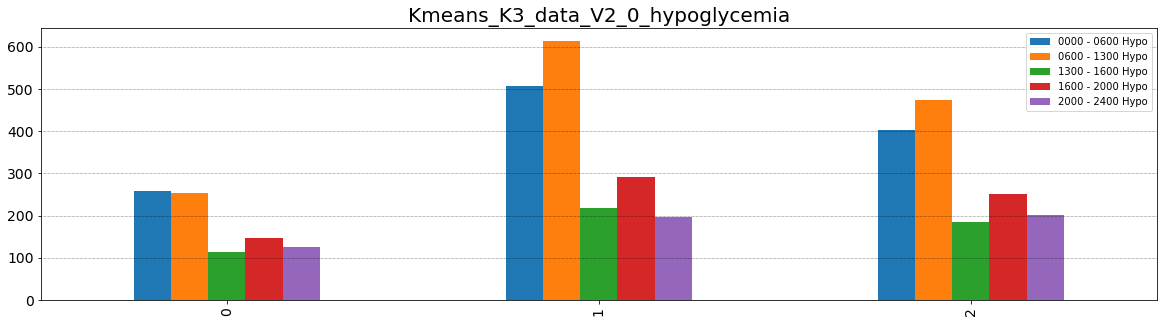

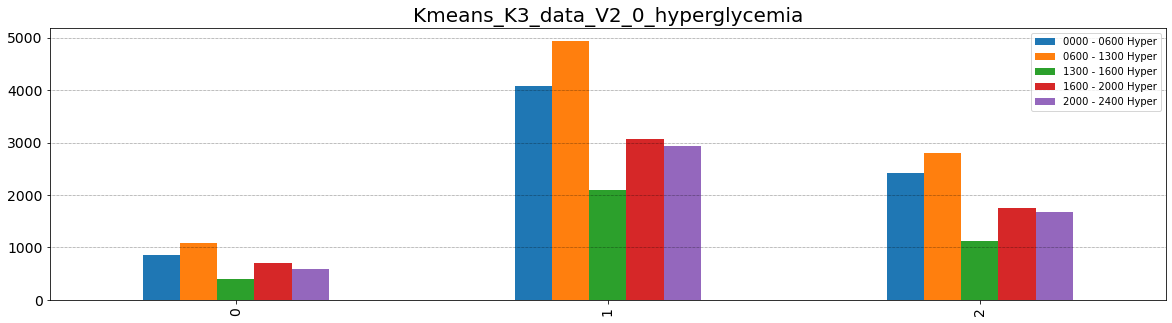

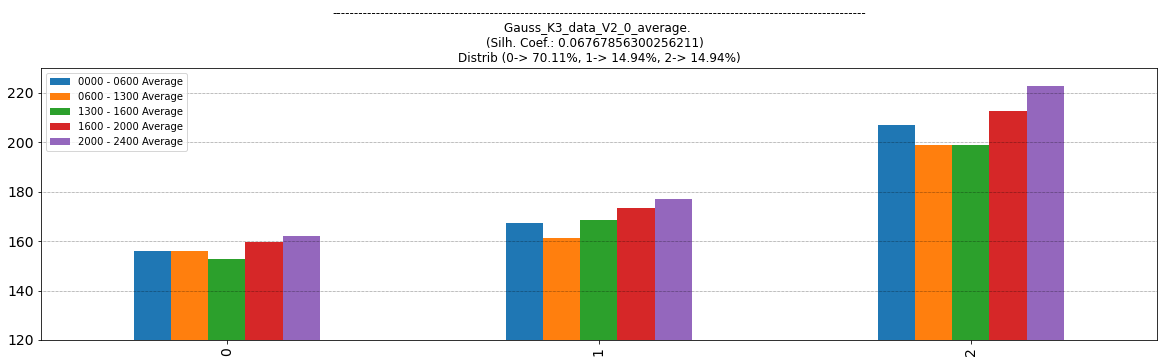

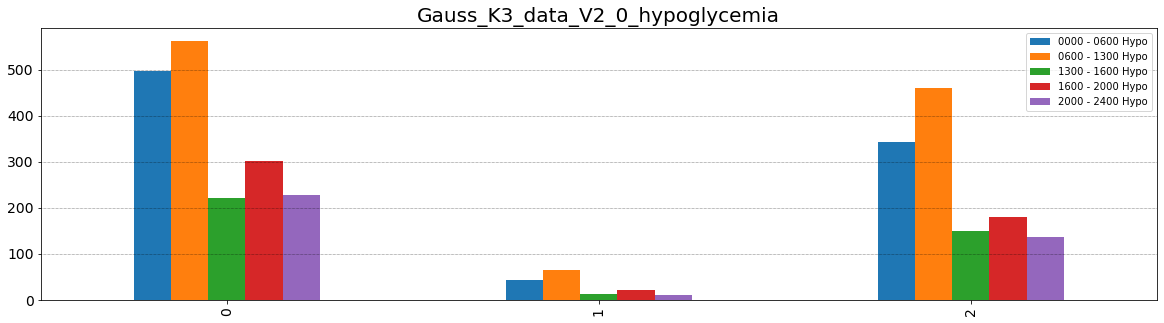

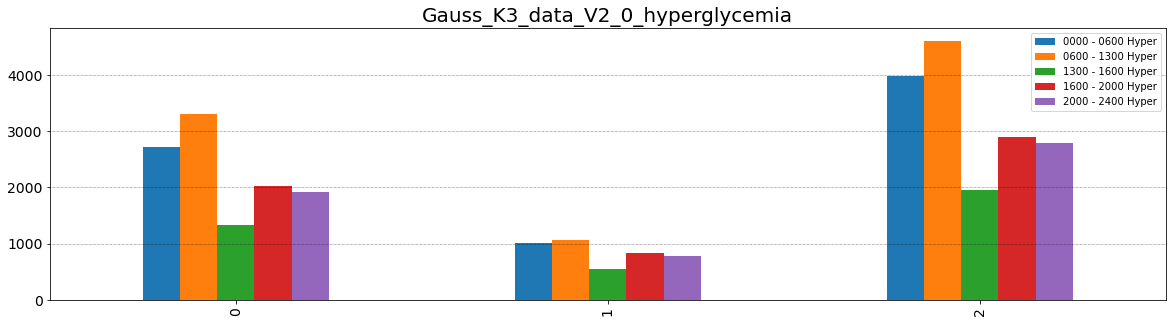

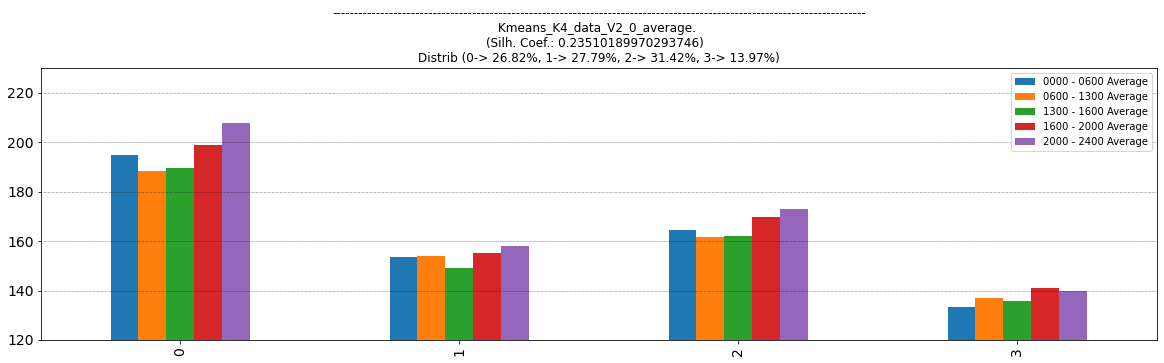

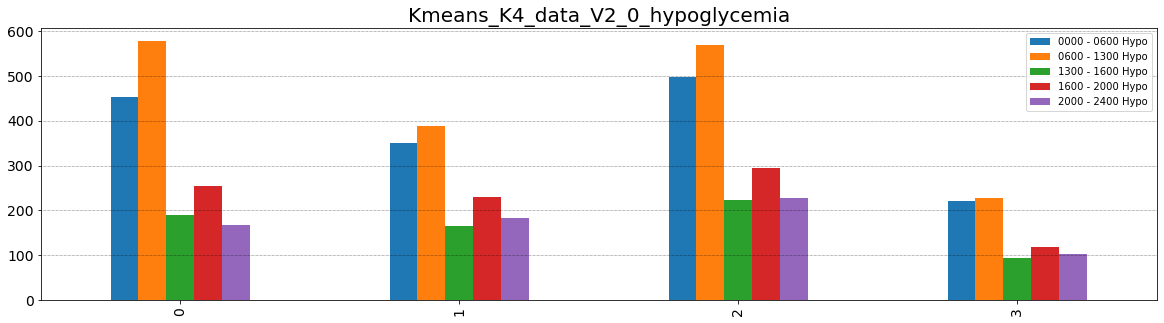

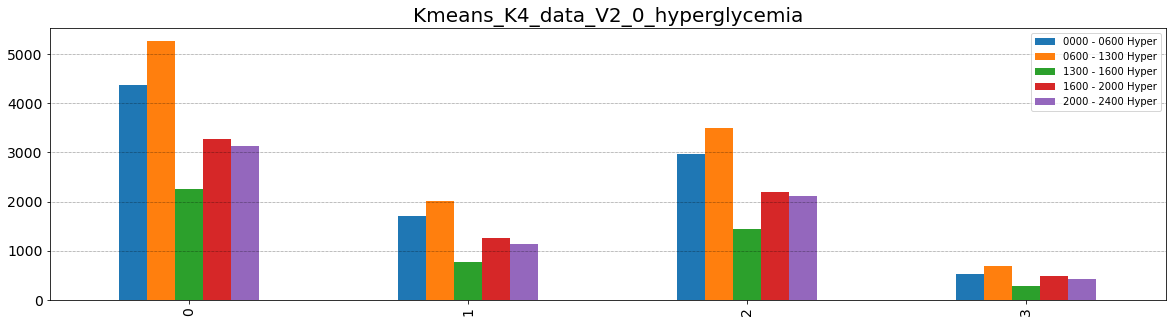

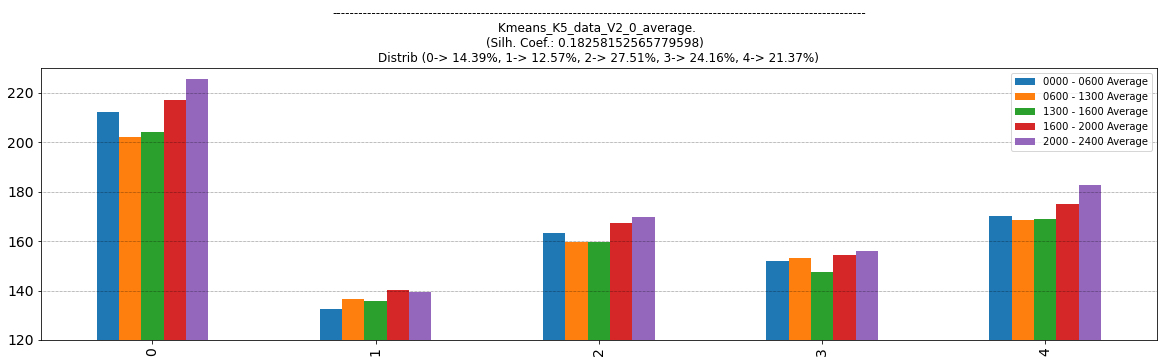

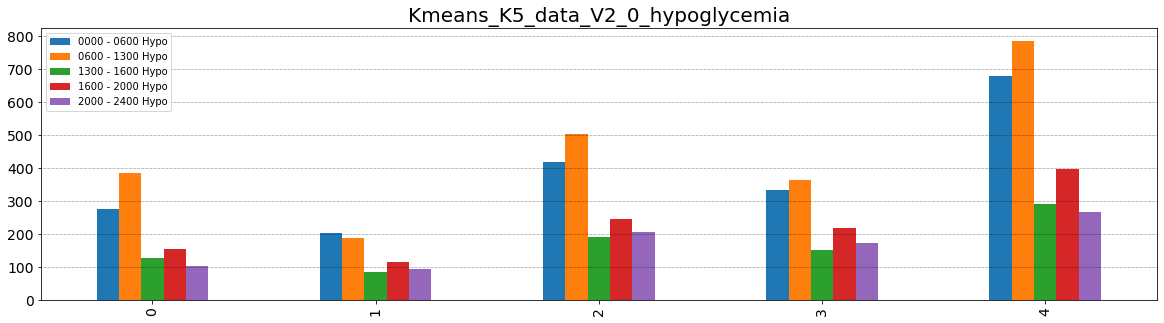

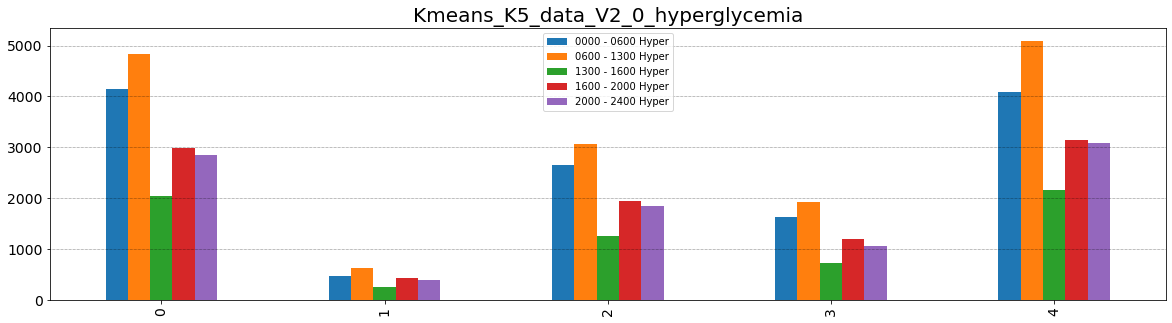

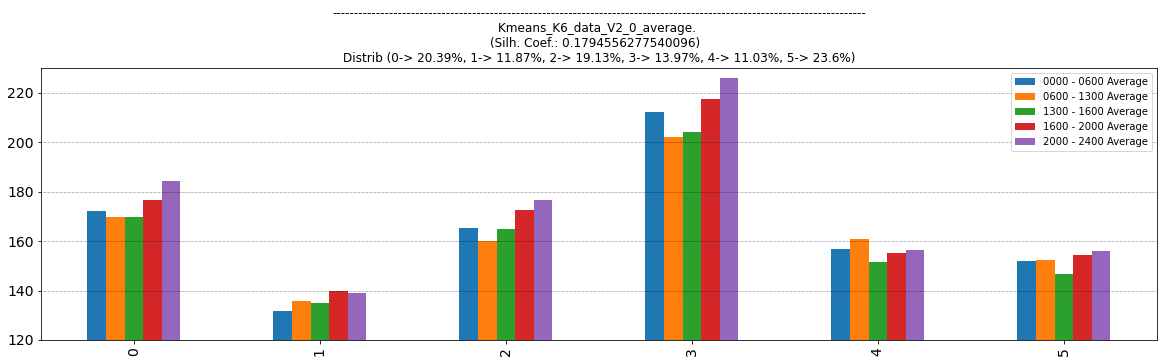

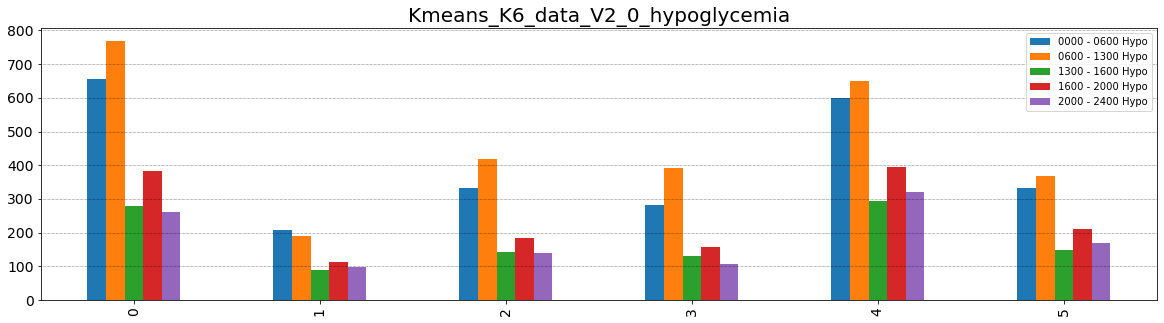

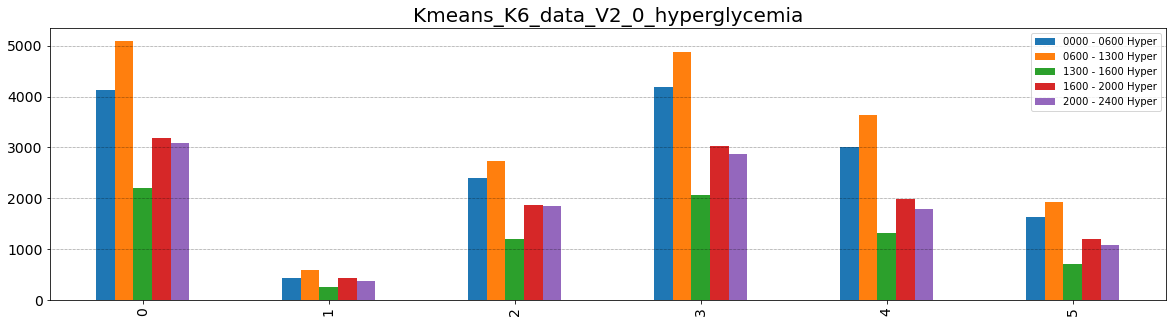

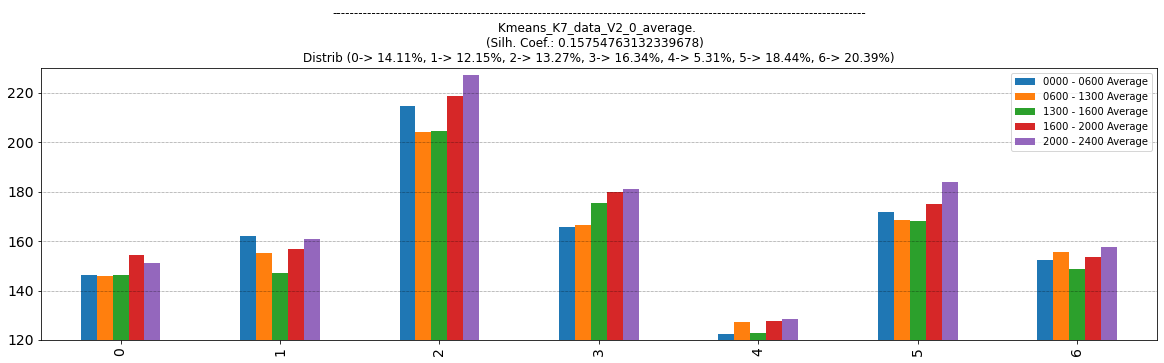

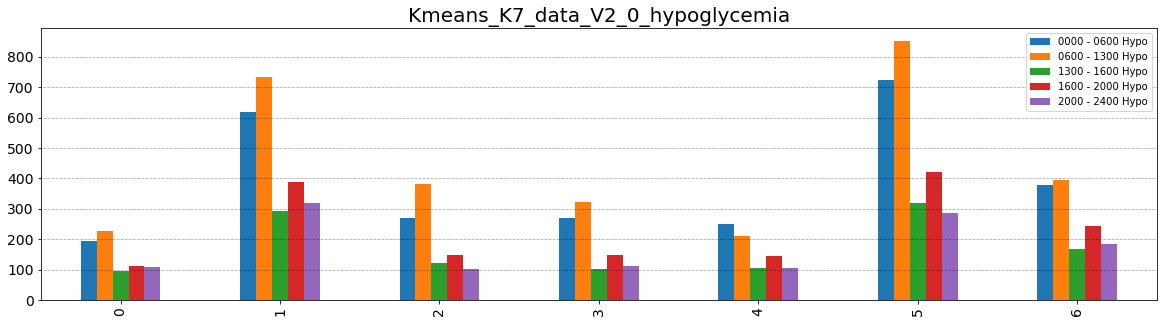

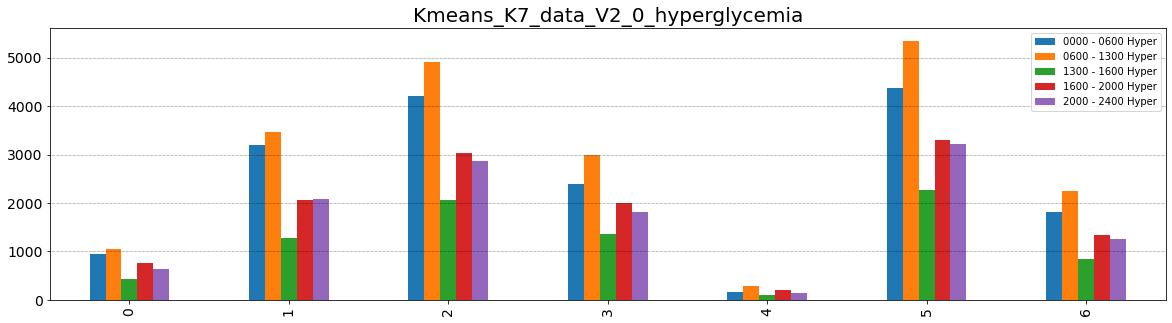

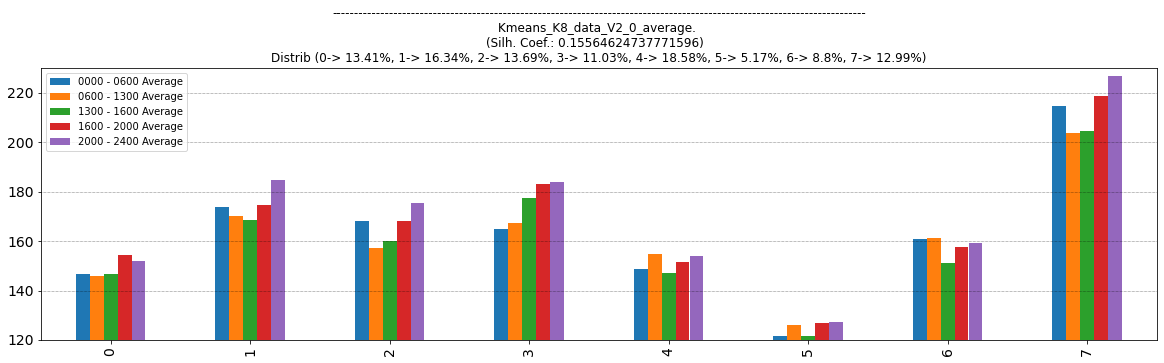

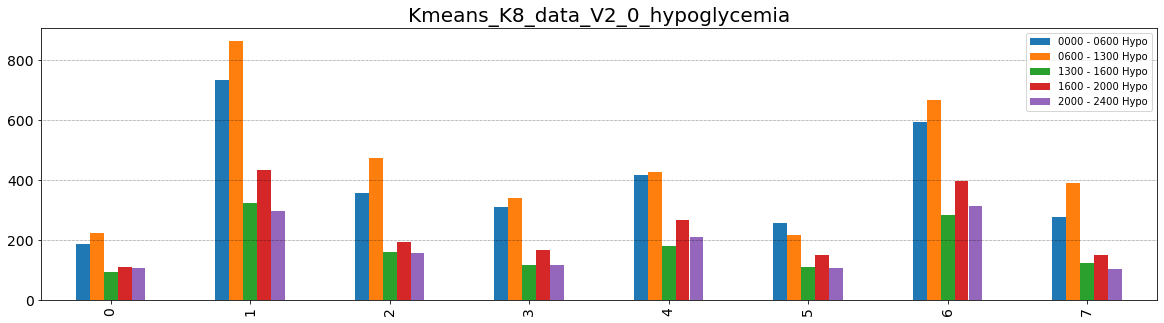

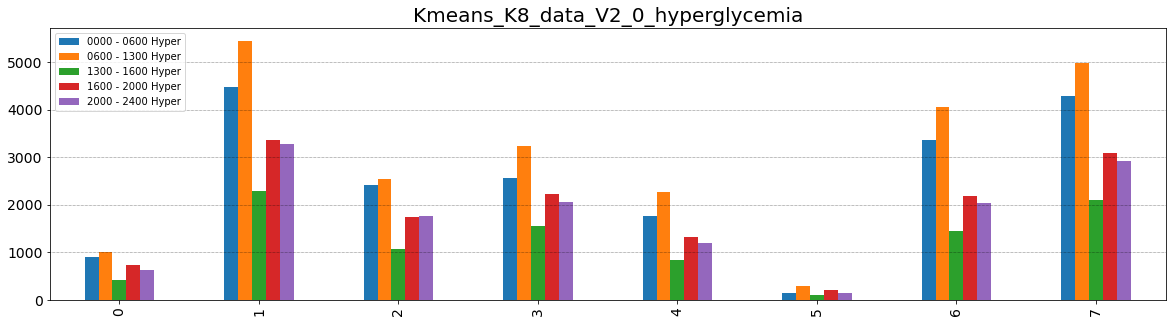

In [94]:
# Create the centroids (as dataframe) of the clustering results pick as best

# Dataframe to storage the centroids. All centroids will be together and must be identified by the column "Model".
df_centroids_V2 = pd.DataFrame(columns=df_no_std_V2[var_to_centroids_analysis].columns.insert(variable_number, 'Model'))

for n_best_clustering in range(0, df_best_by_K_V2.shape[0]):
    current_name = df_best_by_K_V2.loc[n_best_clustering]['Name'] # Name given to the current model instance
    current_silh_value = df_best_by_K_V2.loc[n_best_clustering]['Silhouette Coefficient'] # Silhouette Coefficient of the current model instance
    # data_number = get_dataset_number(current_name) # current_name[len(current_name) - 1] # The last character of the name it is the file data used

    # Get the value count series to printed in the label of the plot
    s_to_conv = df_all_labels_V2[current_name].value_counts(dropna=False)
    info_to_add = serie_to_str(s_to_conv, df_all_labels_V2.shape[0])

    k_number = get_k(current_name) # int(current_name[len(current_name) - 7])

    aux_cen_mean = create_centroids(df_no_std_V2[var_to_centroids_analysis], labels=df_all_labels_V2[current_name], k=k_number)

    # Plotting just the average
    sep = '--------------------------------------------------------------------------------------------------------------------------\n'
    ax_ave = aux_cen_mean[var_to_plot_ave].plot(kind='bar',
                                                figsize=(20, 5),
                                                title= sep+current_name + '_average' + '. \n(Silh. Coef.: '+ str(current_silh_value) + ')  \nDistrib (' + info_to_add + ')',
                                                fontsize=14
                                                )
    # ax_ave.axes.title.set_size(20)
    ax_ave.set_ylim([120, 230])
    ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
    fig_ave = ax_ave.get_figure()
    fig_ave.savefig('Outputs/Graphs/V2/' + current_name + '_ave -' + graphs_subfij_name_V2 + '.svg', bbox_inches = "tight")

    # Plotting the hypoglycemia
    ax_ave = aux_cen_mean[var_to_plot_hypo_total].plot(kind='bar',
                                                       figsize=(20, 5),
                                                       title=current_name + '_hypoglycemia',
                                                       fontsize=14
                                                       )
    ax_ave.axes.title.set_size(20)
    # ax_ave.set_ylim([120, 210])
    ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
    fig_ave = ax_ave.get_figure()
    fig_ave.savefig('Outputs/Graphs/V2/' + current_name + '_hypo -' + graphs_subfij_name_V2 + '.svg', bbox_inches = "tight")

    # Plotting the hyperglycemia
    ax_ave = aux_cen_mean[var_to_plot_hyper_total].plot(kind='bar',
                                                        figsize=(20, 5),
                                                        title=current_name + '_hyperglycemia',
                                                        fontsize=14
                                                        )
    ax_ave.axes.title.set_size(20)
    # ax_ave.set_ylim([120, 210])
    ax_ave.grid(axis='y', linestyle=':', linewidth='0.5', color='black')
    fig_ave = ax_ave.get_figure()
    fig_ave.savefig('Outputs/Graphs/V2/' + current_name + '_hyper -' + graphs_subfij_name_V2 + '.svg', bbox_inches = "tight")

    aux_cen_mean['Model'] = current_name
    df_centroids_V2 = pd.concat([df_centroids_V2, aux_cen_mean], ignore_index=True)

df_centroids_V2.round(decimals=1)

### Instance number by cluster

In [79]:
my_value_count(df_all_labels_V2[df_best_by_K_V2['Name']])

1    419
0    297
Name: SOM_K2_data_V2_0, dtype: int64
---------------------

1    541
0    175
Name: Gauss_K2_data_V2_0, dtype: int64
---------------------

2    296
1    256
0    164
Name: Kmeans_K3_data_V2_0, dtype: int64
---------------------

0    502
1    107
2    107
Name: Gauss_K3_data_V2_0, dtype: int64
---------------------

2    225
1    199
0    192
3    100
Name: Kmeans_K4_data_V2_0, dtype: int64
---------------------

2    197
3    173
4    153
0    103
1     90
Name: Kmeans_K5_data_V2_0, dtype: int64
---------------------

5    169
0    146
2    137
3    100
1     85
4     79
Name: Kmeans_K6_data_V2_0, dtype: int64
---------------------

6    146
5    132
3    117
0    101
2     95
1     87
4     38
Name: Kmeans_K7_data_V2_0, dtype: int64
---------------------

4    133
1    117
2     98
0     96
7     93
3     79
6     63
5     37
Name: Kmeans_K8_data_V2_0, dtype: int64
---------------------


# Write results to files

## Centroids of the best models

In [87]:
df_centroids_V1_float = df_centroids_V1_mean.iloc[:, 0:df_centroids_V1_mean.shape[1] - 1].astype(dtype=float)
df_centroids_V1_float['Model'] = df_centroids_V1_mean['Model']

df_centroids_V2_float = df_centroids_V2.iloc[:, 0:df_centroids_V2.shape[1] - 1].astype(dtype=float)
df_centroids_V2_float['Model'] = df_centroids_V2['Model']

In [88]:
df_centroids_V1_float.round(decimals=1).to_csv('Outputs/Results/Centroids/V1/Centroids of the best by K results' + graphs_subfij_name_V1 + '- Rounded.csv', index=False)
df_centroids_V2_float.round(decimals=1).to_csv('Outputs/Results/Centroids/V2/Centroids of the best by K results' + graphs_subfij_name_V2 + '- Rounded.csv', index=False)